## Load the library

In [1]:
## Import all relevant libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler ,MinMaxScaler, RobustScaler # How to import Min Absolute Scaler 
import scipy.stats as stats

## Read the data

In [3]:
## Load the data from your file or data source.

In [ ]:
## Data Set Information:

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. 
The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones).
Outlier detection algorithms could be used to detect the few excellent or poor wines. 
Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [90]:
df = pd.read_csv('I:/Data Analytics Class/PHYTON/Project/EDA Projects/1. Wine Quality data/winequalityN.csv',na_values=['N/A', 'NIL'])

## Above code na_values=['N/A', 'NIL'] mentions the values which are null or other Nill , None , Nan . will be included in  this data frame so we can know how many nulls values in the Data Frame 

In [17]:
## Show first 5 rows

In [18]:
df.head(10)
## this code is written for to check the first five row of the data frame

type  fixed acidity  volatile acidity  citric acid  residual sugar   
0  white            7.0              0.27         0.36            20.7  \
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   
6  white            6.2              0.32         0.16             7.0   
7  white            7.0              0.27         0.36            20.7   
8  white            6.3              0.30         0.34             1.6   
9  white            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH   
0      0.045                 45.0                 170.0   1.0010  3.00  \
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   
6      0.045                 30.0                 136.0   0.9949  3.18   
7      0.045                 45.0                 170.0   1.0010  3.00   
8      0.049                 14.0                 132.0   0.9940  3.30   
9      0.044                 28.0                 129.0   0.9938  3.22   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6  
5       0.44     10.1        6  
6       0.47      9.6        6  
7       0.45      8.8        6  
8       0.49      9.5        6  
9       0.45     11.0        6

In [19]:
## Show last 5 rows
## this code is written for to check the last five row of the data frame

In [20]:
df.tail()
## this code is written for to check the last five row of the data frame

type  fixed acidity  volatile acidity  citric acid  residual sugar   
6492  red            6.2             0.600         0.08             2.0  \
6493  red            5.9             0.550         0.10             2.2   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH   
6492      0.090                 32.0                  44.0  0.99490  3.45  \
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6

In [21]:
## Show the info for data

In [22]:
df.info()
## these code show the information about the colume, for which type of data in the row of the data frame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [23]:

## Show the columns

In [24]:
df.columns
## this code show the index details about data frame

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [25]:
## Show the description summary for numerical and categorical values.

In [26]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar   
count    6487.000000       6489.000000  6494.000000     6495.000000  \
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  6495.000000          6497.000000           6497.000000  6497.000000  \
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [27]:
num_columns=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       ]
categorical_columns=['type','quality' ]

In [28]:
df.describe(include="O").columns

Index(['type'], dtype='object')

In [29]:
df.describe(include="all").columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

# Exploratory Data Analysis

## Do Numerical Analysis of Columns

In [22]:
#  Numerical column analysis 

#  Maximum and mimimum value mean, meadian or std deviation or variance

#  You can learn about their distribution.
# - Histogram.
#  While a histogram is made up of bars that touch each other,it shows counts of values in each range.

# - Distribution plot. 
#  While a density plot shows the proportion of values in each range, a density plot is a smooth curve 
# that shows the distribution of the data in a more continuous way

# Asymmetry 
# Skewness is a statistical measure of the asymmetry of a probability distribution. 
# It characterizes the extent to which the distribution of a set of values deviates from a normal distribution.
# If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
# If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
# If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

# Quantile Analysis
# A quantile defines a particular part of a data set, 
# i.e. a quantile determines how many values in a distribution are above or below a certain limit.

# Analysis of extreme value
# - Box Plot
# - Violin plot

In [81]:
num_columns=[ 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       ]

____________________ volatile acidity ____________________
mean of : 0.33969101556480197
min of:  0.08
max of:  1.58
std of  volatile acidity :  0.16464902864429293
variance  of  volatile acidity :  0.027109302633509195
skewness of  volatile acidity :  1.4955115856471894
Quantile of  volatile acidity :  0.18 0.23 0.29 0.4 0.59
Null Percentage of the  volatile acidity :  50.0


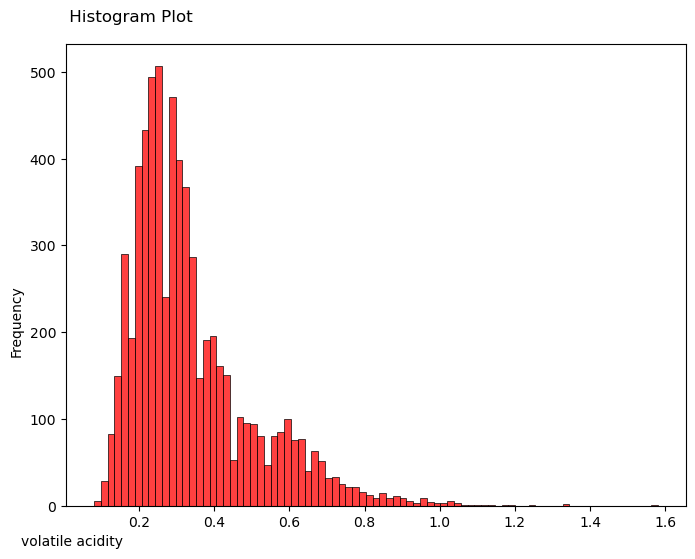

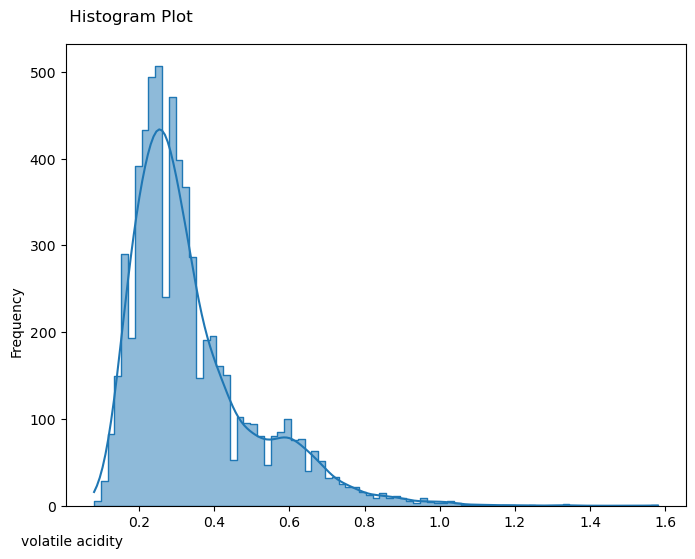

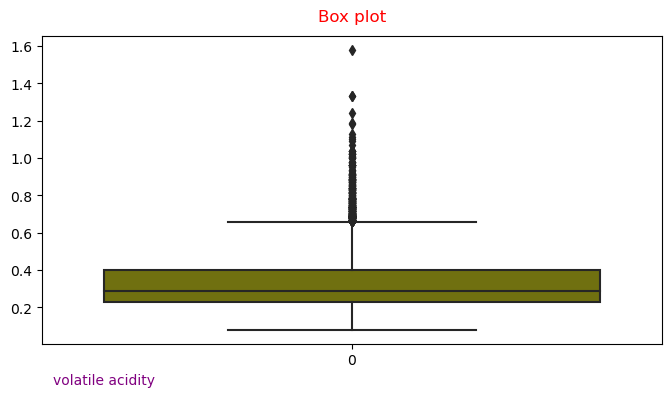

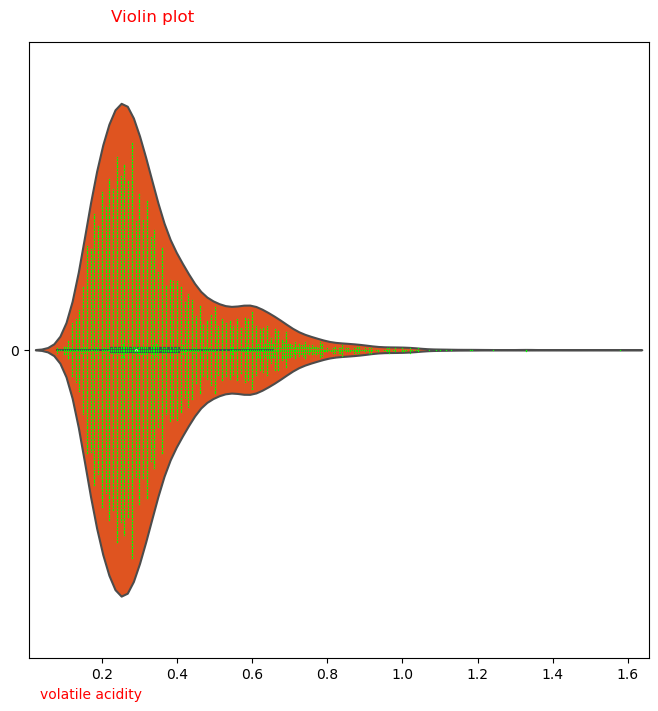

____________________ citric acid ____________________
mean of : 0.3187218971358176
min of:  0.0
max of:  1.66
std of  citric acid :  0.14526480053397803
variance  of  citric acid :  0.021101862274176424
skewness of  citric acid :  0.4730324266140668
Quantile of  citric acid :  0.14 0.25 0.31 0.39 0.49
Null Percentage of the  citric acid :  27.27272727272727


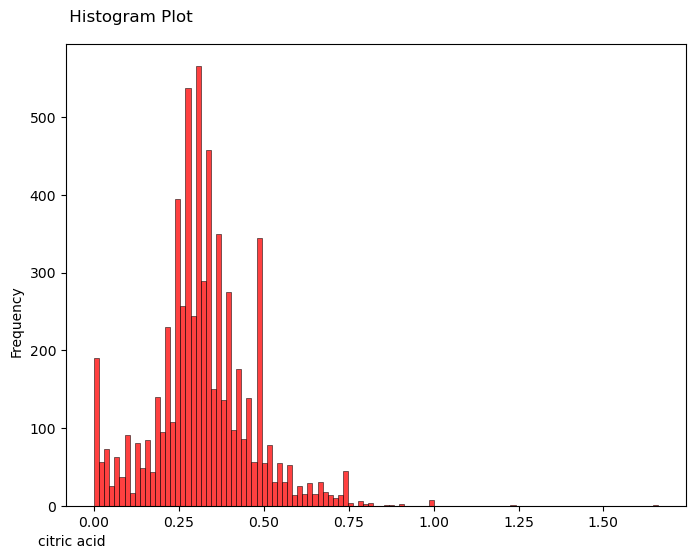

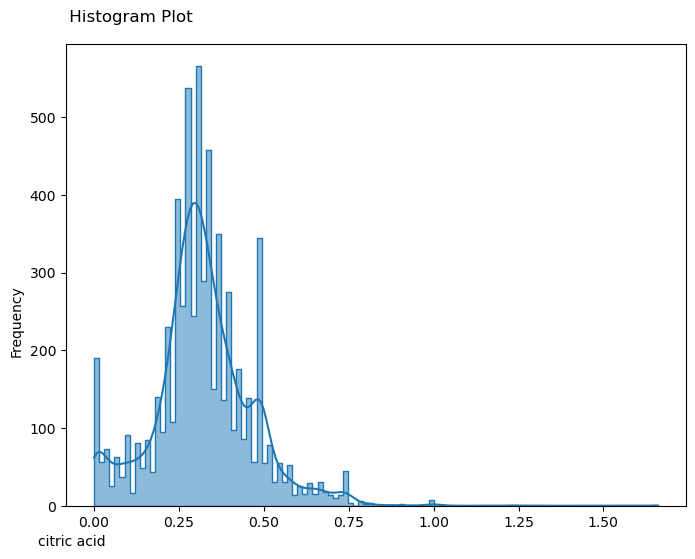

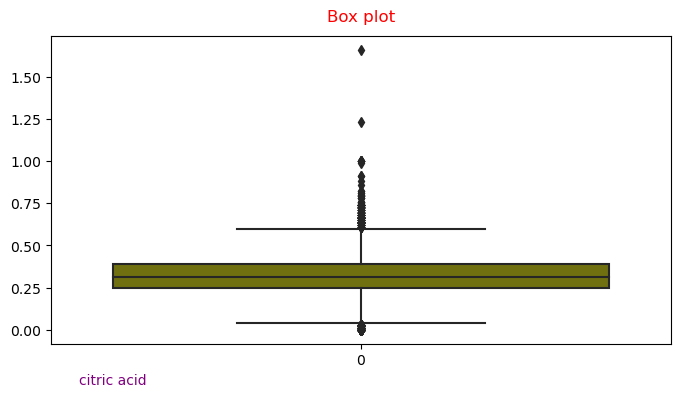

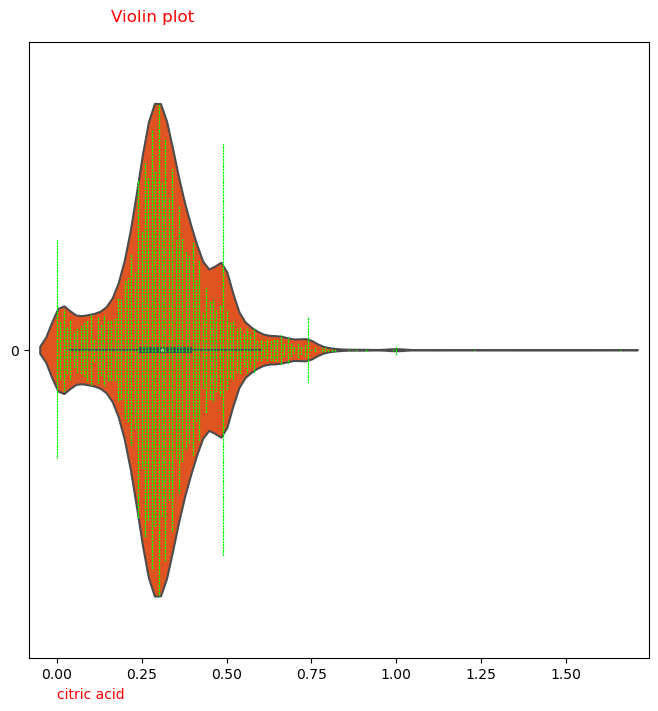

____________________ chlorides ____________________
mean of : 0.05604157043879908
min of:  0.009
max of:  0.611
std of  chlorides :  0.03503602522758969
variance  of  chlorides :  0.0012275230637483012
skewness of  chlorides :  5.399848762544374
Quantile of  chlorides :  0.031 0.038 0.047 0.065 0.086
Null Percentage of the  chlorides :  22.22222222222222


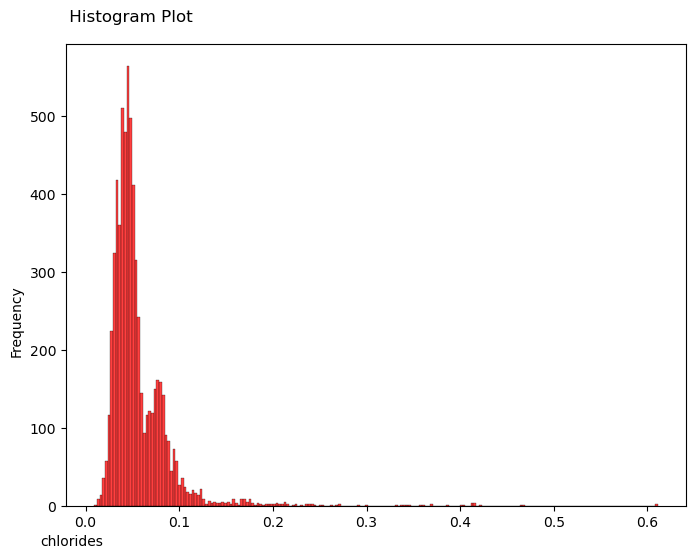

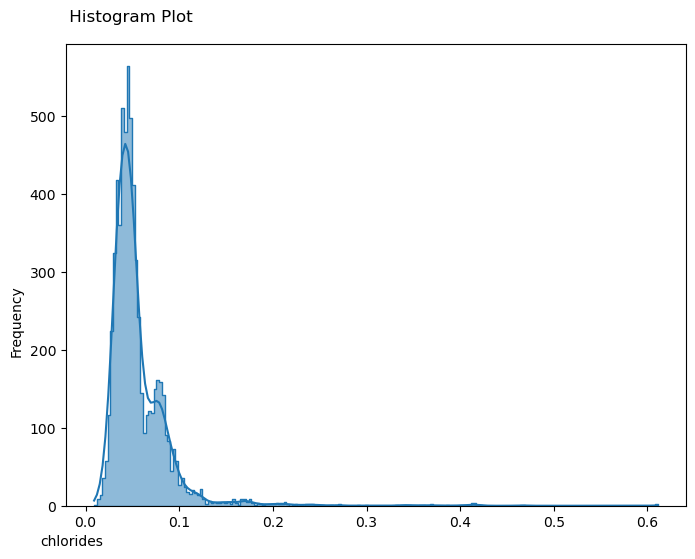

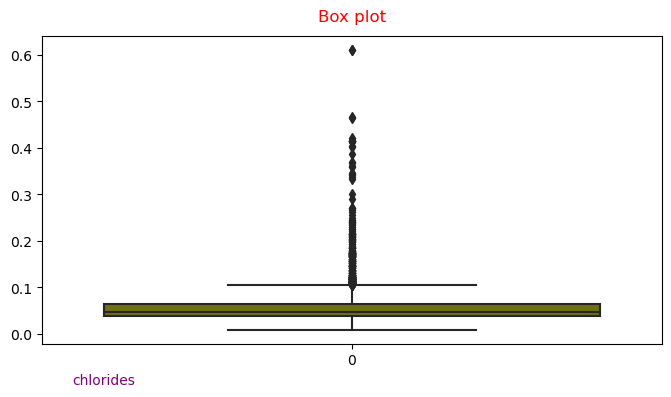

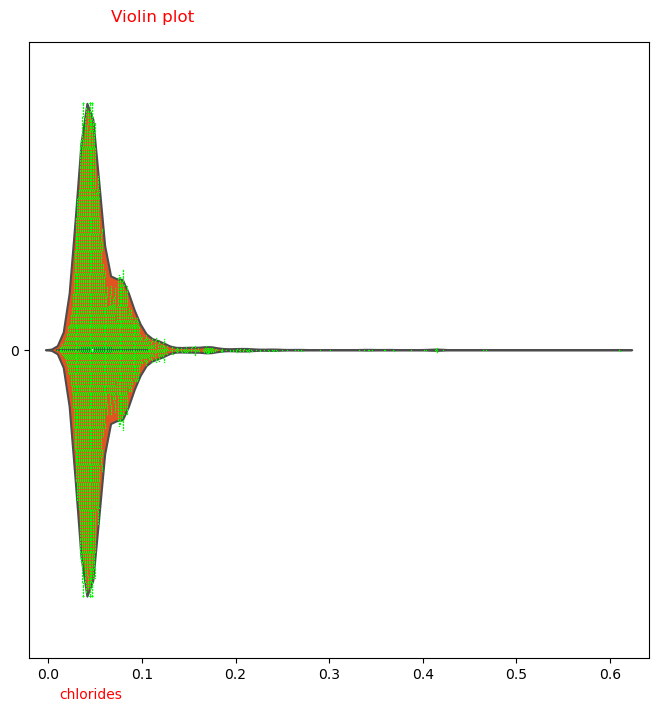

____________________ density ____________________
mean of : 0.9946966338309989
min of:  0.98711
max of:  1.03898
std of  density :  0.002998673003719037
variance  of  density :  8.992039783233351e-06
skewness of  density :  0.5036017301419994
Quantile of  density :  0.99067 0.99234 0.99489 0.99699 0.9984
Null Percentage of the  density :  0.0


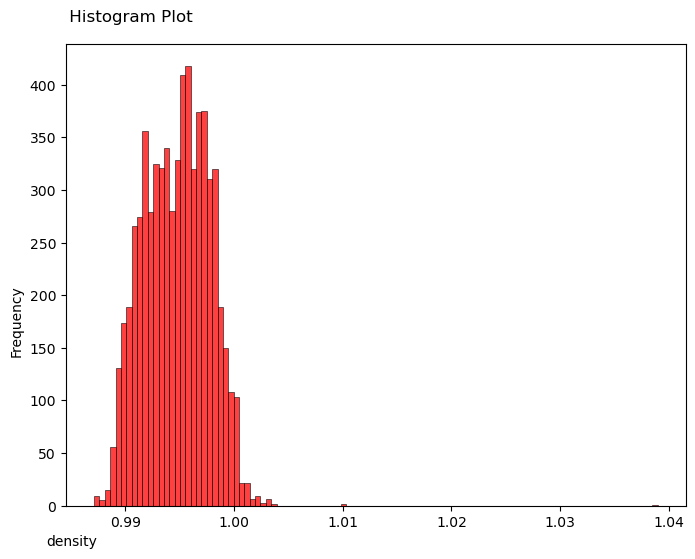

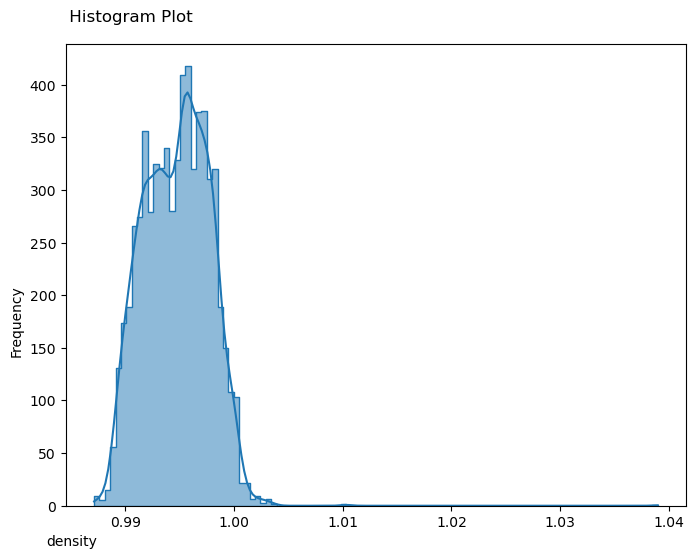

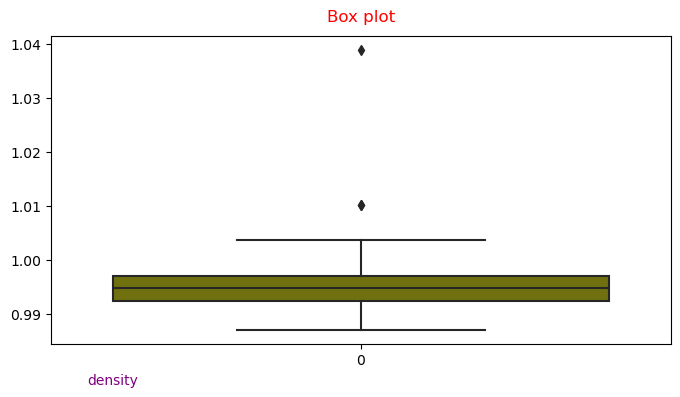

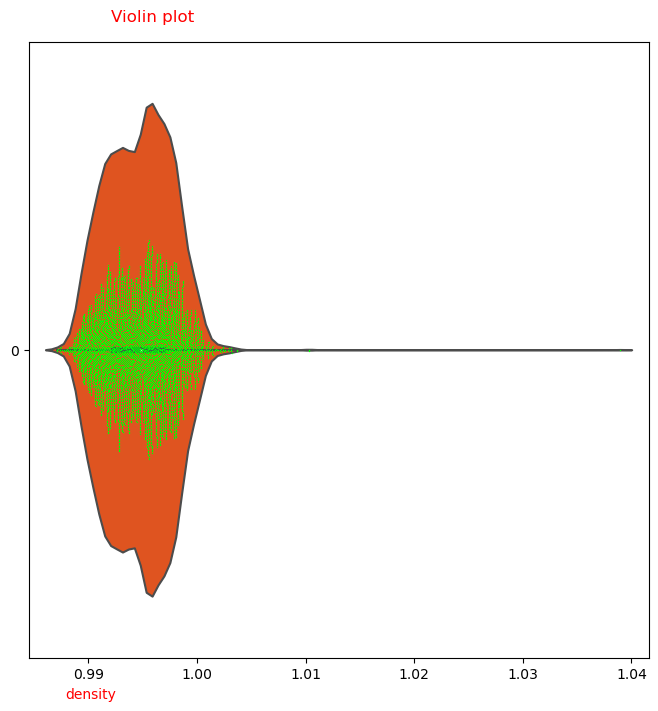

____________________ pH ____________________
mean of : 3.218395499383477
min of:  2.72
max of:  4.01
std of  pH :  0.16074830655088293
variance  of  pH :  0.025840018058976632
skewness of  pH :  0.3869659325699095
Quantile of  pH :  3.02 3.11 3.21 3.32 3.42
Null Percentage of the  pH :  450.0


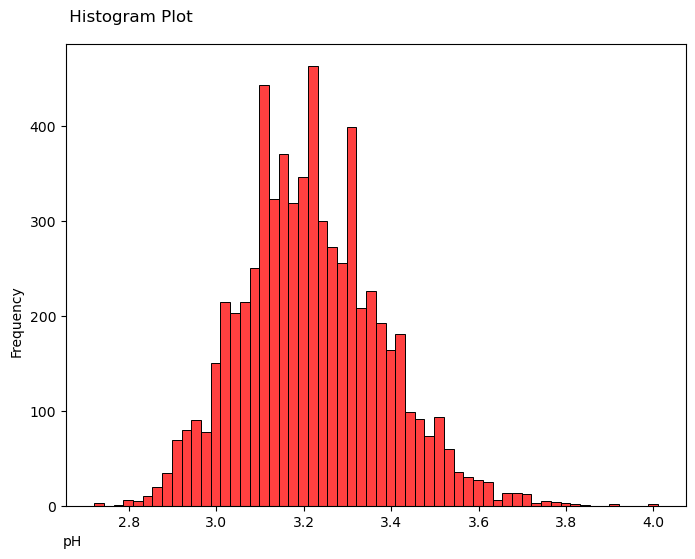

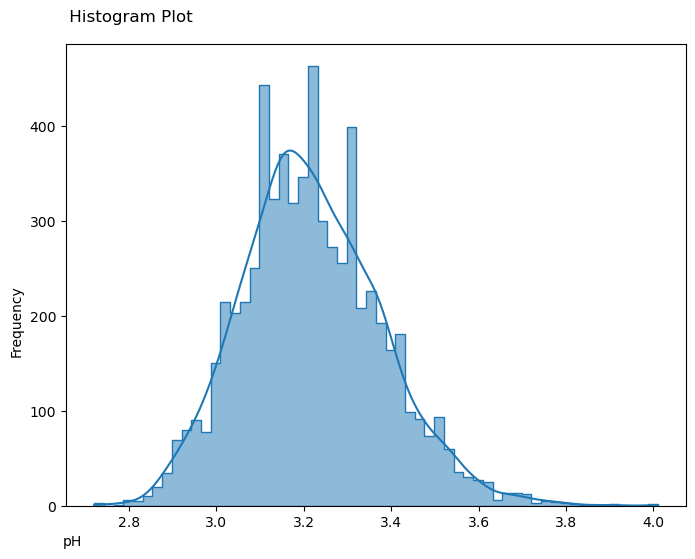

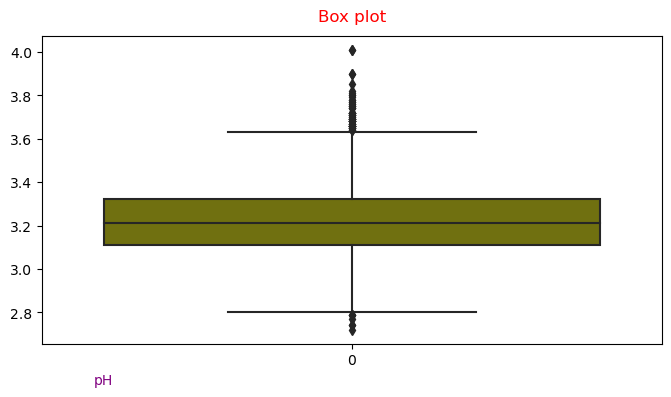

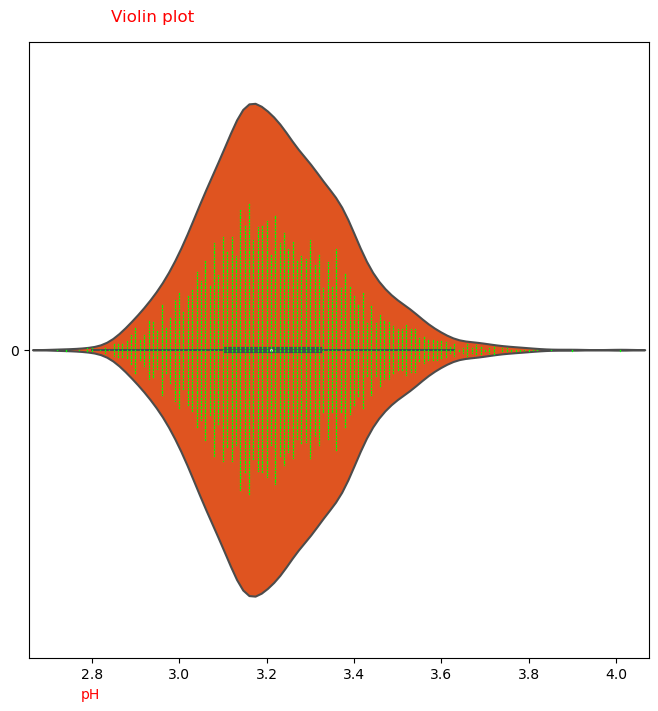

____________________ sulphates ____________________
mean of : 0.531215154782073
min of:  0.22
max of:  2.0
std of  sulphates :  0.14881412131628308
variance  of  sulphates :  0.02214564270313742
skewness of  sulphates :  1.798467034111248
Quantile of  sulphates :  0.37 0.43 0.51 0.6 0.72
Null Percentage of the  sulphates :  44.44444444444444


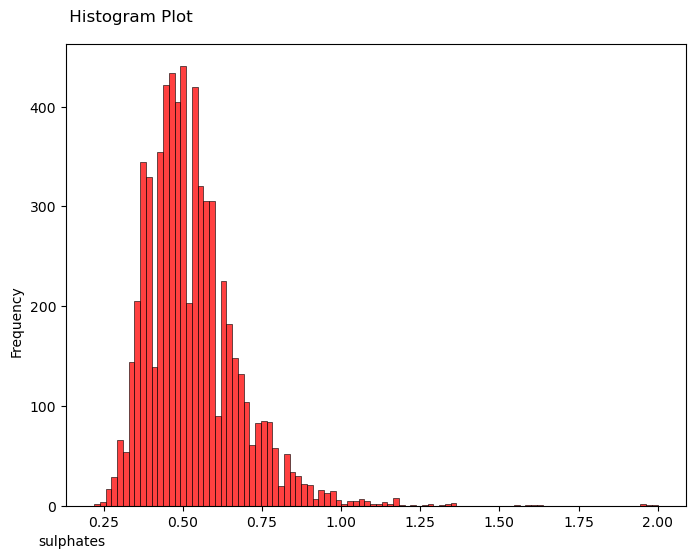

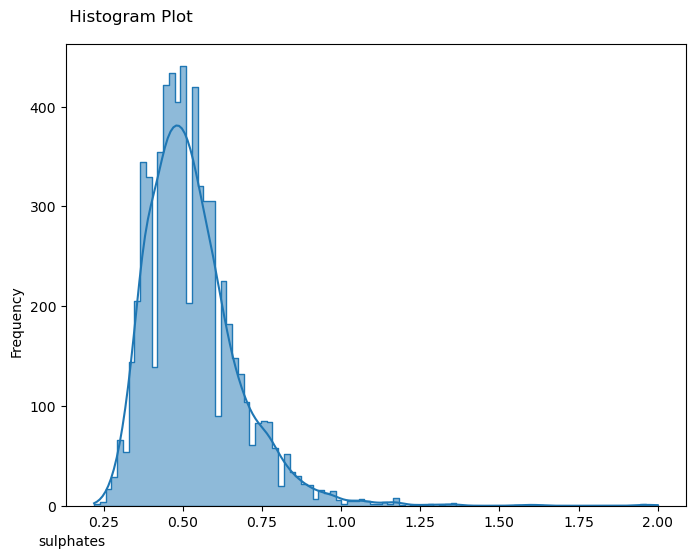

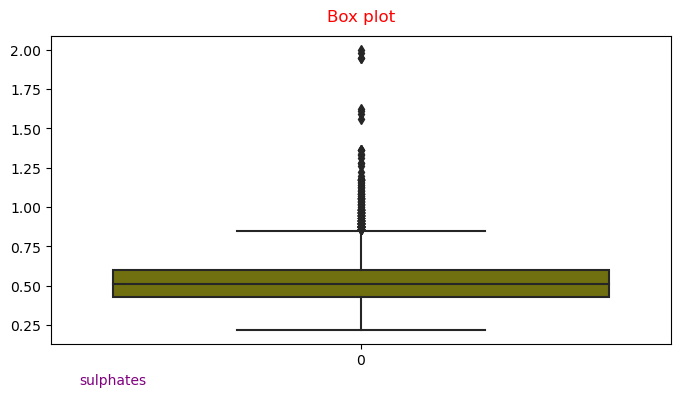

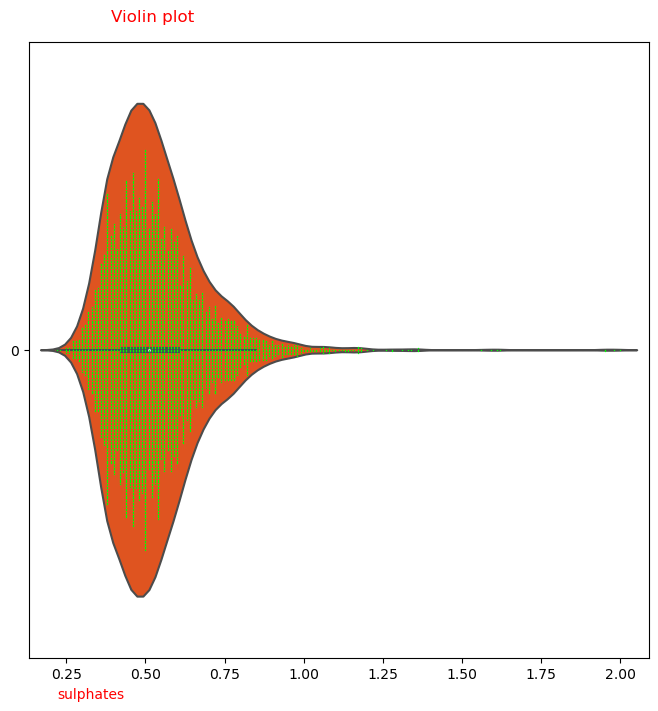

In [80]:
for col in num_columns :
    print ("_"*20,col,"_"*20)
    print("mean of :",df[col].mean())
    print("min of: ",df[col].min())
    print("max of: ",df[col].max())
    print("std of ",col,": ",df[col].std())
    print("variance  of ",col,": ",df[col].var())
    print("skewness of ",col,": ",df[col].skew())
    print ("Quantile of ",col,": ",df[col].quantile(0.10),df[col].quantile(0.25),df[col].quantile(0.50),df[col].quantile(0.75),df[col].quantile(0.90))
    print ("Null Percentage of the ",col,": ",df[col].isnull().sum()/len(col) * 100)

    plt.figure(figsize=(8,6))
    sns.histplot(df[col],color="red")
    plt.title(" Histogram Plot",x=0.1 ,y=1.03)
    plt.xlabel(col,x=.01,y=1.02)
    plt.ylabel("Frequency",y=.4) 
    plt.show()


    plt.figure(figsize=(8,6))
    sns.histplot(df[col],kde=True,element="step")
    plt.title(" Histogram Plot",x=0.1 ,y=1.03)
    plt.xlabel(col,x=.01,y=1.02)
    plt.ylabel("Frequency",y=.4) 
    plt.show()

    plt.figure(figsize=(8,4))
    # Box plot
    sns.boxplot(df[col],orient="V",color= "olive") 
    plt.title("Box plot",y=1.02, color= "red" )
    # plt.ylabel("")
    plt.xlabel(col, x=0.1,color= "purple" )
    plt.show()


    plt.figure(figsize=(8,8))
    # Violin Plot
    sns.violinplot(df[col],orient="h",color="orangered")
    sns.swarmplot(df[col],size=1,orient="h",color="lime")

    plt.title("Violin plot",x=0.2,y=1.02,color="Red" )
    plt.xlabel(col,size=10,x=0.1,color="Red")
    # plt.ylabel("")
    plt.show()


In [25]:
## Conclude and write down your observation.

____________________ fixed acidity ____________________

mean of : 7.2165793124710955

min of:  3.8

max of:  15.9 

 std of  fixed acidity :  1.2967498565264803 
 
 variance  of  fixed acidity :  1.6815601904014472 
 
 skewness of  fixed acidity :  1.7228045308969795 
 
 Quantile of  fixed acidity :  6.0 6.4 7.0 7.7 8.8 
 
 Null Percentage of the  fixed acidity :  76.92307692307693 

Fixed acidity Column has a extremly  symmetrical distribution with skew 1.72 which is greater then 1 which is data has some extreme values 

Density curve for Fixed acidity is centred around mean 7.21 with standard deviation of 1.29 .

Range of fixed acidity value is from minimum of 3.8 and maximum 15.9 . 

Most of the fixed acidity values are failling under the range of 7.7 .

10% of values  are of 6.0 and below. 25% of values  are of 6.4 and below.

50% of acidity values  are of 7.0 and below. 

75% of acidity values  are of 7.7 and below.

90% of fixed  acidity  values  are of 8.8 and below. 

fixed acidity Values  column has many  extreme values toward higher 8.8 and above.

fixed acidity  column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further. 

-------------------------------------------------------------------------------------------------------------------------------

____________________ volatile acidity ____________________

mean of : 0.33969101556480197

min of:  0.08

max of:  1.58

std of  volatile acidity :  0.16464902864429293

variance  of  volatile acidity :  0.027109302633509195

skewness of  volatile acidity :  1.4955115856471894

Quantile of  volatile acidity :  0.18 0.23 0.29 0.4 0.59

Null Percentage of the  volatile acidity :  50.0

volatile acidity Column has a extremly  symmetrical distribution with skew 1.49 which is greater then Positvie skewed  which means  data has some extreme values 


Density curve for volatile acidity is centred around mean 0.33 with standard deviation of 0.16 .

Range of volatile acidity value is from minimum of 0.08 and maximum 1.58 . 

Most of the volatile acidity values are failling under the range of 0.29 .

10% of volatile acidity  are of 0.18 and below.

25% of volatile acidity values  are of 0.23 and below.

50% of volatile acidity are of 0.29 and below.

75% of volatile acidity values  are of 0.4 and below.

90% of volatile acidity  values  are of 0.59 and below.

volatile acidity Values  column has many  extreme values toward higher 1.58 and above.

volatile acidity column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further.

-------------------------------------------------------------------------------------------------------------------------------

____________________ citric acid ____________________

mean of : 0.3187218971358176

min of:  0.0

max of:  1.66

std of  citric acid :  0.14526480053397803

variance  of  citric acid :  0.021101862274176424

skewness of  citric acid :  0.4730324266140668

Quantile of  citric acid :  0.14 0.25 0.31 0.39 0.49

Null Percentage of the  citric acid :  27.27272727272727


citric acid  Column has a symmetrical distribution with skew 0.47 which is is between -0.5 & 0.5, the data are nearly symmetrical. 

Density curve for citric acid is centred around mean 0.31 with standard deviation of 0.14 .

Range of citric acid value is from minimum of 0.00 and maximum 1.66 .

Most of the citric acid values are failling under the range of 0.49 . 

10% of citric acid are of 0.14 and below.

25% of citric acid values  are of 0.25 and below. 

50% of citric acid are of 0.31 and below.

75% of citric acid values  are of 0.39 and below.

90% of citric acid  values  are of 0.49 and below.

citric acid Values  column has symmetrical kernel .

citric acid column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further.


---------------------------------------------------------------------------------------------------------------------------

____________________ residual sugar  ____________________

mean of : 5.444326404926867

min of:  0.6

max of:  65.8

std of  residual sugar :  4.758124742672707

variance  of  residual sugar :  22.63975106683421

skewness of  residual sugar :  1.4349998392718966

Quantile of  residual sugar :  1.3 1.8 3.0 8.1 13.0

Null Percentage of the  residual sugar :  14.285714285714285


residual sugar Column has a extremly  symmetrical distribution with skew 1.43 which is greater then Positvie skewed  which means  data has some extreme values 

Density curve forresidual sugar is centred around mean 5.44 with standard deviation of 4.75 .

Range of residual sugar value is from minimum of 0.06 and maximum 65.8 .

Most of the residual sugar values are failling under the range of 8.1 . 

10% of residual sugar are of 1.3 and below. 

25% of residual sugar values  are of 1.8 and below.

50% of residual sugar are of 3.0 and below.

75% of residual sugar values are of 8.1 and below.

90% of residual sugar values  are of 13.0 and below.

residual sugar Values  column has many  extreme values toward higher 13.0 above.

residual sugar column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further.


---------------------------------------------------------------------------------------------------------------------------

_________________ chlorides ____________________

mean of : 0.05604157043879908

min of:  0.009

max of:  0.611

std of  chlorides :  0.03503602522758969

variance  of  chlorides :  0.0012275230637483012

skewness of  chlorides :  5.399848762544374

Quantile of  chlorides :  0.031 0.038 0.047 0.065 0.086

Null Percentage of the  chlorides :  22.22222222222222



chlorides Column has a extremly  symmetrical distribution with skew 5.3 which is greater then Positvie skewed  which means  data has some extreme values 

Density curve chlorides is centred around mean 0.05 with standard deviation of 0.03 .

Range of chlorides value is from minimum of 0.009 and maximum 0.611 

Most of the chlorides values are failling under the range of 0.086 .

10% of chlorides are of 0.031 and below.

25% of chlorides values  are of 0.031 and below.

50% of chlorides are of 0.047 and below.

75% ofchlorides values are of 0.065 and below. 

90% of chlorides values  are of 0.086 and below.

chlorides Values  column has many  extreme values toward higher 0.086 above.

chlorides column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further.


---------------------------------------------------------------------------------------------------------------------------

_________________ free sulfur dioxide ____________________

mean of : 30.525319378174544

min of:  1.0

max of:  289.0

std of  free sulfur dioxide :  17.749399772002565

variance  of  free sulfur dioxide :  315.04119226636476

skewness of  free sulfur dioxide :  1.2200660740665203

Quantile of  free sulfur dioxide :  9.0 17.0 29.0 41.0 54.0

Null Percentage of the  free sulfur dioxide :  0.0


free sulfur dioxide Column has a extremly  symmetrical distribution with skew 1.22 which is greater then Positvie skewed  which means  data has some extreme values 

Density curve free sulfur dioxide is centred around mean 30.52 with standard deviation of 17.74 .

Range of free sulfur dioxide value is from minimum of 1.09 and maximum 289.0 

Most of the free sulfur dioxide values are failling under the range of 54.

10% of free sulfur dioxide are of 9.0 and below. 

25% of free sulfur dioxide values  are of 17.0 and below.

50% of free sulfur dioxide are of 29.0 and below. 

75% of free sulfur dioxide values are of 41.0 and below. 

90% of free sulfur dioxide values  are of 54.0 and below.

free sulfur dioxide  column has many  extreme values toward higher 54.0 above.

free sulfur dioxide column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further.



---------------------------------------------------------------------------------------------------------------------------

   
_________________ total sulfur dioxide ____________________

mean of : 115.7445744189626

min of:  6.0

max of:  440.0

std of  total sulfur dioxide :  56.52185452263032

variance  of  total sulfur dioxide :  3194.7200386773857

skewness of  total sulfur dioxide :  -0.001177478234437964

Quantile of  total sulfur dioxide :  30.0 77.0 118.0 156.0 188.0

Null Percentage of the  total sulfur dioxide :  0.0



total sulfur dioxide Column has a symmetrical distribution with skew -0.0011 which is is between -0.5 & 0.5, the data are nearly symmetrical. 

Density curve for total sulfur dioxide is centred around mean 115.744 with standard deviation of 56.52 .

Range of  total sulfur dioxide value is from minimum of 6.0 and maximum  440 . 

Most of the  total sulfur dioxide values are failling under the range of 188 .

10% of  total sulfur dioxide are of 30.0 and below.

25% of  total sulfur dioxide values  are of 77.0 and below.

50% of  total sulfur dioxide are of 118.0 and below.

75% of  total sulfur dioxide values  are of 156.0 and below.

90% of  total sulfur dioxide  values  are of 188.0 and below.

total sulfur dioxide  column has symmetrical kernel .

 total sulfur dioxide column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further.


---------------------------------------------------------------------------------------------------------------------------

   
____________________ density ____________________

mean of : 0.9946966338309989

min of:  0.98711

max of:  1.03898

std of  density :  0.002998673003719037

variance  of  density :  8.992039783233351e-06

skewness of  density :  0.5036017301419994

Quantile of  density :  0.99067 0.99234 0.99489 0.99699 0.9984

Null Percentage of the  density :  0.0




total density Column has a symmetrical distribution with skew  0.50 which is is between -0.5 & 0.5, the data are nearly symmetrical. 

Density curve for density is centred around mean 0.99 with standard deviation of 0.002 .

Range of  density value is from minimum of  0.98 and maximum 1.03 . 

Most of the  total density values are failling under the range of 8.99 .

10% of  total density are of 0.99 and below.

25% of  total density values  are of 0.99234 and below.

50% of  total density are of 0.994 and below.

75% of  total density values  are of 0.996 and below.

90% of  total density  values  are of 0.998 and below.

density  column has symmetrical kernel .

 density column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further.

---------------------------------------------------------------------------------------------------------------------------

   
____________________ pH ____________________

mean of : 3.218395499383477

min of:  2.72

max of:  4.01

std of  pH :  0.16074830655088293

variance  of  pH :  0.025840018058976632

skewness of  pH :  0.3869659325699095

Quantile of  pH :  3.02 3.11 3.21 3.32 3.42

Null Percentage of the  pH :  450.0



pH Column has a symmetrical distribution with skew 0.38 which is is between -0.5 & 0.5, the data are nearly symmetrical. 

Density curve for pH is centred around mean 3.21 with standard deviation of 0.16 .

Range of  total pH value is from minimum of 2.72 and maximum  4.01 . 

Most of the  total pH values are failling under the range of 0.025 .

10% of  total pH are of 3.02 and below.

25% of  total pH values  are of 3.11 and below.

50% of  total pH are of 3.21 and below.

75% of  total pH values  are of 3.32 and below.

90% of  total sulfur dioxide  values  are of 3.42 and below.

total pH  column has symmetrical kernel .

pH column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further.


---------------------------------------------------------------------------------------------------------------------------

   
____________________ sulphates ____________________


mean of : 0.531215154782073

min of:  0.22

max of:  2.0

std of  sulphates :  0.14881412131628308

variance  of  sulphates :  0.02214564270313742

skewness of  sulphates :  1.798467034111248

Quantile of  sulphates :  0.37 0.43 0.51 0.6 0.72

Null Percentage of the  sulphates :  44.44444444444444





sulphates Column  has a non symmetrical distribution with skew 1.79 which is greater then Positive skewed  which means  data 
has some extreme values



Density curve for sulphates is centred around mean 0.53 with standard deviation of 0.14 .

Range of  sulphates value is from minimum of 0.22 and maximum  2.0 . 

Most of the  sulphates values are failling under the range of 188 .

10% of  sulphates are of 0.37 and below.

25% of  sulphates values  are of 0.43 and below.

50% of  sulphates are of 0.51 and below.

75% of  sulphates values  are of 0.6 and below.

90% of  sulphates  values  are of 0.72 and below.

total sulphates  column has symmetrical kernel .


sulphates column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further.


---------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------

____________________ alcohol ____________________

mean of : 10.491800831149455

min of:  8.0

max of:  14.9

std of  alcohol :  1.1927117488689747

variance  of  alcohol :  1.4225613158900883

skewness of  alcohol :  0.5657177290960251

Quantile of  alcohol :  9.1 9.5 10.3 11.3 12.3

Null Percentage of the  alcohol :  0.0




alcohol Column has a slightly symmetrical distribution with skew 0.56 which is is between 0.5 & 1(positive skewed), the data are slightly skewed..

Density curve for alcohol is centred around mean 10.491 with standard deviation of 1.19 .

Range of  alcohol value is from minimum of 8.0 and maximum  14.9 . 

Most of the  alcohol values are failling under the range of 12.3 .

10% of  alcohol are of 9.1 and below.


25% of alcohol values  are of 9.5 and below.

50% of  alcohol are of 10.3 and below.

75% of  alcohol values  are of 11.3 and below.

90% of  alcohol  values  are of 12.3 and below.

total alcohol  column has symmetrical kernel .

alcohol column could be a good predictor for Quality of the wine  and it's relation with other columns should be explored further.


---------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------


The report provides an analysis of various chemical properties of wine, specifically focusing on fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, and sulphates. 

The analysis reveals that the fixed acidity column has an extremely symmetrical distribution with a skewness of 1.72, indicating the presence of some extreme values. The density curve for fixed acidity is centered around a mean of 7.21, with a standard deviation of 1.29. The column has a wide range of values, from 3.8 to 15.9, with most values falling below 7.7. The null percentage for fixed acidity is 76.92%. Based on these findings, the fixed acidity column could be a good predictor for the quality of the wine, and further exploration of its relation with other columns is recommended.

Similar analyses are conducted for other chemical properties, such as volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, and sulphates. Each property is evaluated in terms of its distribution, range, null percentage, and potential as a predictor for wine quality. In general, these properties exhibit varying levels of symmetry and skewness, and some columns contain extreme values.

Overall, the report highlights the potential of several chemical properties to serve as predictors for wine quality. Further investigation into the relationships between these properties and wine quality is recommended to gain deeper insights.

## Do Categortical  Analysis of Columns

In [26]:
#  Categorical column analysis 
#  You can learn about their count values and their percentage.
# value_counts allows you to find the number of each category in the that column.
#  Count plot.

# find no. of unique values and what are those unique values.

#  Word cloud to create most frequently occuring words.

In [32]:
categorical_columns=['type','quality' ] 

__________________________________________________ type __________________________________________________
unique  of:  ['white' 'red']
count of :  type
white    4898
red      1599
Name: count, dtype: int64
0.0


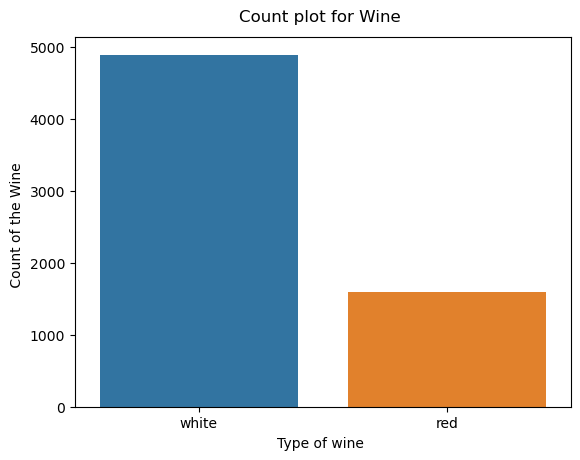

__________________________________________________ quality __________________________________________________
unique  of:  [6 5 7 8 4 3 9]
count of :  quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64
0.0


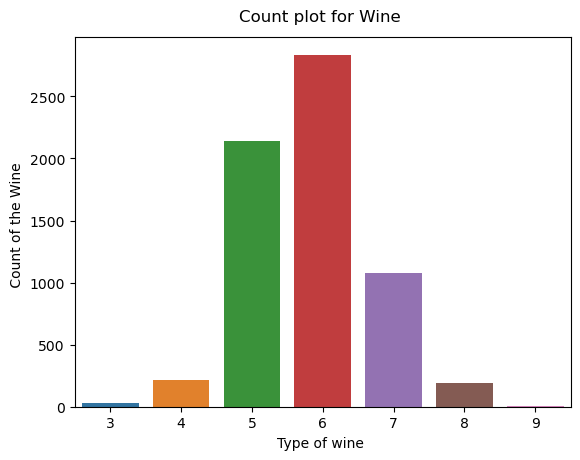

In [33]:
for cat in categorical_columns:
    print ("_"*50,cat,"_"*50)
    print("unique  of: ",df[cat].unique())
    print("count of : ",df[cat].value_counts())
    print (df[cat].isnull().sum()/len(df[cat]) * 100)
    
    
    sns.countplot(x=df[cat])
    plt.title("Count plot for Wine ",y=1.02)
    plt.xlabel("Type of wine ")
    plt.ylabel(" Count of the Wine  ")
    plt.show() 


Observation Based on the charts representation the two categorical columns has no Null values and both of the columns data are the Integer 


__________________________________________________ type __________________________________________________

unique  of:  ['white' 'red']

count of :  type

white    4898

red      1599

Name: count, dtype: int64
0.0

Type columns has two unique values which is Red and White and the value count are as below 

white    4898

red      1599

and Data type is Interger and this categorical column  will help us in the further analysis with different aspects natures of the numerical coulmns 


__________________________________________________ quality __________________________________________________

unique  of:  [6 5 7 8 4 3 9]

count of :  quality

6    2836

5    2138

7    1079

4     216

8     193

3      30

9       5

Name: count, dtype: int64
0.0


Quality  column has 7 unique values out of 10 Rating which means some of the wines  are not  reached upto the   marked qualities.

Count of the Quality ratings are as Below 

6    2836

5    2138

7    1079

4     216

8     193

3      30

9       5

and Data type is Interger and this categorical column  will help us in the further analysis with different aspects natures of the other  numerical coulmns 

In [29]:
## Conclude and write down your observation.

Based on the provided data, two categorical columns have no null values, and both columns contain integer data. 

The "type" column has two unique values: "white" and "red". The count of each value is as follows: "white" (4898) and "red" (1599). This categorical column with integer data will be valuable for further analysis, providing insights into the characteristics of the numerical columns.

The "quality" column has 7 unique values, representing ratings on a scale of 1 to 10. The count of each quality rating is as follows: 6 (2836), 5 (2138), 7 (1079), 4 (216), 8 (193), 3 (30), and 9 (5). This categorical column with integer data will also contribute to the analysis by providing information about the nature of the other numerical columns.

Overall, these categorical columns with integer data will play a significant role in understanding the relationships and patterns within the dataset.

## Combine Numerical and categorical columns for analysis

In [34]:
num_columns=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       ]

In [35]:
categorical_columns=['type','quality' ] 


In [36]:
num_columns_1=['alcohol','sulphates','density', 'pH','total sulfur dioxide','free sulfur dioxide', 'residual sugar','fixed acidity','chlorides', 'volatile acidity', 'citric acid']

__________________________________________________ volatile acidity __________________________________________________
type
red      0.435007
white    0.277432
Name: volatile acidity, dtype: float64


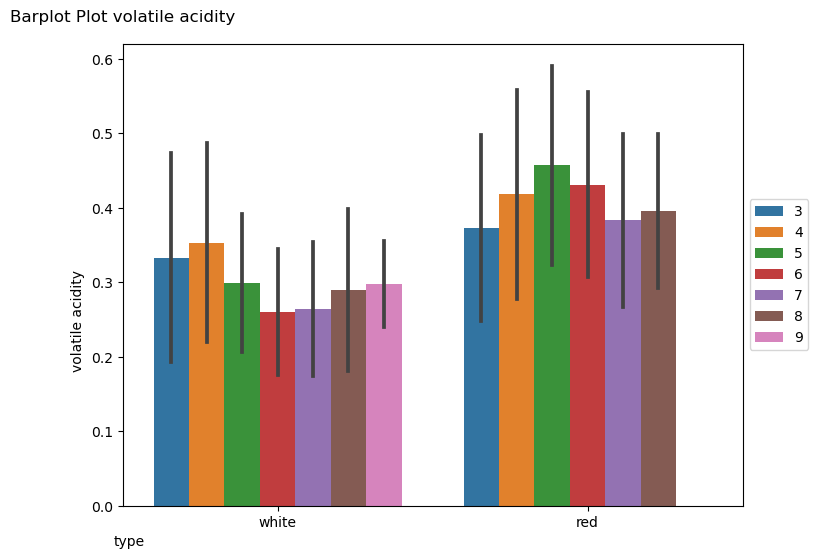

<Figure size 800x600 with 0 Axes>

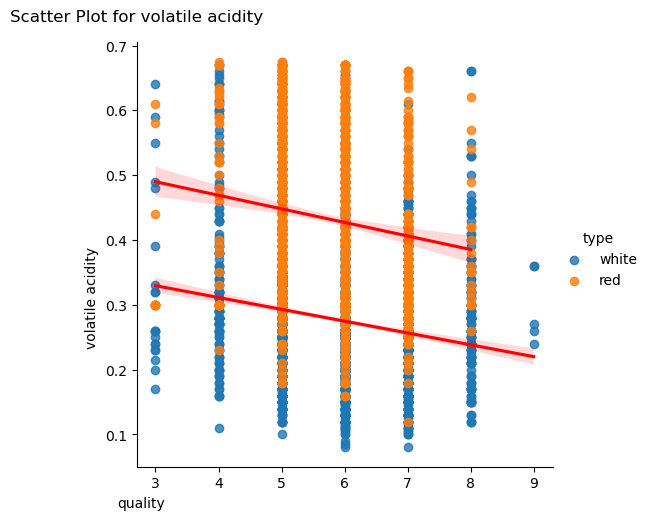

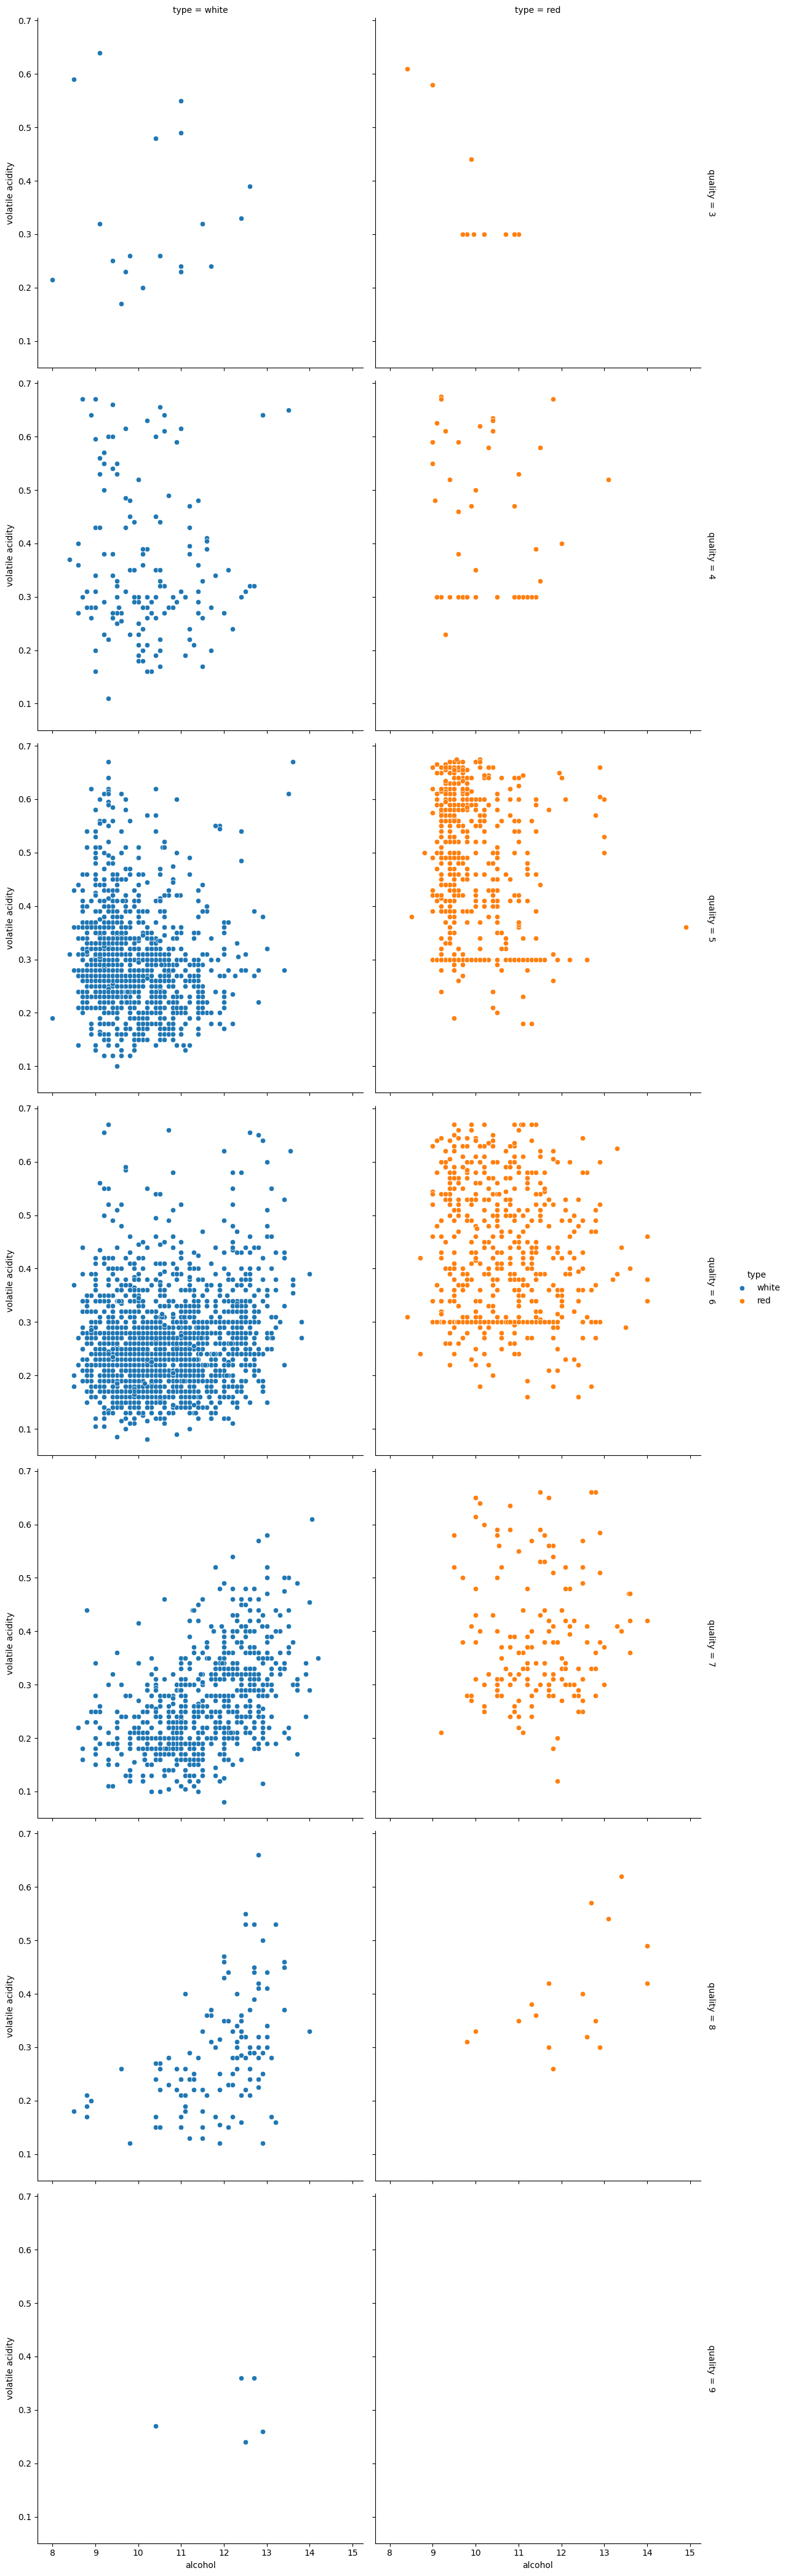

<Figure size 1000x1000 with 0 Axes>

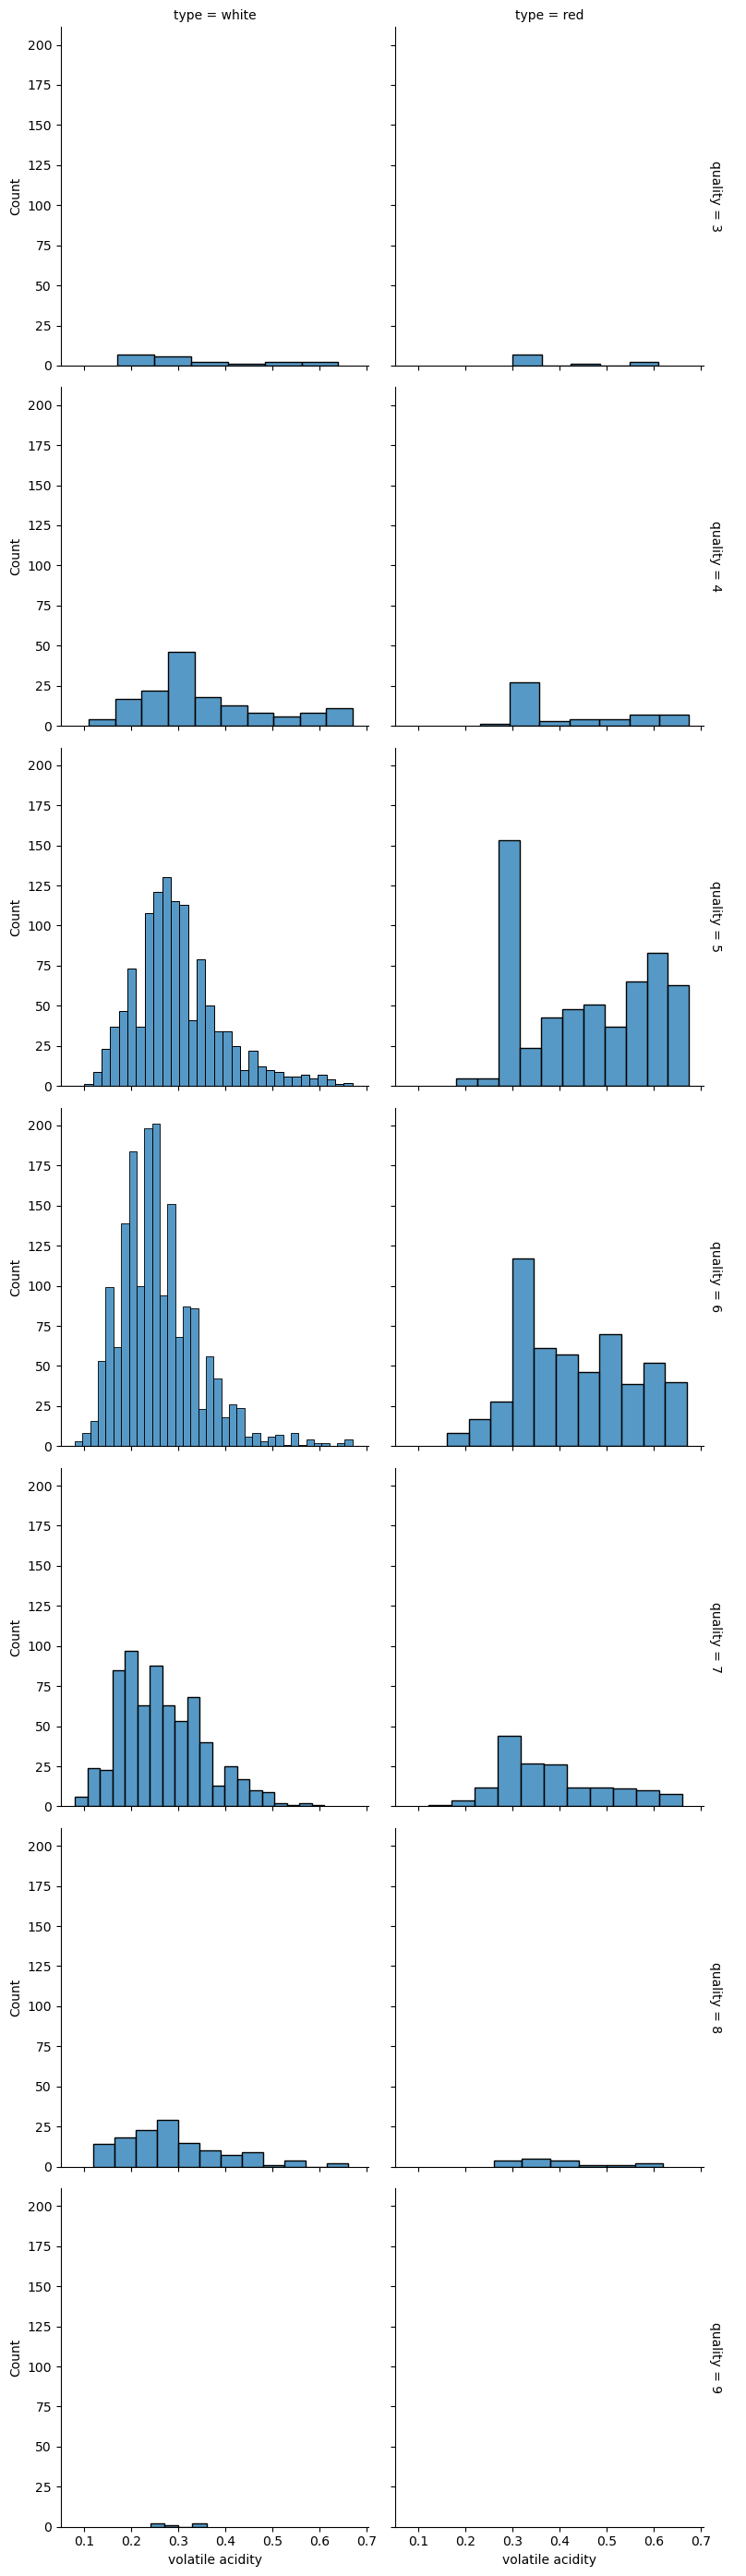

__________________________________________________ citric acid __________________________________________________
type
red      0.258587
white    0.323869
Name: citric acid, dtype: float64


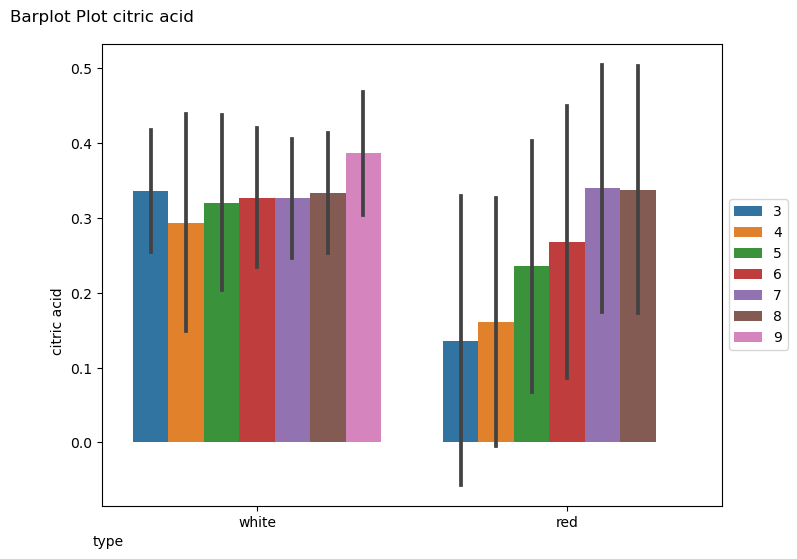

<Figure size 800x600 with 0 Axes>

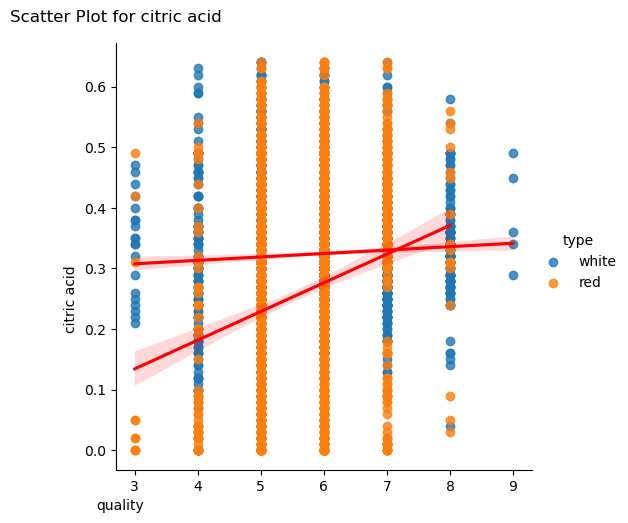

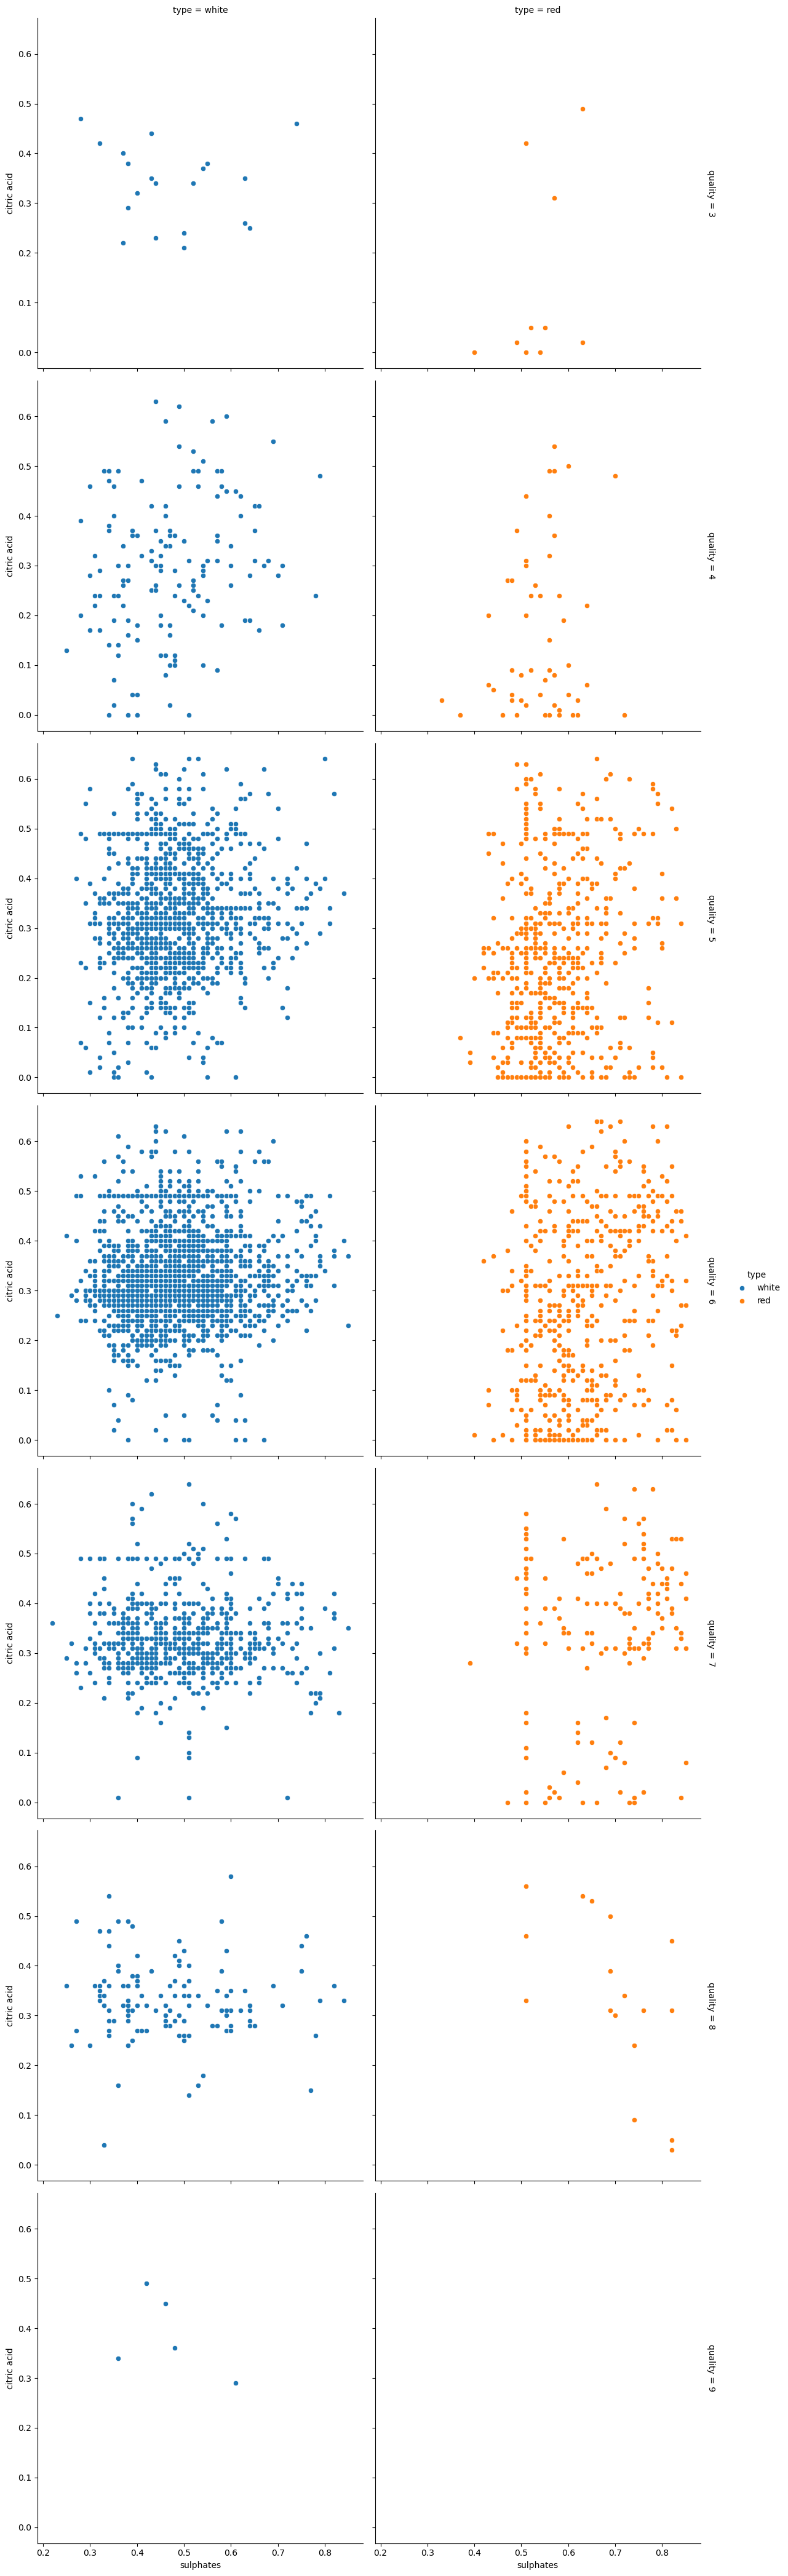

<Figure size 1000x1000 with 0 Axes>

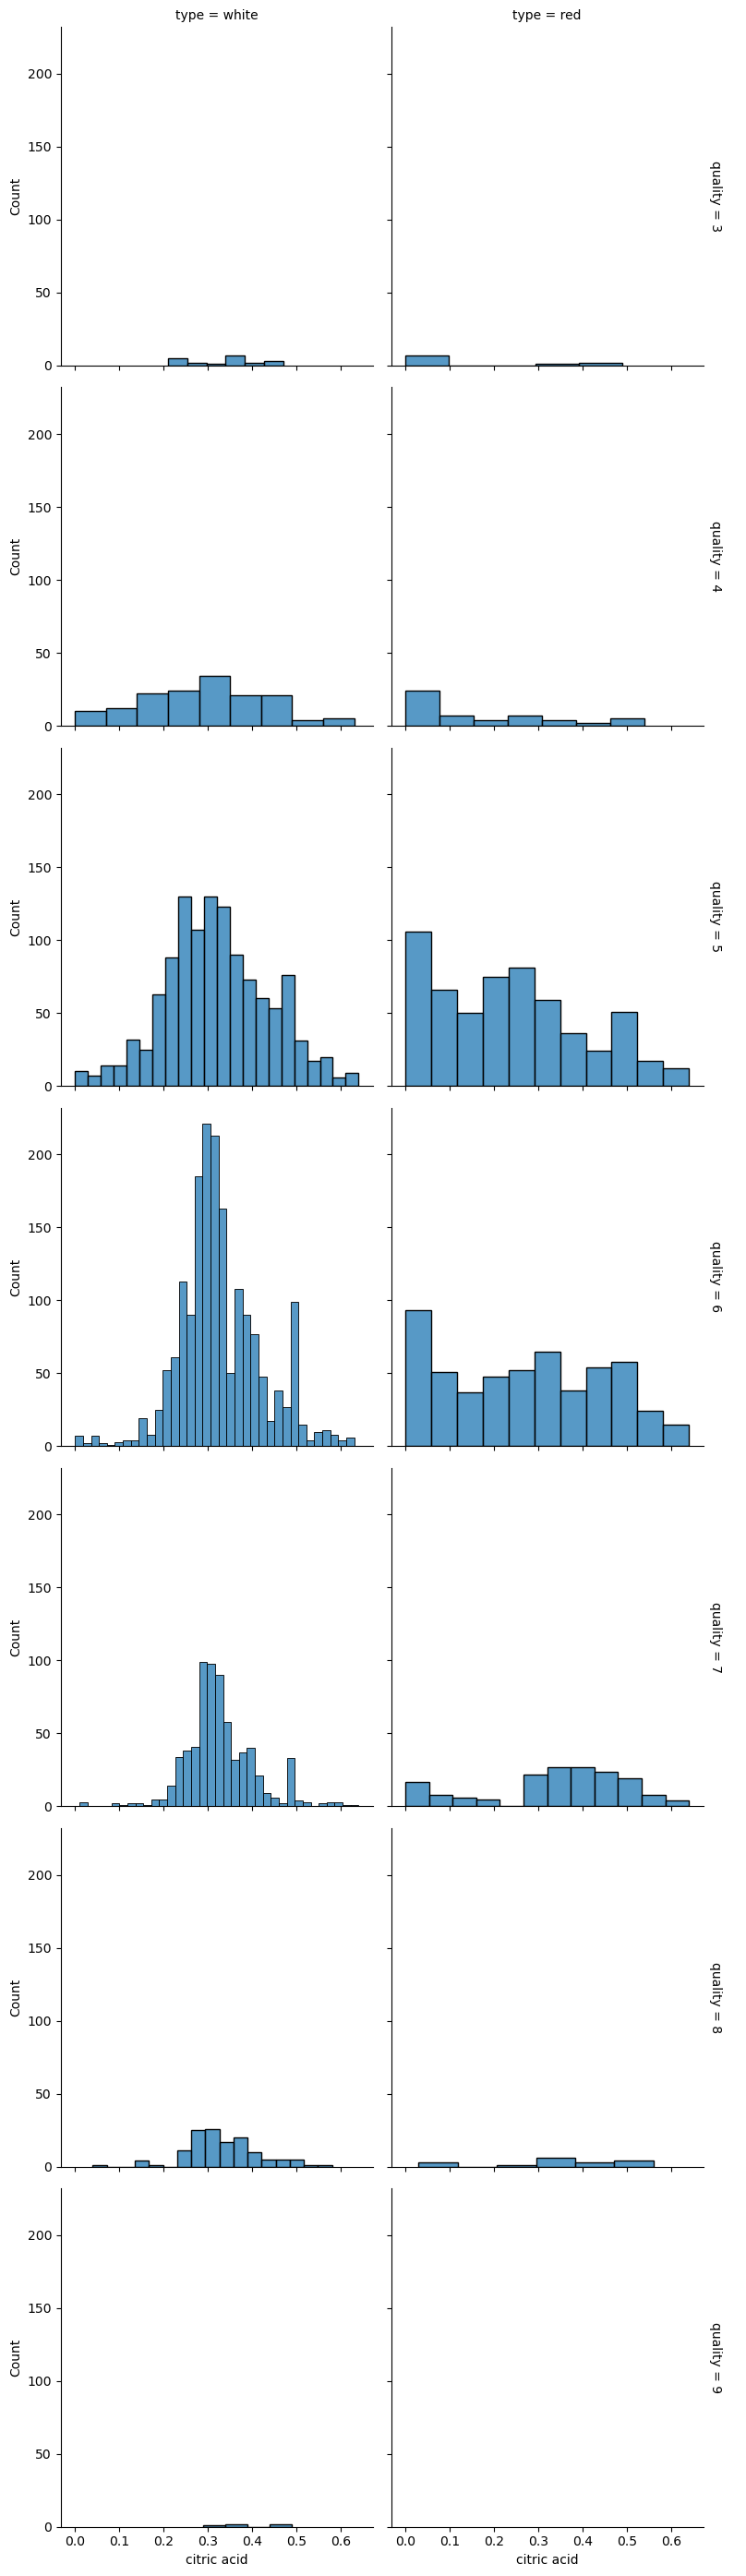

__________________________________________________ chlorides __________________________________________________
type
red      0.073698
white    0.043070
Name: chlorides, dtype: float64


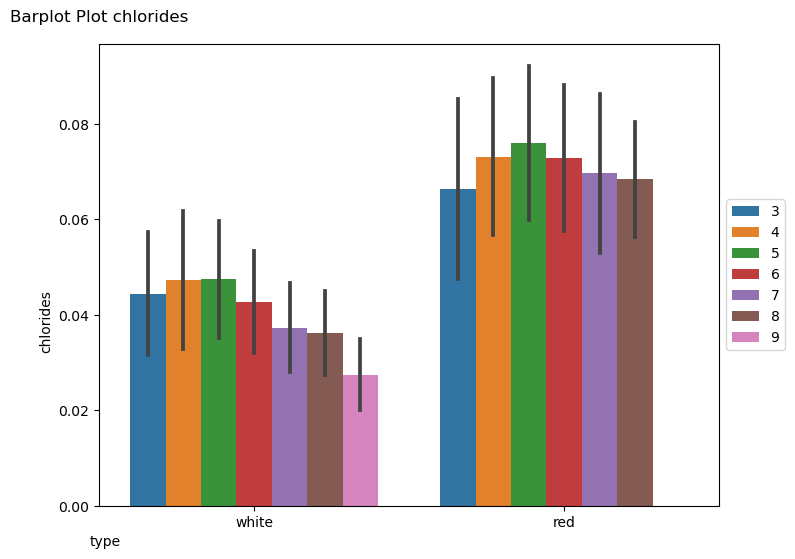

<Figure size 800x600 with 0 Axes>

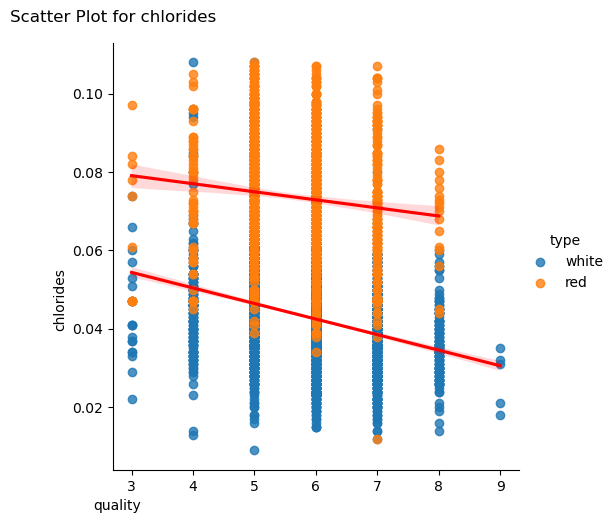

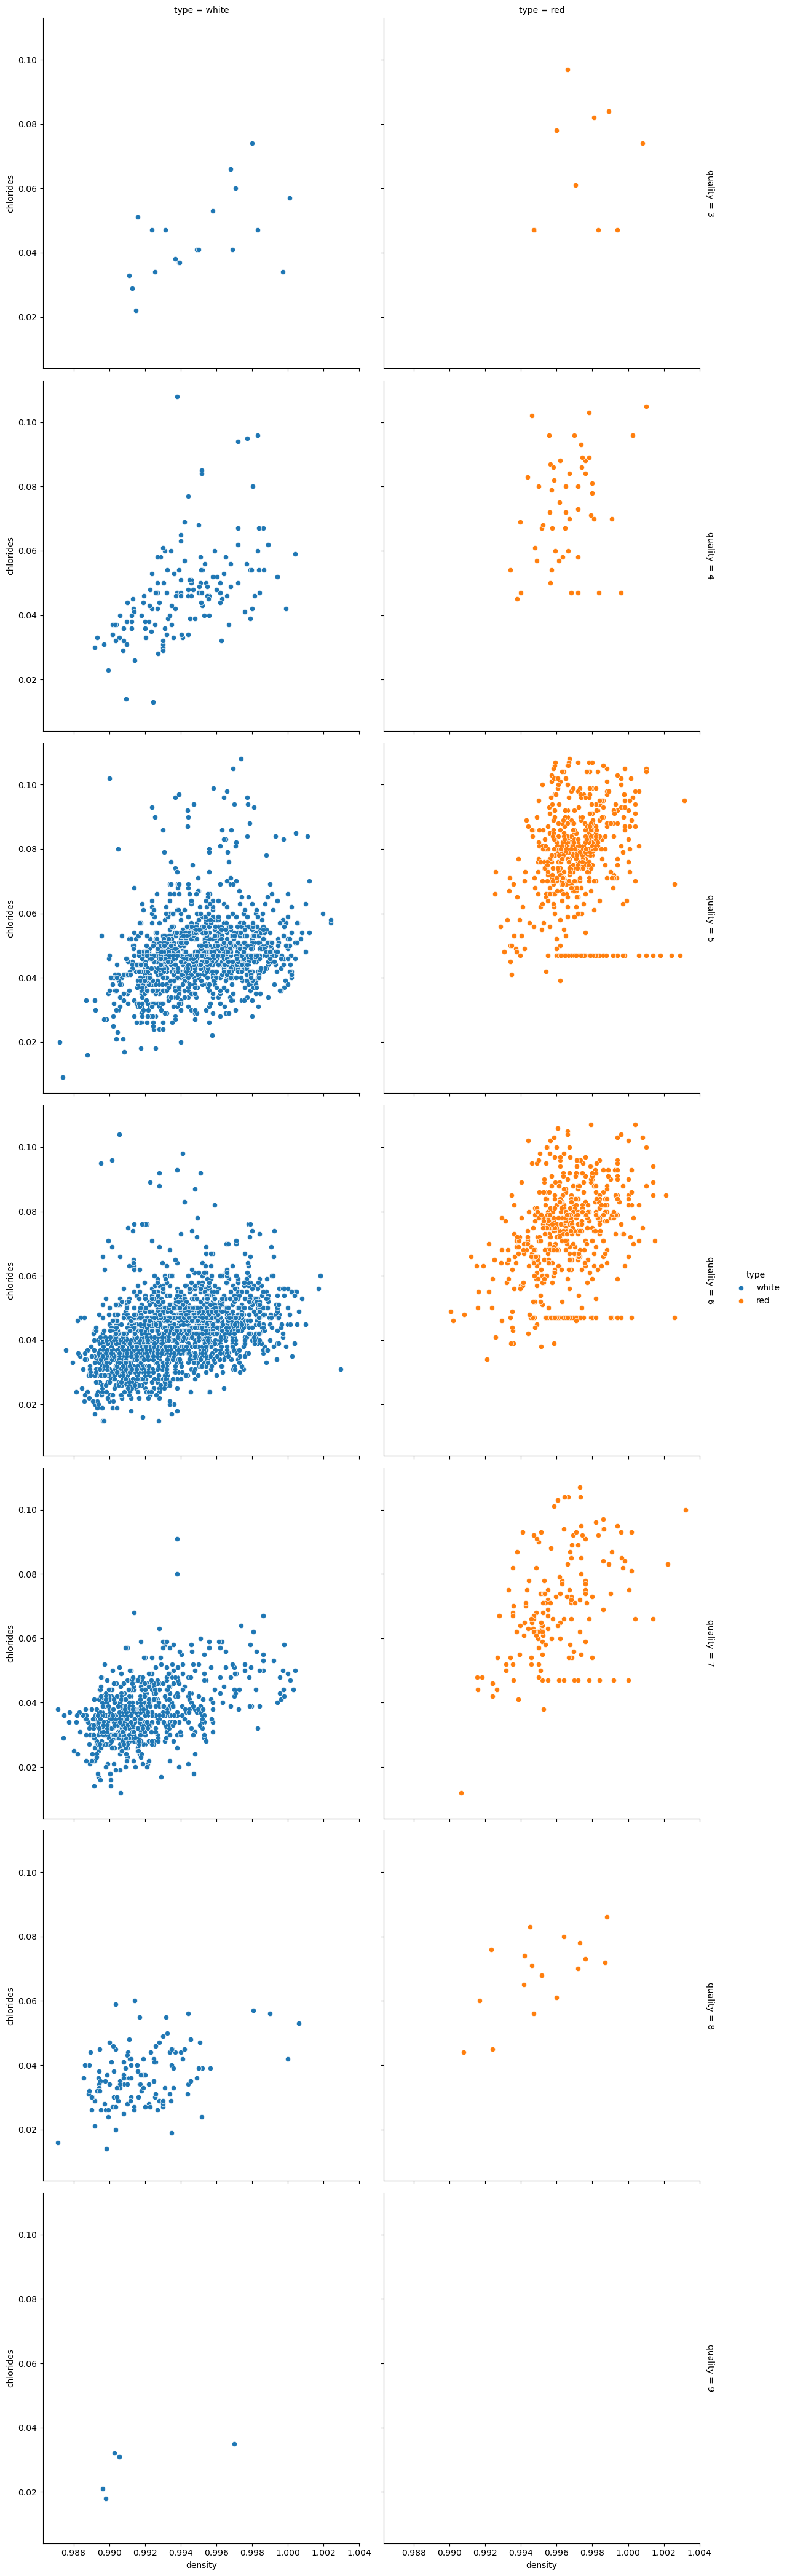

<Figure size 1000x1000 with 0 Axes>

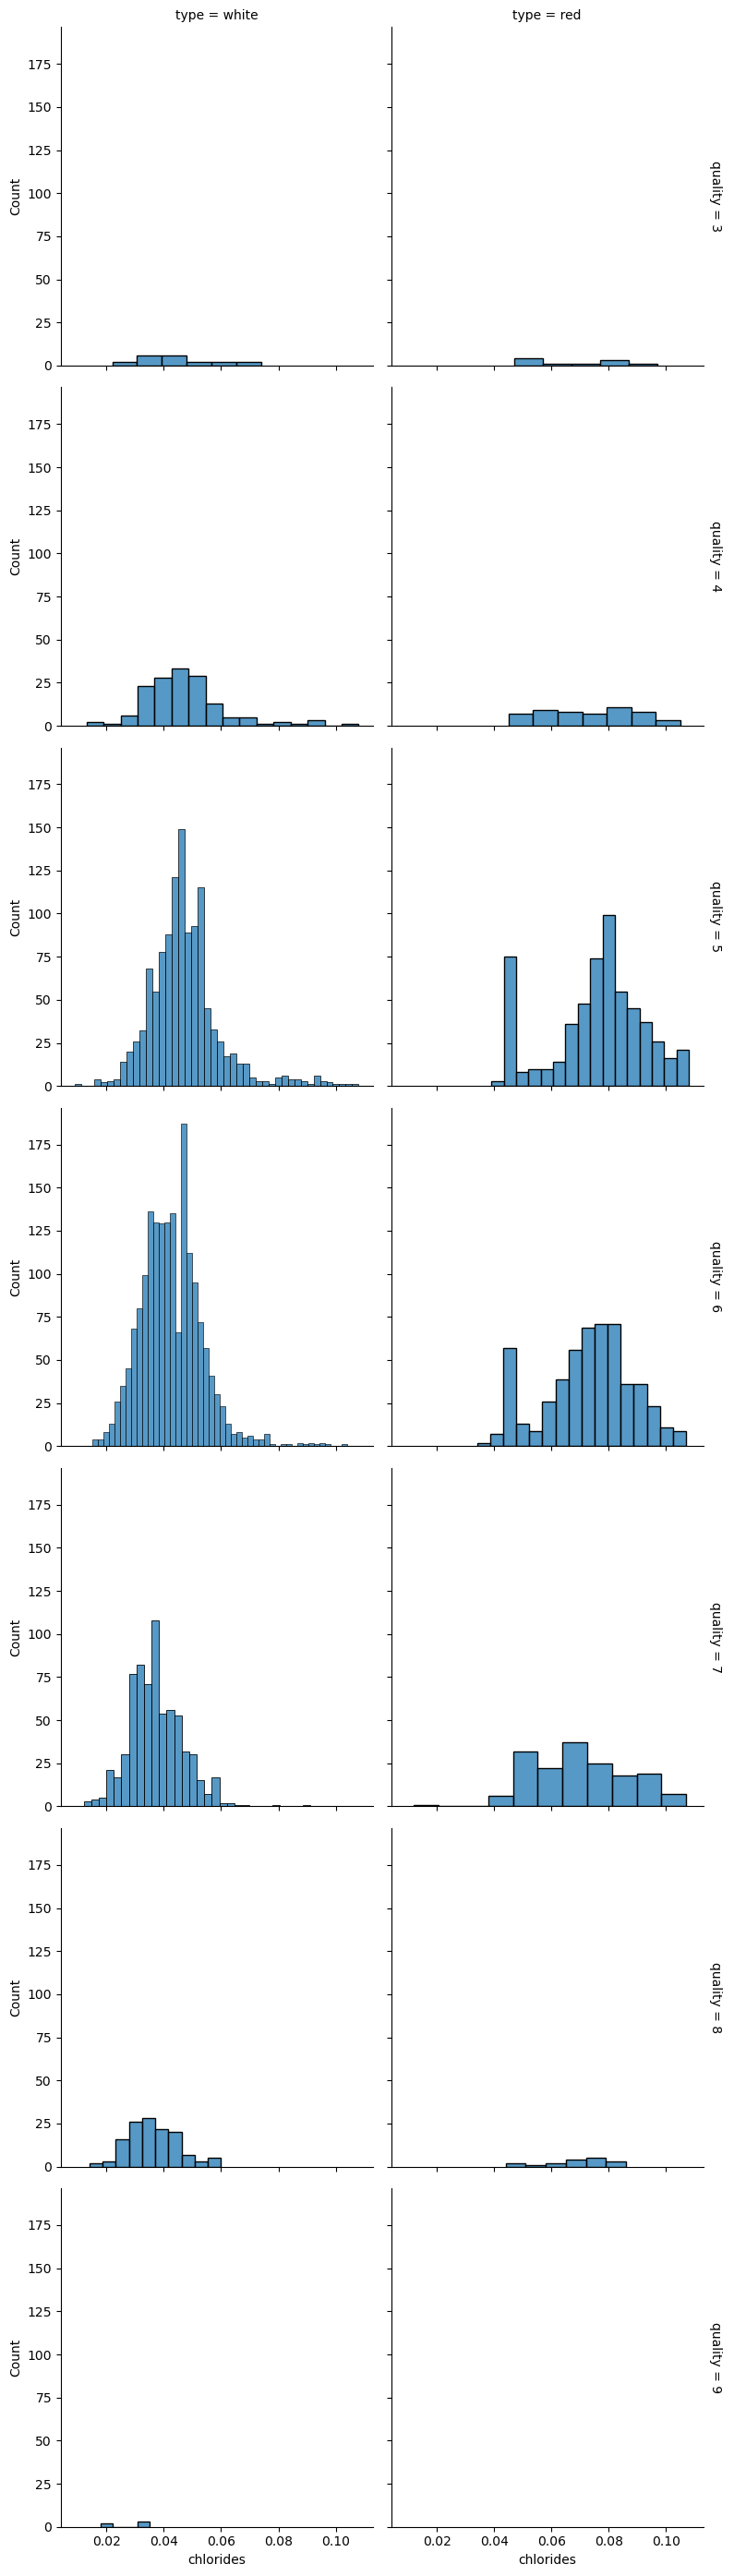

__________________________________________________ density __________________________________________________
type
red      0.996702
white    0.993777
Name: density, dtype: float64


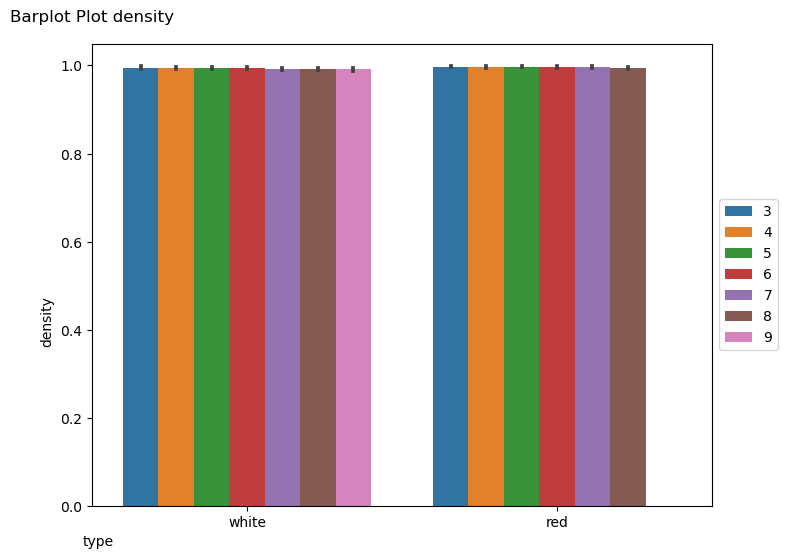

<Figure size 800x600 with 0 Axes>

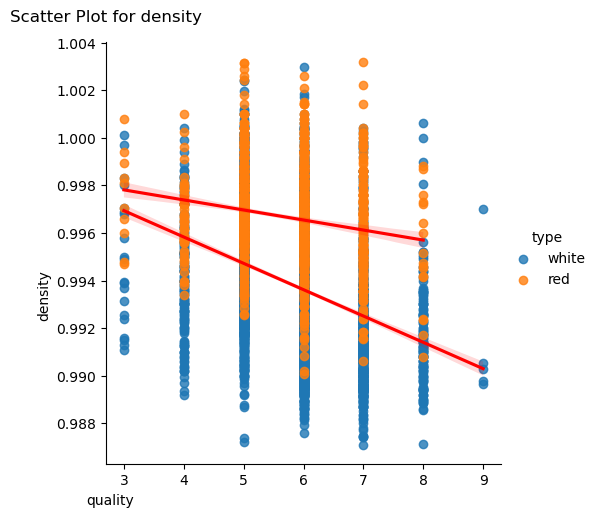

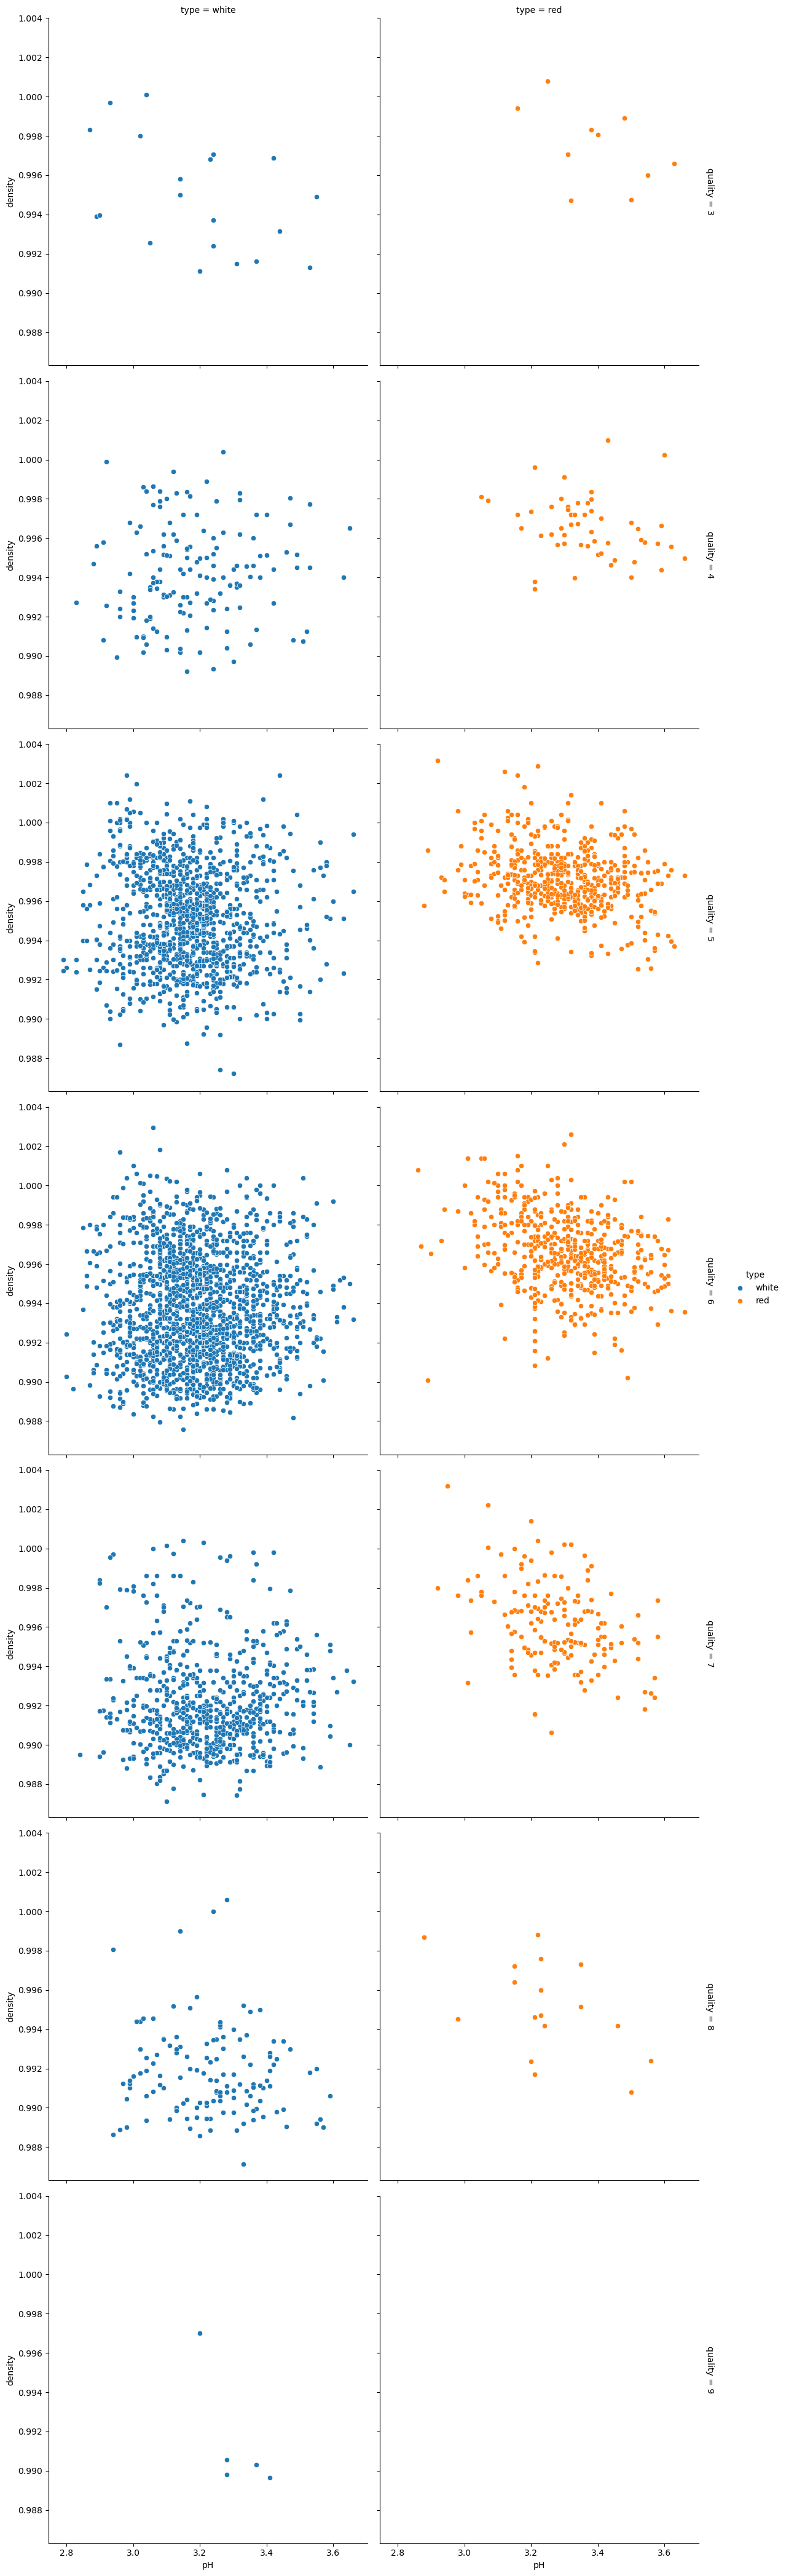

<Figure size 1000x1000 with 0 Axes>

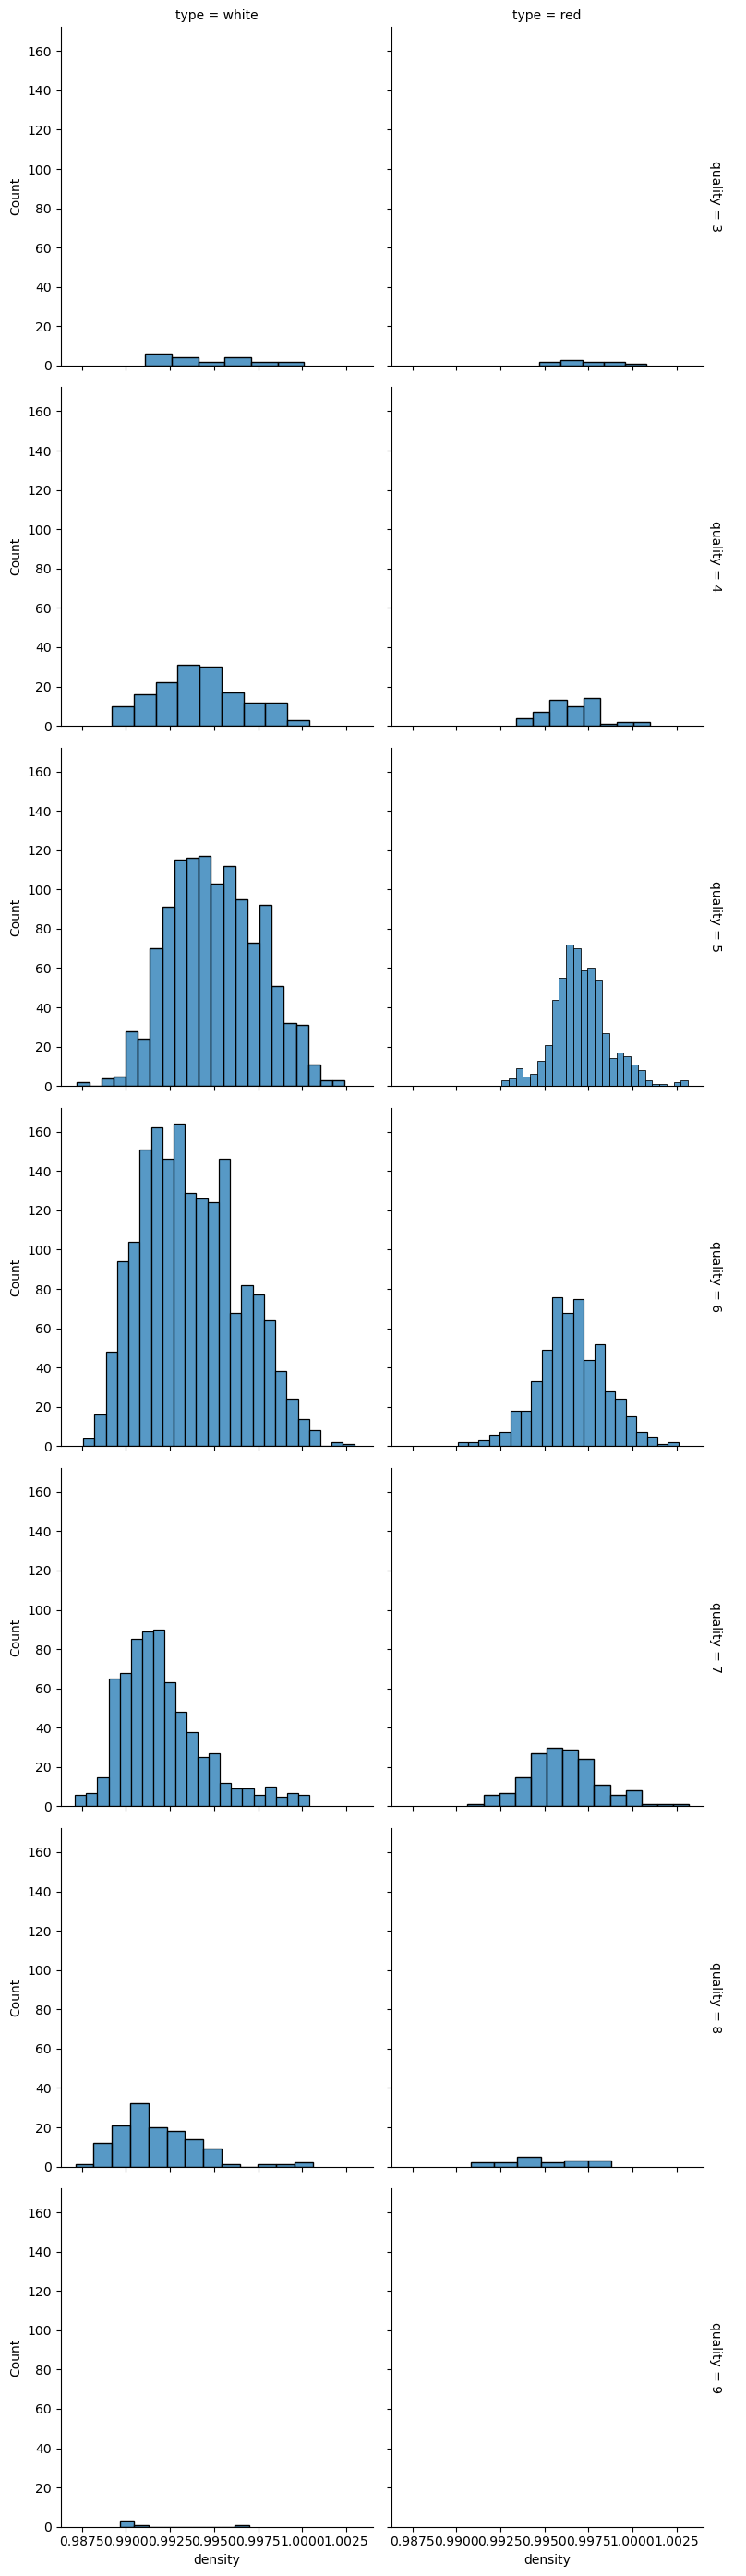

__________________________________________________ pH __________________________________________________
type
red      3.300228
white    3.192831
Name: pH, dtype: float64


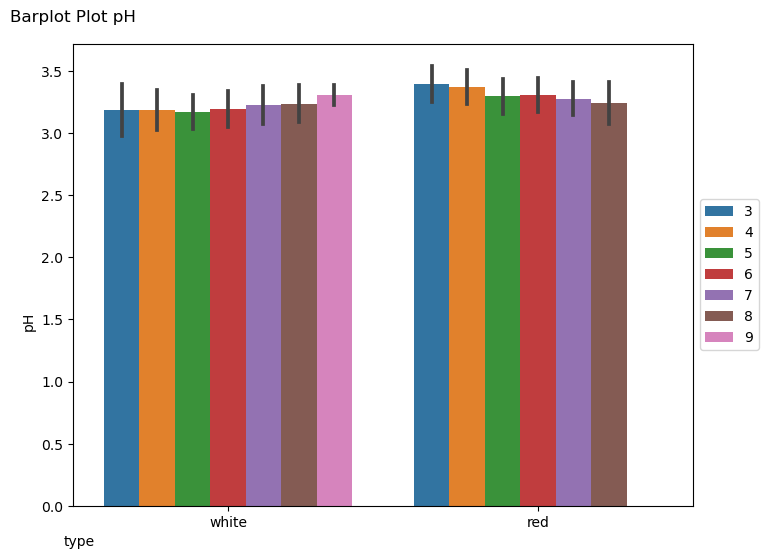

<Figure size 800x600 with 0 Axes>

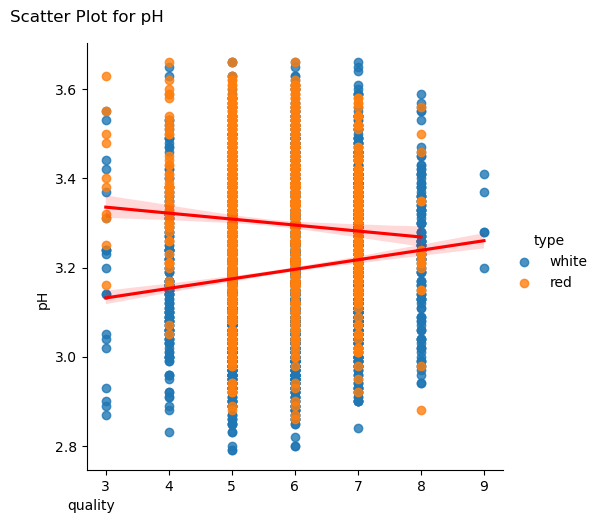

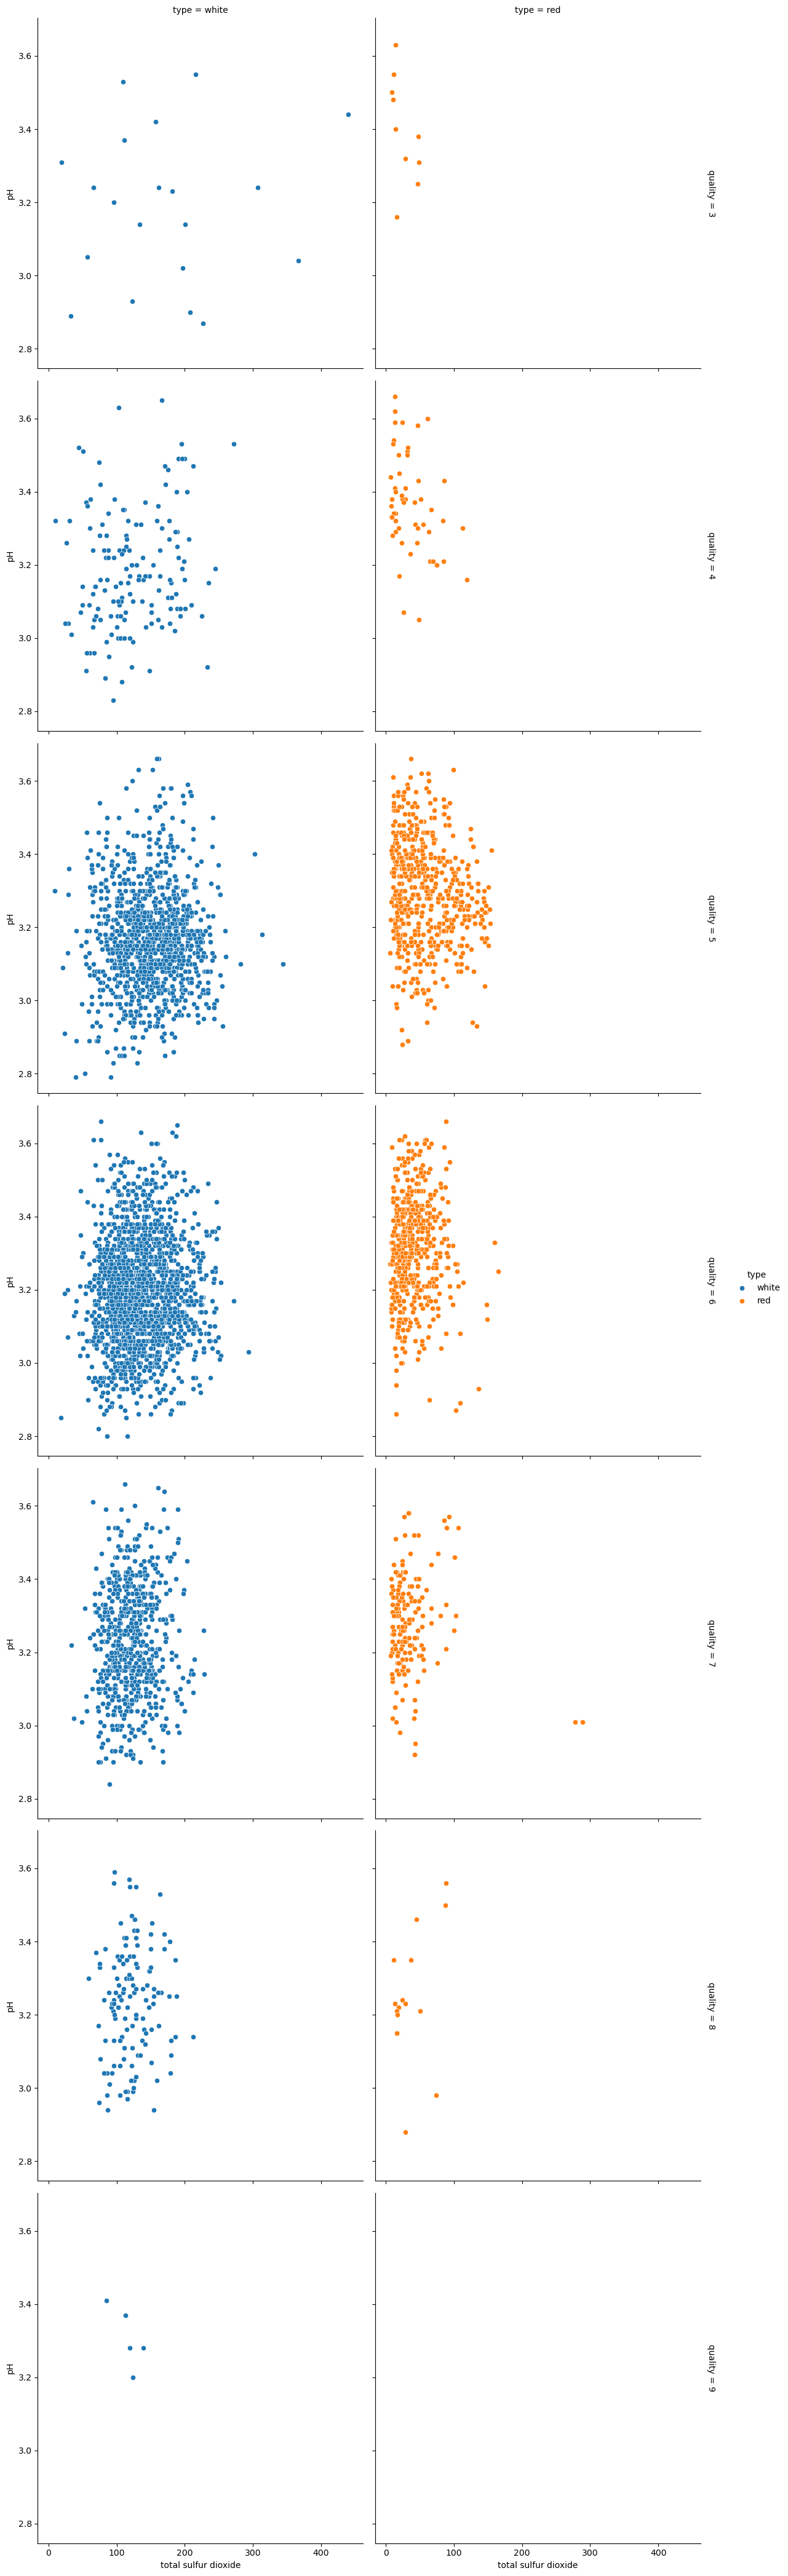

<Figure size 1000x1000 with 0 Axes>

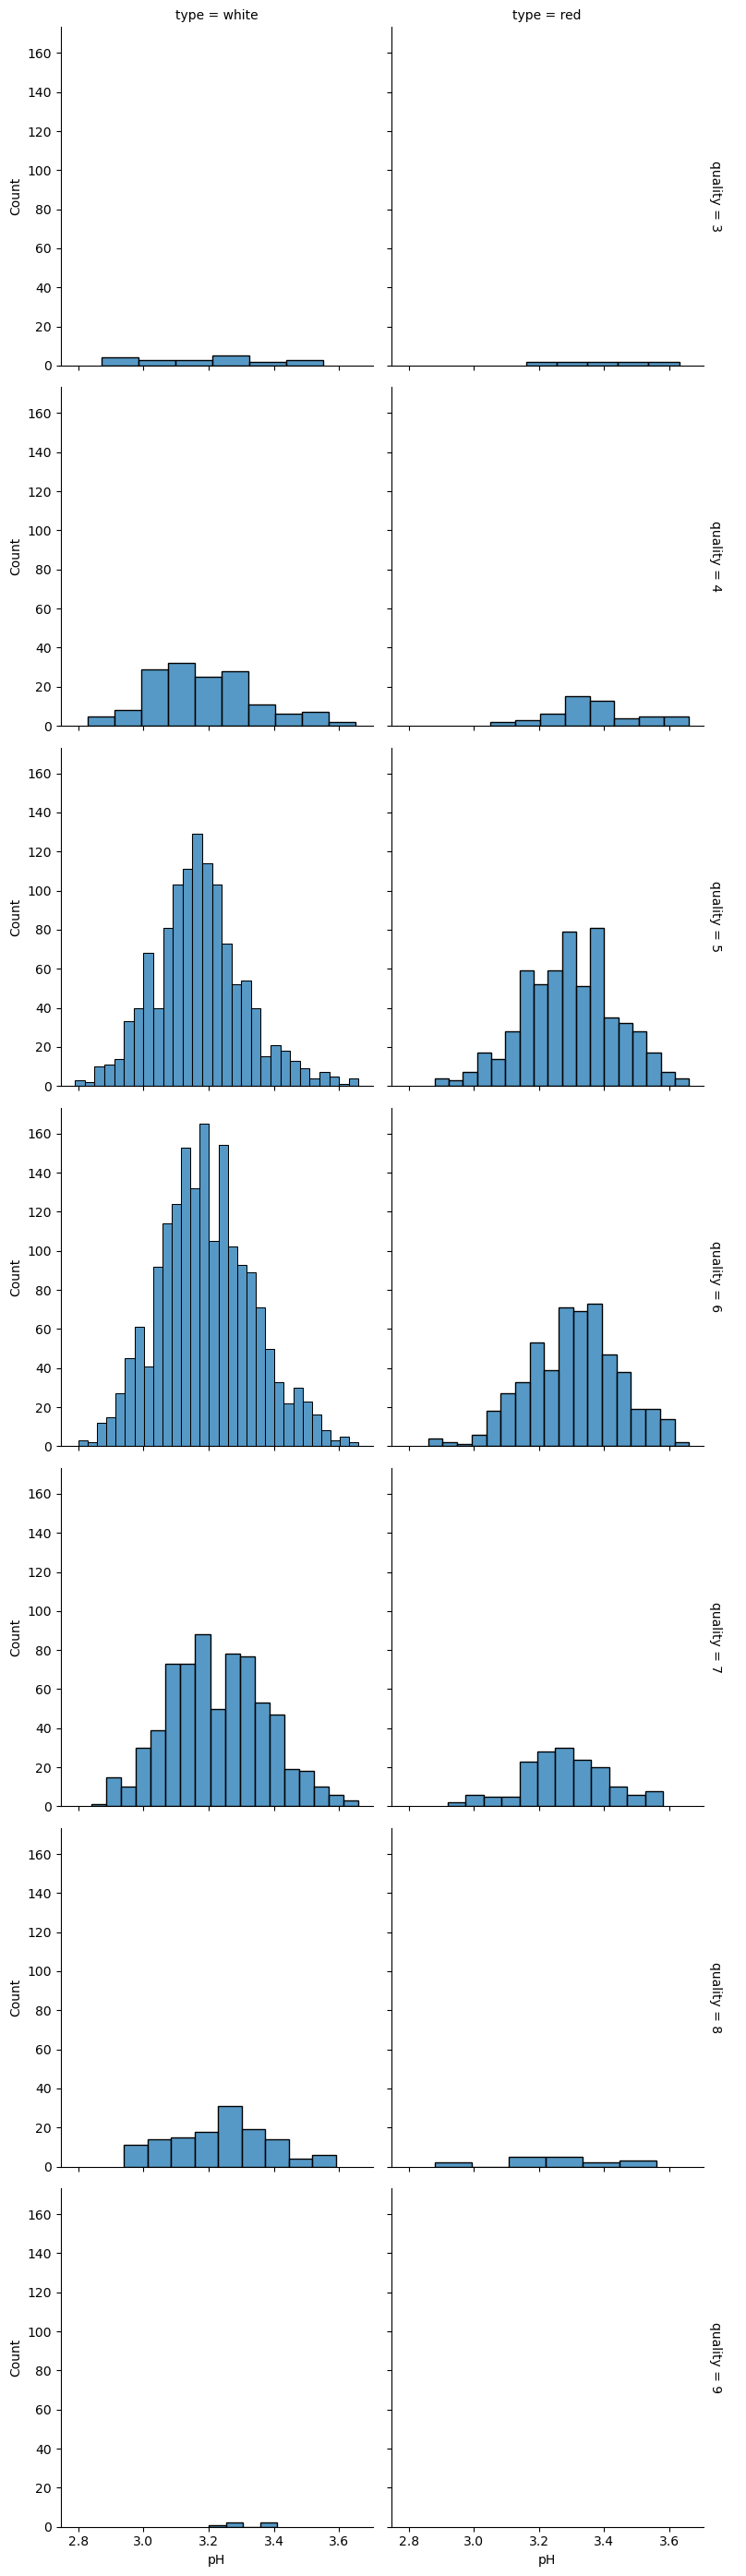

__________________________________________________ sulphates __________________________________________________
type
red      0.607873
white    0.486957
Name: sulphates, dtype: float64


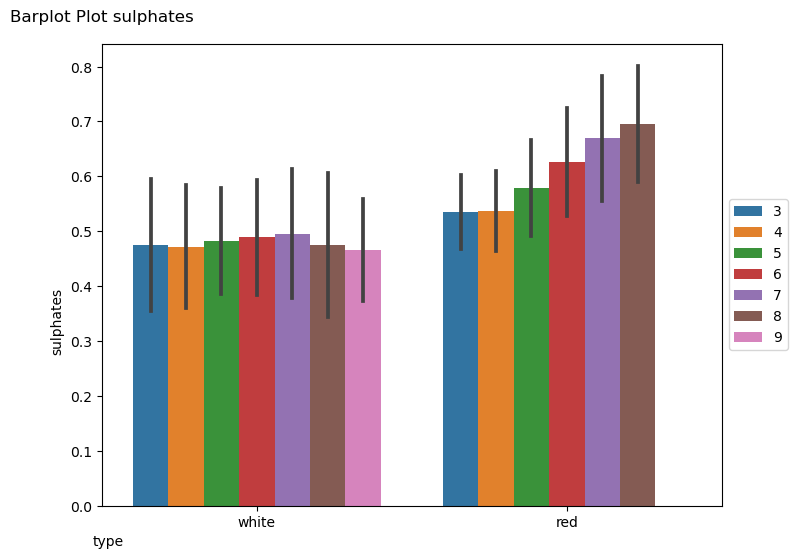

<Figure size 800x600 with 0 Axes>

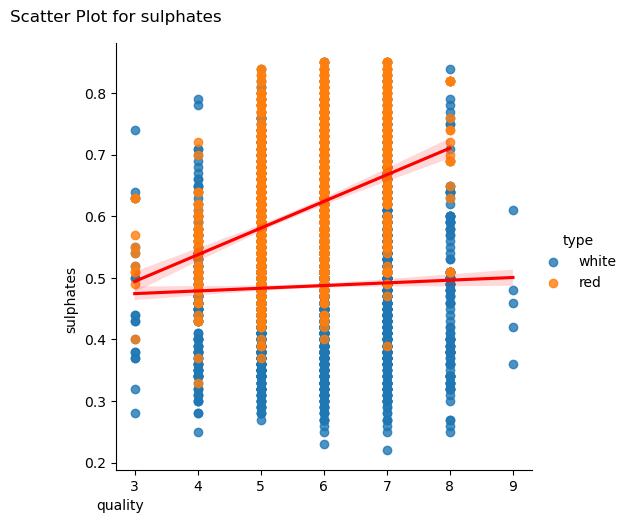

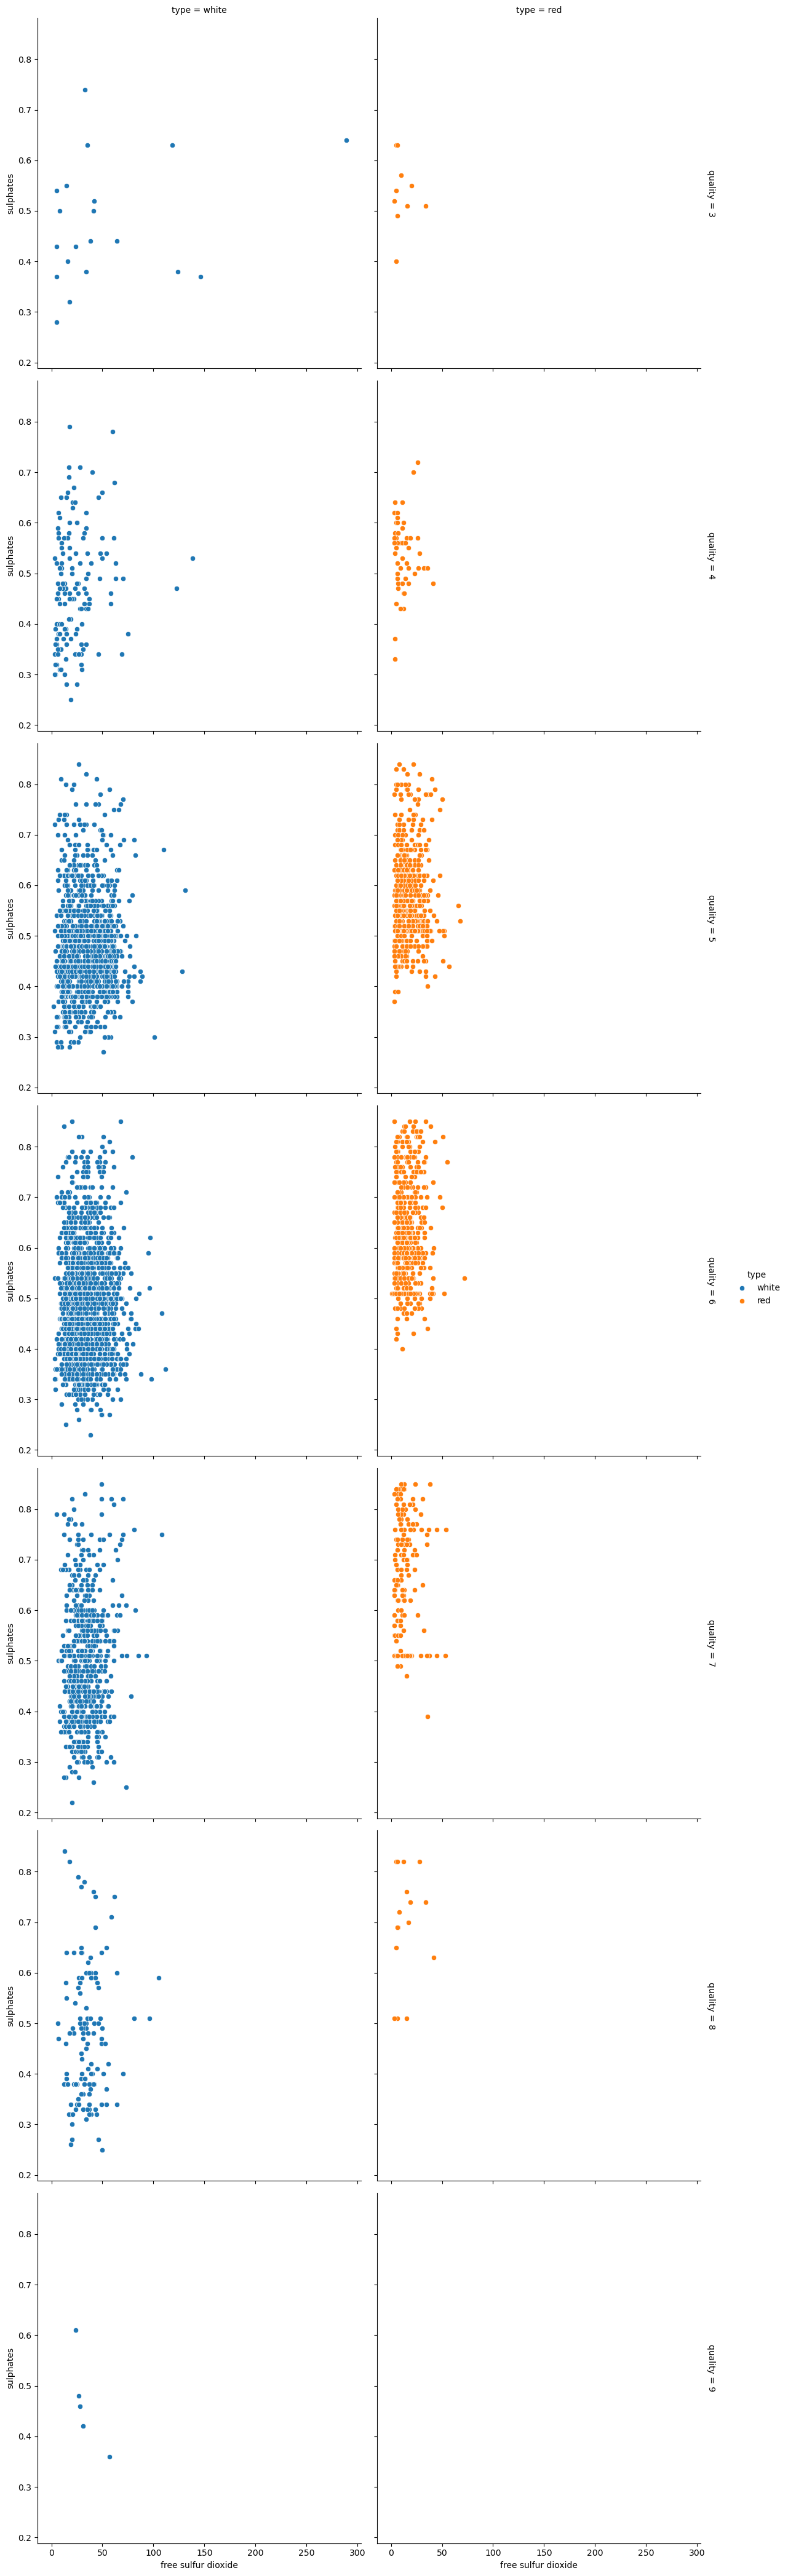

<Figure size 1000x1000 with 0 Axes>

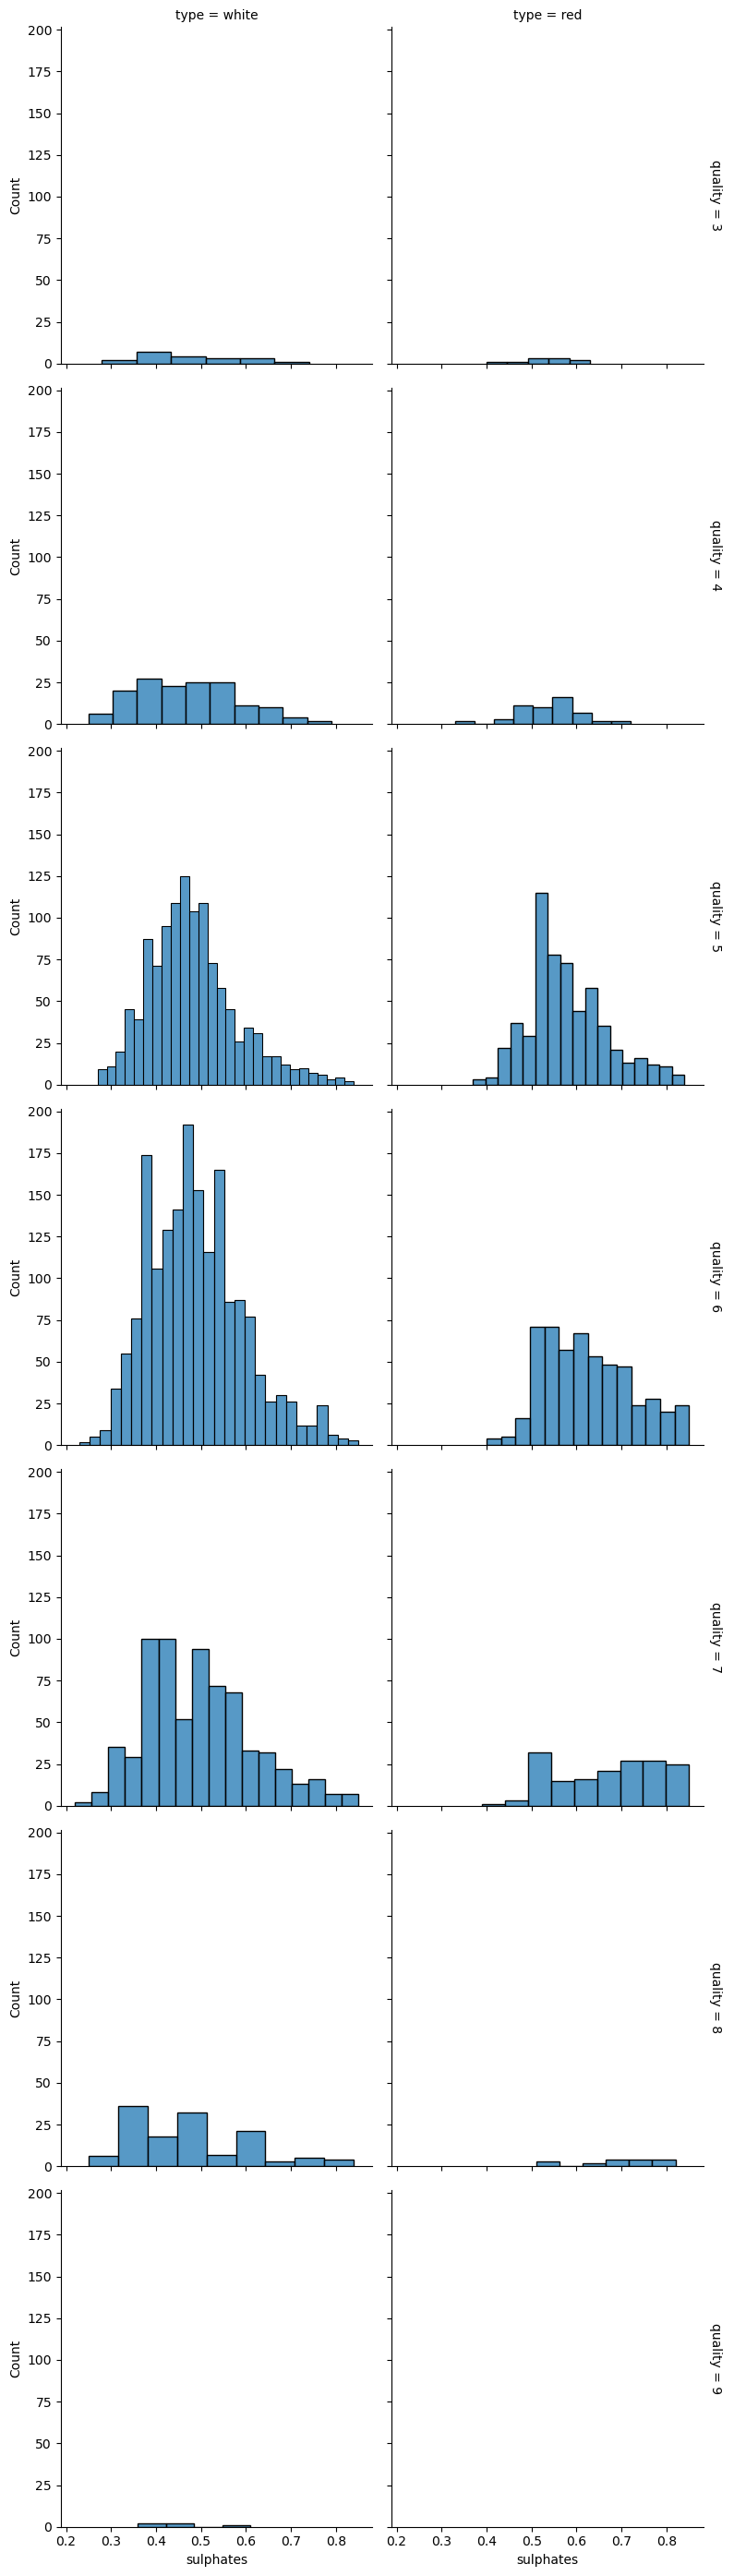

In [63]:
for col, col1 in zip(num_columns, num_columns_1):
    print("_" * 50, col, "_" * 50)
    
    print(df.groupby(["type"])[col].mean())
    
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x="type", y=col, hue="quality", errorbar='sd')
    plt.title("Barplot Plot " + col, x=0, y=1.03)
    plt.xlabel("type", x=0.01, y=1.02)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel(col, y=0.4) 
    plt.show()

    
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=df, x='quality', y=col, hue='type',  line_kws={"color": 'red'})
    plt.title("Scatter Plot for " + col, x=0, y=1.03)
    plt.xlabel('quality', x=0.01, y=1.02)
    plt.ylabel(col, y=0.4) 
    plt.show()
    
    
    g = sns.FacetGrid(data=df, col="type", row="quality", hue="type", margin_titles=True, height=6)
    g.map(sns.scatterplot, col1, col)
    plt.figure(figsize=(10, 10))
    g.add_legend()
    plt.show()
    g = sns.FacetGrid(data=df, col="type", row="quality", margin_titles=True, height=4)
    g.map_dataframe(sns.histplot, x=col)
    g.add_legend()

    plt.show()


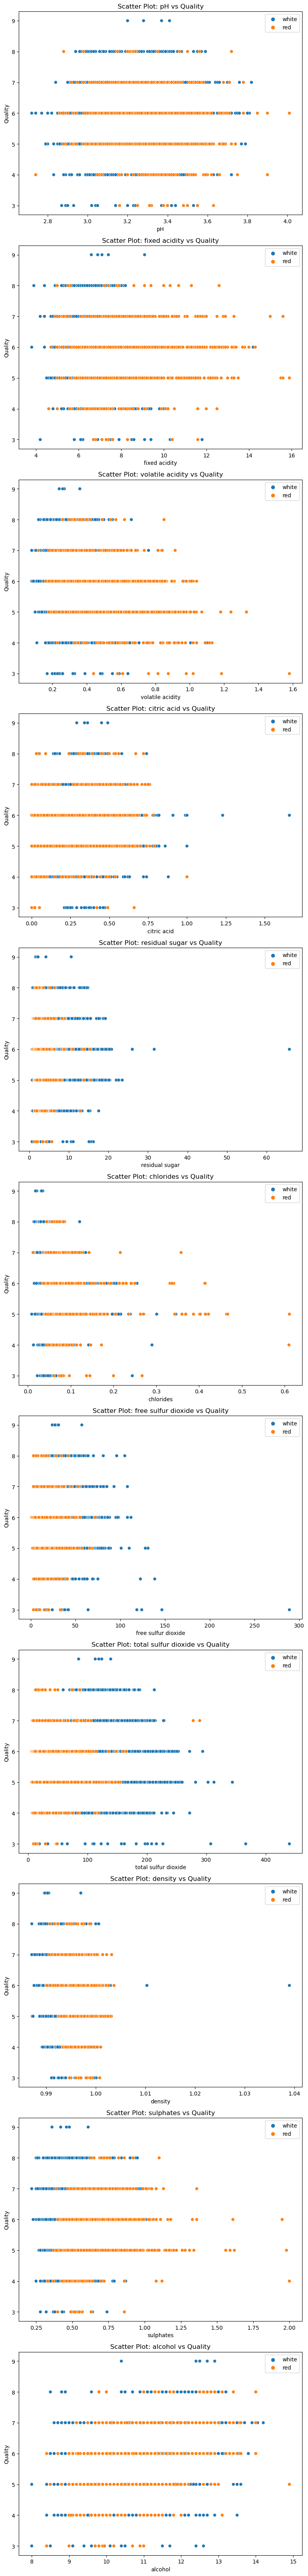

In [38]:
# the variables for the scatter plots
variables = ['pH', 'fixed acidity', 'volatile acidity', 'citric acid',
             'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

#  subplots for the scatter plots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 6 * len(variables)))

# Loop through the variables and plot scatter plots
for i, var in enumerate(variables):
    ax = axes[i]
    sns.scatterplot(data=df, x=var, y='quality', hue='type', ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Quality')
    ax.set_title(f'Scatter Plot: {var} vs Quality')
    ax.legend()

plt.tight_layout()
plt.show()


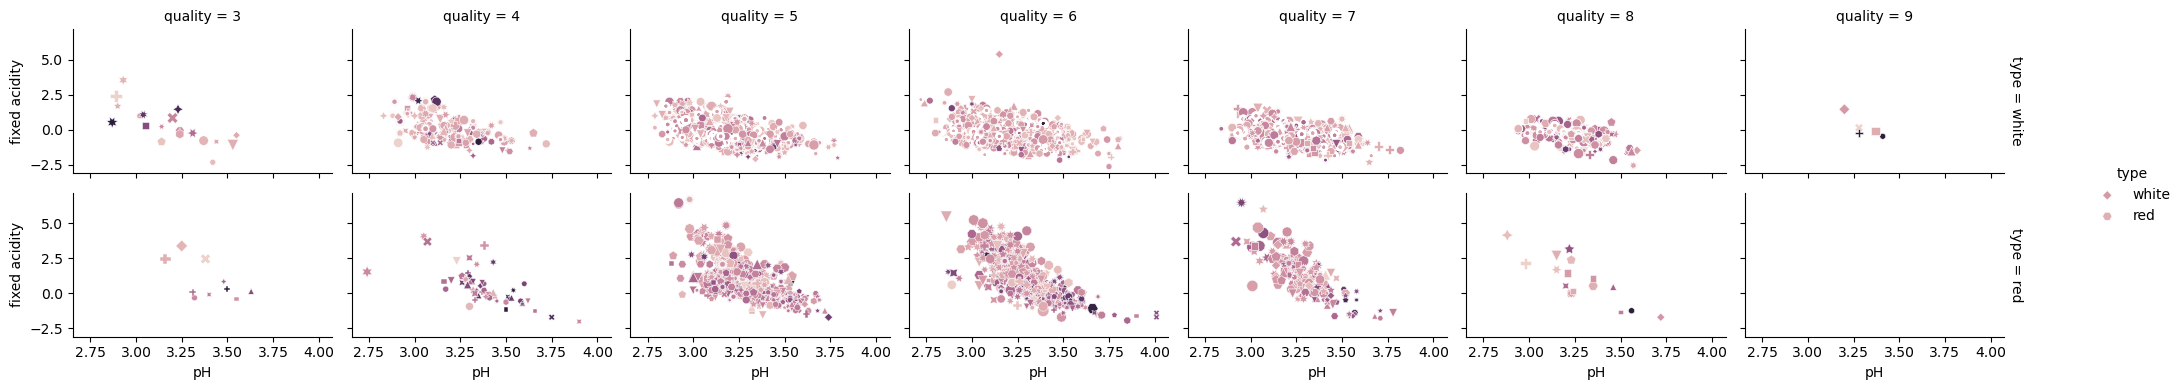

<Figure size 1000x1000 with 0 Axes>

In [114]:
    g = sns.FacetGrid(data=df, col="quality", row="type",hue="type",margin_titles=True, height=2, aspect = 1.5 )
    g.map(sns.scatterplot,'pH','fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density',  'sulphates', 'alcohol')
    plt.figure(figsize=(10,10))
    g.add_legend()
    plt.tight_layout()
    plt.show()

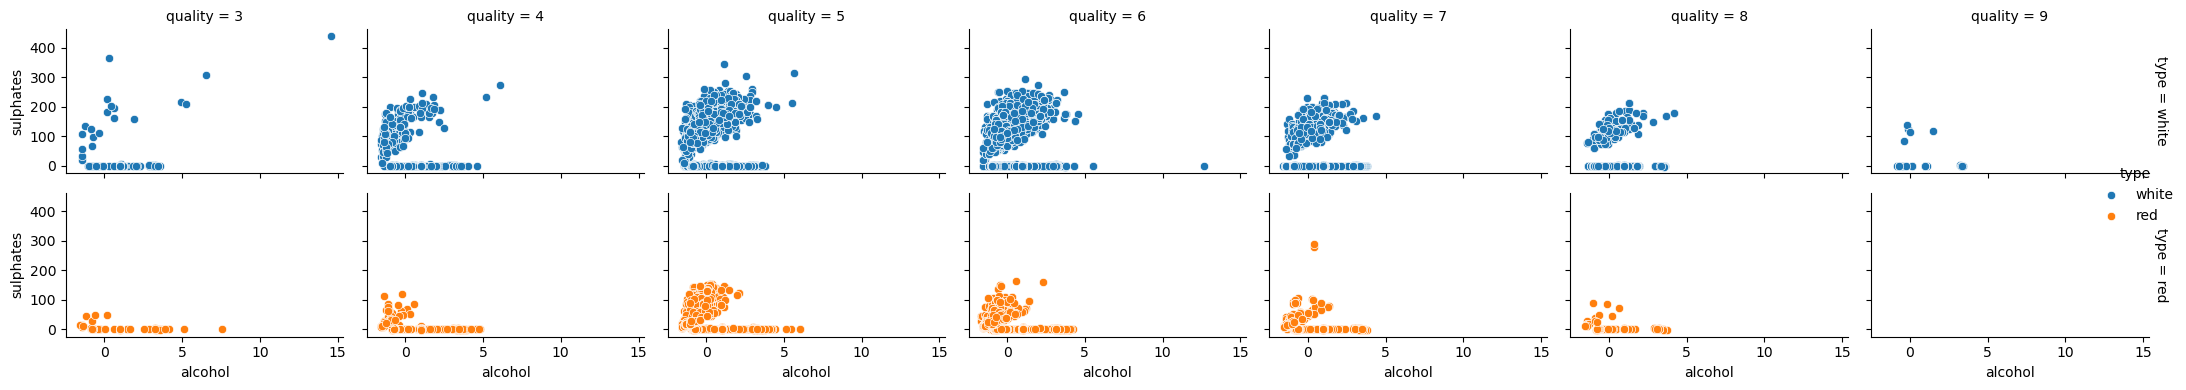

In [115]:
g = sns.FacetGrid(data=df, col="quality", row="type", hue="type", margin_titles=True, height=2, aspect=1.5)
g.map(sns.scatterplot, 'pH', 'fixed acidity')
g.map(sns.scatterplot, 'volatile acidity', 'citric acid')
g.map(sns.scatterplot, 'residual sugar', 'chlorides')
g.map(sns.scatterplot, 'free sulfur dioxide', 'total sulfur dioxide')
g.map(sns.scatterplot, 'density', 'sulphates')
g.map(sns.scatterplot, 'alcohol')

g.add_legend()
plt.tight_layout()
plt.show()


In [40]:
data = df[['quality','pH','fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density',  'sulphates', 'alcohol']].corr() #.corr() to get correlation
data

quality        pH  fixed acidity  volatile acidity   
quality               1.000000  0.019366      -0.077031         -0.265953  \
pH                    0.019366  1.000000      -0.251814          0.260660   
fixed acidity        -0.077031 -0.251814       1.000000          0.220172   
volatile acidity     -0.265953  0.260660       0.220172          1.000000   
citric acid           0.085706 -0.328689       0.323736         -0.378061   
residual sugar       -0.036825 -0.267050      -0.112319         -0.196702   
chlorides            -0.200886  0.044806       0.298421          0.377167   
free sulfur dioxide   0.055463 -0.145191      -0.283317         -0.353230   
total sulfur dioxide -0.041385 -0.237687      -0.329747         -0.414928   
density              -0.305858  0.011920       0.459204          0.271193   
sulphates             0.038729  0.191248       0.300380          0.225476   
alcohol               0.444319  0.121002      -0.095603         -0.038248   

                      citric acid  residual sugar  chlorides   
quality                  0.085706       -0.036825  -0.200886  \
pH                      -0.328689       -0.267050   0.044806   
fixed acidity            0.323736       -0.112319   0.298421   
volatile acidity        -0.378061       -0.196702   0.377167   
citric acid              1.000000        0.142486   0.039315   
residual sugar           0.142486        1.000000  -0.128902   
chlorides                0.039315       -0.128902   1.000000   
free sulfur dioxide      0.133437        0.403439  -0.195042   
total sulfur dioxide     0.195218        0.495820  -0.279580   
density                  0.096320        0.552498   0.362594   
sulphates                0.057613       -0.185745   0.395332   
alcohol                 -0.010433       -0.359706  -0.256861   

                      free sulfur dioxide  total sulfur dioxide   density   
quality                          0.055463             -0.041385 -0.305858  \
pH                              -0.145191             -0.237687  0.011920   
fixed acidity                   -0.283317             -0.329747  0.459204   
volatile acidity                -0.353230             -0.414928  0.271193   
citric acid                      0.133437              0.195218  0.096320   
residual sugar                   0.403439              0.495820  0.552498   
chlorides                       -0.195042             -0.279580  0.362594   
free sulfur dioxide              1.000000              0.720934  0.025717   
total sulfur dioxide             0.720934              1.000000  0.032395   
density                          0.025717              0.032395  1.000000   
sulphates                       -0.188489             -0.275381  0.259454   
alcohol                         -0.179838             -0.265740 -0.686745   

                      sulphates   alcohol  
quality                0.038729  0.444319  
pH                     0.191248  0.121002  
fixed acidity          0.300380 -0.095603  
volatile acidity       0.225476 -0.038248  
citric acid            0.057613 -0.010433  
residual sugar        -0.185745 -0.359706  
chlorides              0.395332 -0.256861  
free sulfur dioxide   -0.188489 -0.179838  
total sulfur dioxide  -0.275381 -0.265740  
density                0.259454 -0.686745  
sulphates              1.000000 -0.003261  
alcohol               -0.003261  1.000000

<Axes: >

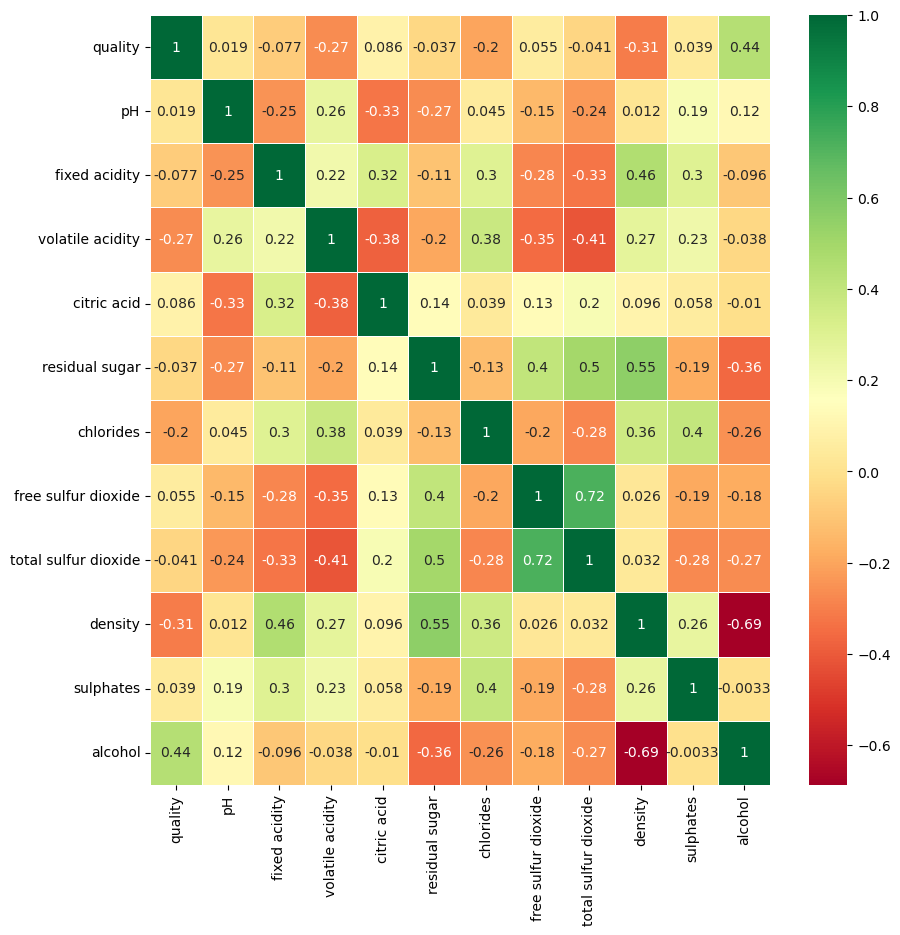

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(data,cmap= "RdYlGn", annot=True,linewidth=.5)

Report:

This report presents data on various chemical properties of red and white wines. The properties analyzed include volatile acidity, citric acid, chlorides, density, pH, and sulphates. The data is presented in the form of tables and accompanying figures.

In terms of volatile acidity, the red wine has a higher average value of 0.435, compared to white wine, which has an average value of 0.277. This indicates that red wine generally contains a higher concentration of volatile acids, which can contribute to a more pungent aroma and potentially affect the taste.

Regarding citric acid content, the average value for red wine is 0.259, while white wine has a slightly higher average value of 0.324. Citric acid can add freshness and enhance the fruity flavors in wine, and the higher average value in white wine suggests it may possess a slightly more citrusy taste compared to red wine.

Next, the data reveals that chlorides are present in higher amounts in red wine, with an average value of 0.074, compared to white wine, which has an average value of 0.043. Higher chloride levels can impact the perceived saltiness or salinity of the wine.

The density of red wine is slightly higher, with an average value of 0.997, while white wine has an average value of 0.994. Density is an important parameter in wine production and can provide insights into the level of alcohol and residual sugar in the wine.

The pH level of red wine is measured at an average value of 3.300, while white wine has a slightly lower average value of 3.193. pH affects the overall acidity or tartness of the wine, and these values suggest that red wine tends to have a slightly higher acidity compared to white wine.

Lastly, the average sulphate content in red wine is 0.608, whereas white wine has an average value of 0.487. Sulphates are additives used in winemaking and can contribute to wine stability and preservation.

Overall, the data provides insights into the chemical composition of red and white wines, highlighting the differences in various properties between the two types. These variations contribute to the distinct characteristics and flavors observed in red and white wines.

In [37]:
## Add your own Questions

# Data Cleaning

## 1. Handling Duplicate data

In [38]:
## Check shape of original data

In [42]:
df.shape

(6497, 13)

In [40]:
## Drop duplicate values and reset your index columns.

In [43]:
df = df.drop_duplicates(keep='last').reset_index(drop=True)


In [44]:
## Check shape after applying drop duplicates.

In [45]:
df.shape

(5329, 13)

In [44]:
## Conslusion or what you have done for achieving this.

## 2.  Handling Missing Values

In [45]:
## Apply isnull() function and find the sum of missing values in all columns.

In [46]:
df.isnull()

type  fixed acidity  volatile acidity  citric acid  residual sugar   
0     False          False             False        False           False  \
1     False          False             False        False           False   
2     False          False             False        False           False   
3     False          False             False        False           False   
4     False          False             False        False           False   
...     ...            ...               ...          ...             ...   
5324  False          False             False        False           False   
5325  False          False             False        False           False   
5326  False          False             False        False           False   
5327  False          False             False        False           False   
5328  False          False             False        False           False   

      chlorides  free sulfur dioxide  total sulfur dioxide  density     pH   
0         False                False                 False    False  False  \
1         False                False                 False    False  False   
2         False                False                 False    False  False   
3         False                False                 False    False  False   
4         False                False                 False    False  False   
...         ...                  ...                   ...      ...    ...   
5324      False                False                 False    False  False   
5325      False                False                 False    False  False   
5326      False                False                 False    False  False   
5327      False                False                 False    False  False   
5328      False                False                 False    False  False   

      sulphates  alcohol  quality  
0         False    False    False  
1         False    False    False  
2         False    False    False  
3         False    False    False  
4         False    False    False  
...         ...      ...      ...  
5324      False    False    False  
5325       True    False    False  
5326      False    False    False  
5327      False    False    False  
5328      False    False    False  

[5329 rows x 13 columns]

In [47]:
df.isnull().sum()
## these are total null values are in this data frame

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [31]:
## Find missing value in % form.

In [48]:
df.isnull().sum()/len(df) * 100
## This code to find the percentage of the value of data frame, 
## if percentage of null values are more then 30 % we will drop the colunme otherwise we will fill these column with median 

type                    0.000000
fixed acidity           0.187652
volatile acidity        0.150122
citric acid             0.056296
residual sugar          0.037530
chlorides               0.037530
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.168887
sulphates               0.075061
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [49]:
median_values = df.groupby(['type', 'quality'])['fixed acidity'].median()

# Print the median values
print(median_values)

type   quality
red    3          7.5
       4          7.5
       5          7.8
       6          7.9
       7          8.8
       8          7.9
white  3          7.3
       4          6.9
       5          6.8
       6          6.8
       7          6.7
       8          6.7
       9          7.1
Name: fixed acidity, dtype: float64


In [50]:
# Iterate over each numerical column
for col in num_columns:
    # Calculate median values based on the two categorical columns
    median_values = df.groupby(['type', 'quality'])[col].median()
    
    # Fill missing values with the corresponding median values by using a lambda function
    df[col].fillna(df.groupby(['type', 'quality'])[col].transform(lambda x: x.fillna(x.median())), inplace=True)

# Verify if missing values are filled for each numerical column
# f: Specifies that the number should be formatted as a fixed-point number.
for col in num_columns:
    print(f"Missing values in {col}: {df[col].isnull().sum()}")


Missing values in fixed acidity: 0
Missing values in volatile acidity: 0
Missing values in citric acid: 0
Missing values in residual sugar: 0
Missing values in chlorides: 0
Missing values in free sulfur dioxide: 0
Missing values in total sulfur dioxide: 0
Missing values in density: 0
Missing values in pH: 0
Missing values in sulphates: 0
Missing values in alcohol: 0


In [51]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar   
0  white            7.2              0.23         0.32             8.5  \
1  white            8.1              0.28         0.40             6.9   
2  white            6.2              0.32         0.16             7.0   
3  white            7.0              0.27         0.36            20.7   
4  white            6.3              0.30         0.34             1.6   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH   
0      0.058                 47.0                 186.0   0.9956  3.19  \
1      0.050                 30.0                  97.0   0.9951  3.26   
2      0.045                 30.0                 136.0   0.9949  3.18   
3      0.045                 45.0                 170.0   1.0010  3.00   
4      0.049                 14.0                 132.0   0.9940  3.30   

   sulphates  alcohol  quality  
0       0.40      9.9        6  
1       0.44     10.1        6  
2       0.47      9.6        6  
3       0.45      8.8        6  
4       0.49      9.5        6

In [53]:
## Conclude your finding on missing values.

All the Columns in the Dataframe has no missing values not more then 1 % that means very less missing values  

In [54]:
## Drop the columns based on above analysis.

No columns need to be Drop as in the dataframe there is no  column has no missing values no more then 30% 

In [55]:
## Conslusion or what you have done for achieving this.

we find the median values by using categorical columns in respective of all the numerical columns then we replaced the median values where null values are there now data has no missing values 

## 3. Handling Outliers 

In [56]:
## Apply below techniques on numerical columns.

# Do box plot and violin plot to identify outliers.

# Q1 --> 25%ile of data 
#     first line of the box plot
# Q2 --> median or 50%ile of data
#     second line or middle line of the box.
# Q3 --> 75%ile of data   
#     third line or the last of the box.

# IQR --> Interquartile range.
#      distance/value between Q1 or 25%ile and Q3 or 75%ile
#     IQR = Q3-Q1
    
# minimum whisker --> Q1 - 1.5*IQR
# maximum whisker --> Q3 + 1.5*IQR

# Any value below mimimum whisker and above maximum whisker are termed as outlier.

In [52]:
categorical_columns=['type','quality' ]

num_columns=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       ]

__________________________________________________ fixed acidity __________________________________________________
Q1 for fixed acidity: 6.4
Q2 for fixed acidity: 7.0
Q3 for fixed acidity: 7.7
Interquartile range  for fixed acidity: 1.2999999999999998
Median value for fixed acidity: 0.51
Minimum Whisker  for fixed acidity: 4.450000000000001
Maximum Whisker  for fixed acidity: 9.65
Outlier count for fixed acidity: 3294.2
Outlier percentage for fixed acidity: 61.82%


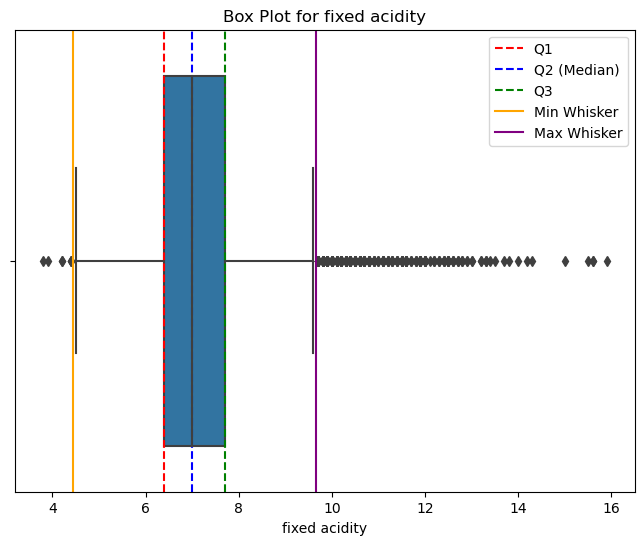

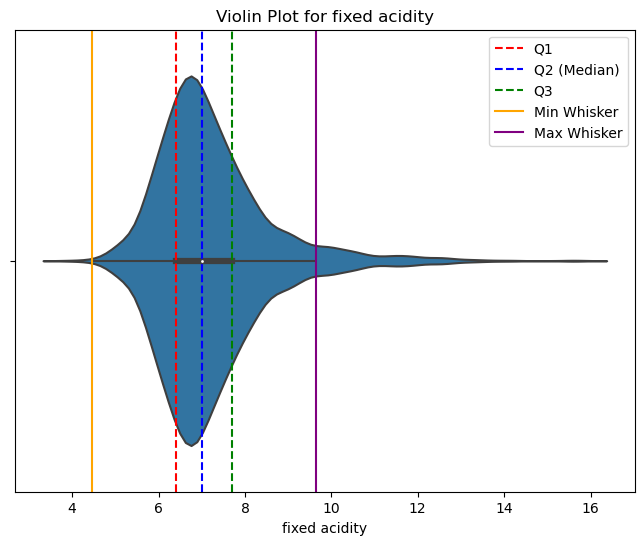

__________________________________________________ volatile acidity __________________________________________________
Q1 for volatile acidity: 0.23
Q2 for volatile acidity: 0.3
Q3 for volatile acidity: 0.41
Interquartile range  for volatile acidity: 0.17999999999999997
Median value for volatile acidity: 0.51
Minimum Whisker  for volatile acidity: -0.03999999999999995
Maximum Whisker  for volatile acidity: 0.6799999999999999
Outlier count for volatile acidity: 224.52
Outlier percentage for volatile acidity: 4.21%


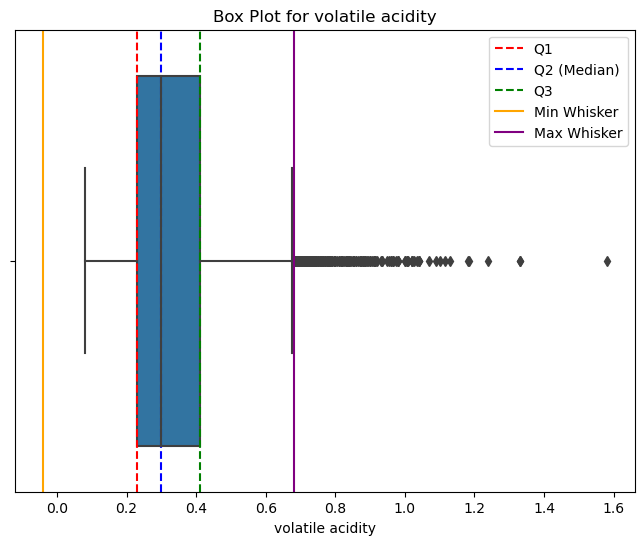

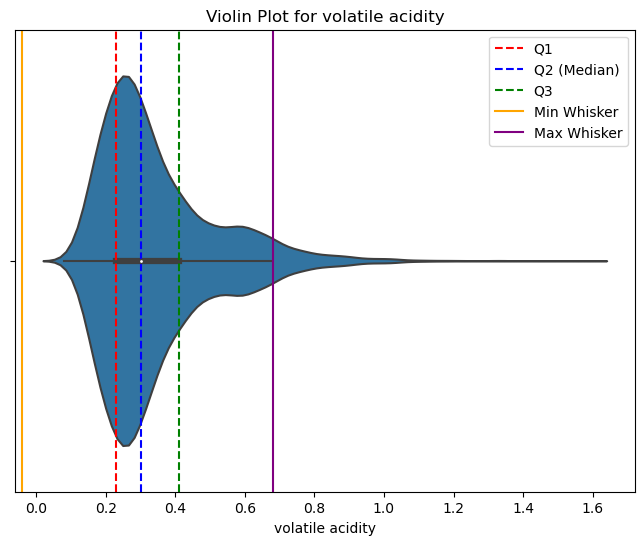

__________________________________________________ citric acid __________________________________________________
Q1 for citric acid: 0.24
Q2 for citric acid: 0.31
Q3 for citric acid: 0.4
Interquartile range  for citric acid: 0.16000000000000003
Median value for citric acid: 0.51
Minimum Whisker  for citric acid: -5.551115123125783e-17
Maximum Whisker  for citric acid: 0.6400000000000001
Outlier count for citric acid: 105.66
Outlier percentage for citric acid: 1.98%


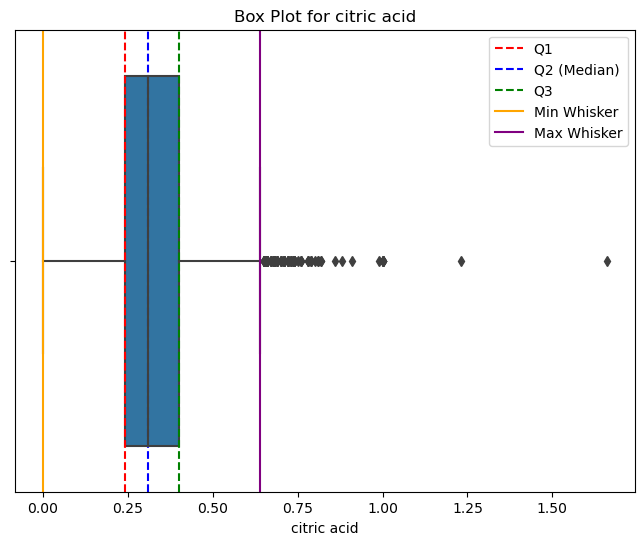

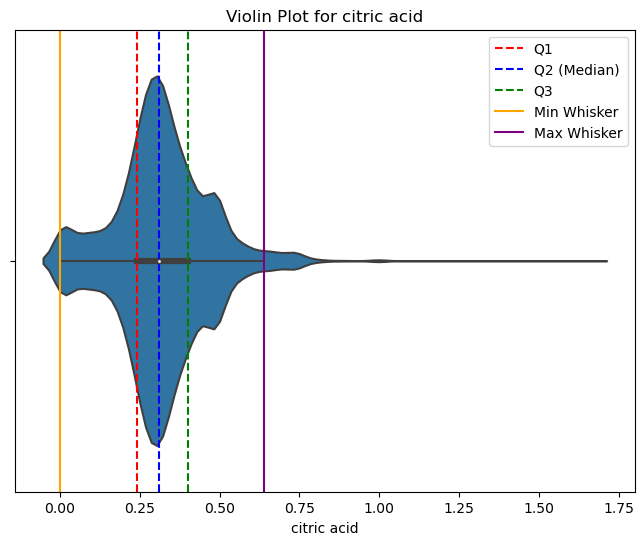

__________________________________________________ residual sugar __________________________________________________
Q1 for residual sugar: 1.8
Q2 for residual sugar: 2.7
Q3 for residual sugar: 7.5
Interquartile range  for residual sugar: 5.7
Median value for residual sugar: 0.51
Minimum Whisker  for residual sugar: -6.750000000000001
Maximum Whisker  for residual sugar: 16.05
Outlier count for residual sugar: 2625.65
Outlier percentage for residual sugar: 49.27%


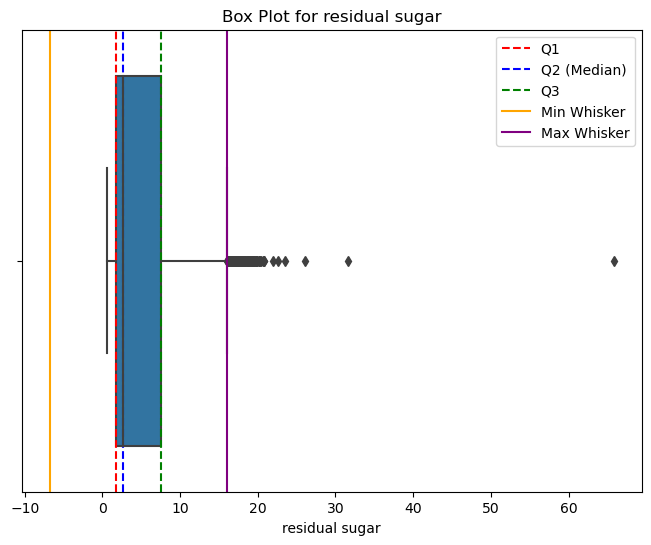

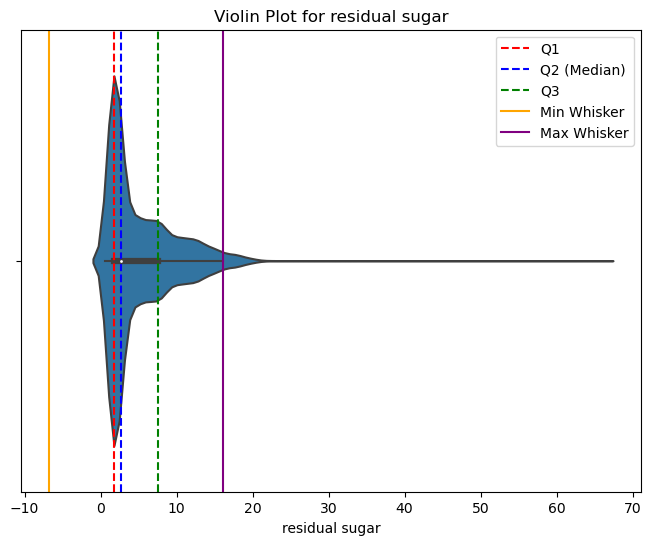

__________________________________________________ chlorides __________________________________________________
Q1 for chlorides: 0.038
Q2 for chlorides: 0.047
Q3 for chlorides: 0.066
Interquartile range  for chlorides: 0.028000000000000004
Median value for chlorides: 0.51
Minimum Whisker  for chlorides: -0.0040000000000000105
Maximum Whisker  for chlorides: 0.10800000000000001
Outlier count for chlorides: 41.957
Outlier percentage for chlorides: 0.79%


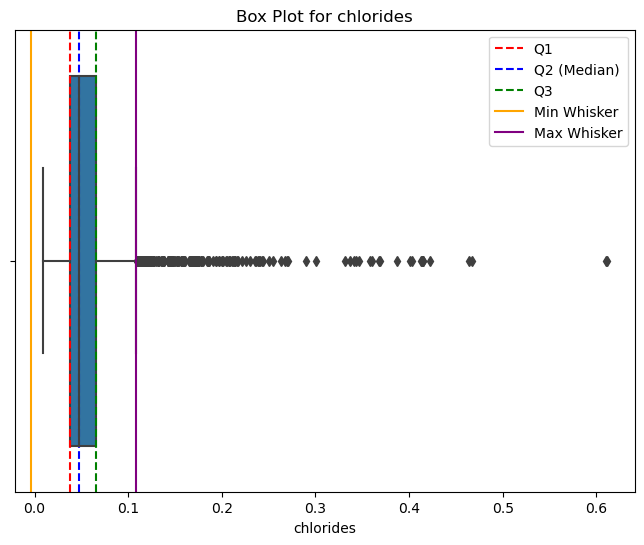

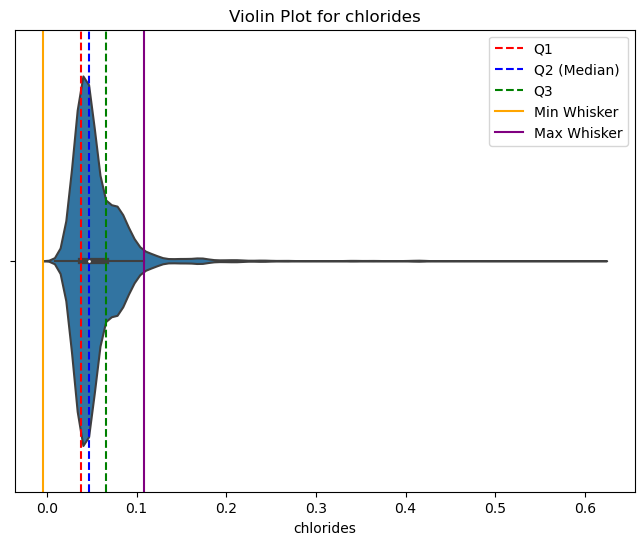

__________________________________________________ free sulfur dioxide __________________________________________________
Q1 for free sulfur dioxide: 16.0
Q2 for free sulfur dioxide: 28.0
Q3 for free sulfur dioxide: 41.0
Interquartile range  for free sulfur dioxide: 25.0
Median value for free sulfur dioxide: 0.51
Minimum Whisker  for free sulfur dioxide: -21.5
Maximum Whisker  for free sulfur dioxide: 78.5
Outlier count for free sulfur dioxide: 4402.5
Outlier percentage for free sulfur dioxide: 82.61%


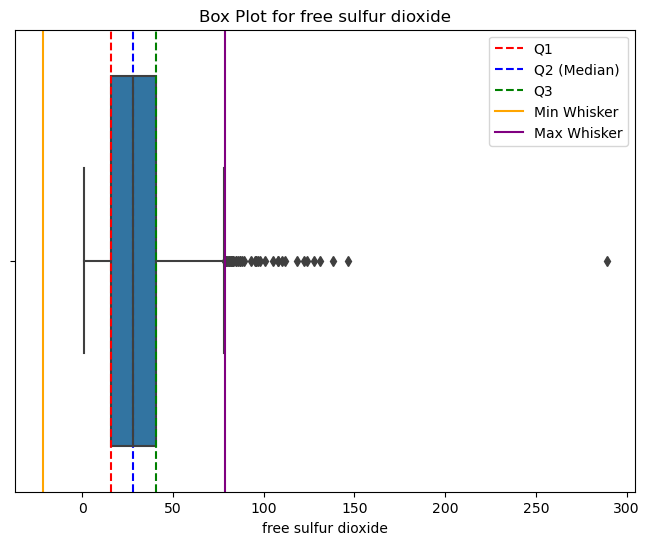

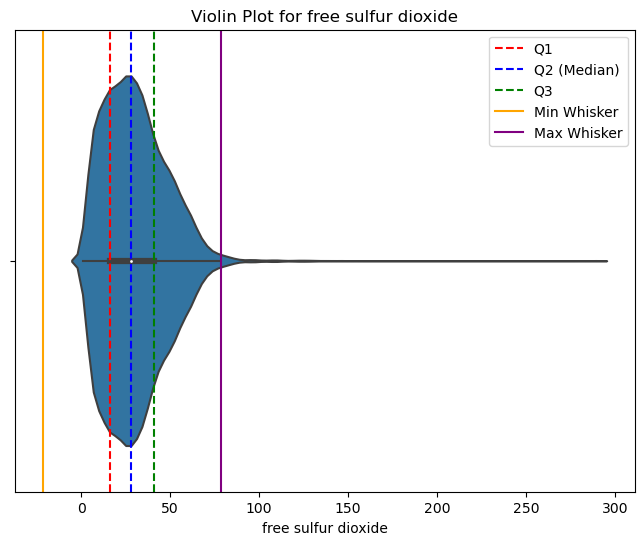

__________________________________________________ total sulfur dioxide __________________________________________________
Q1 for total sulfur dioxide: 75.0
Q2 for total sulfur dioxide: 116.0
Q3 for total sulfur dioxide: 154.0
Interquartile range  for total sulfur dioxide: 79.0
Median value for total sulfur dioxide: 0.51
Minimum Whisker  for total sulfur dioxide: -43.5
Maximum Whisker  for total sulfur dioxide: 272.5
Outlier count for total sulfur dioxide: 3217.0
Outlier percentage for total sulfur dioxide: 60.37%


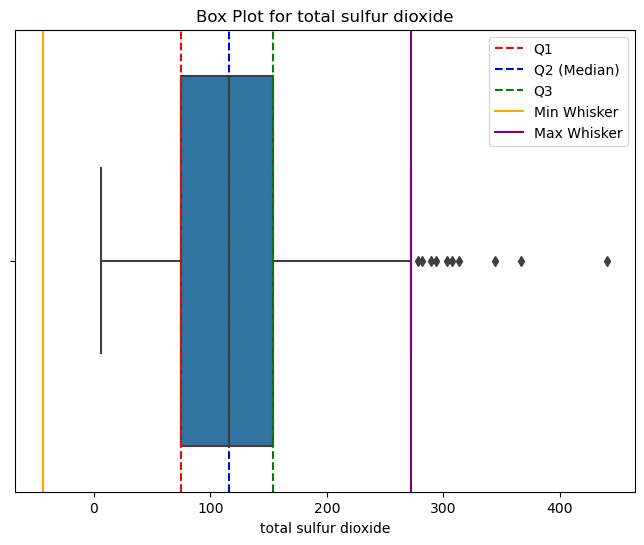

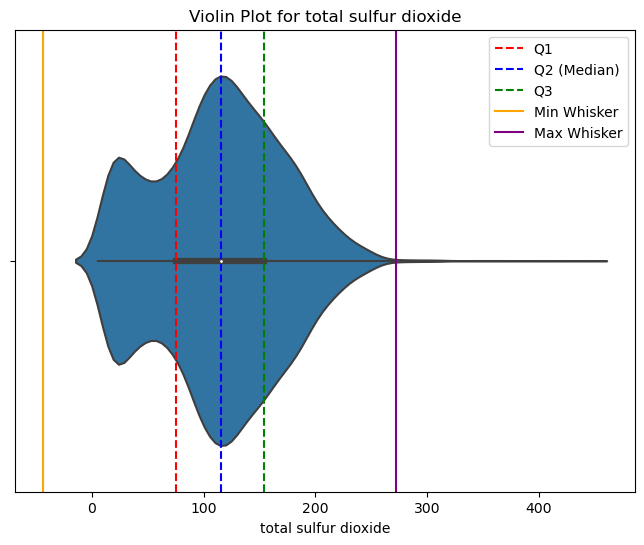

__________________________________________________ density __________________________________________________
Q1 for density: 0.9922
Q2 for density: 0.99464
Q3 for density: 0.99677
Interquartile range  for density: 0.004570000000000074
Median value for density: 0.51
Minimum Whisker  for density: 0.9853449999999999
Maximum Whisker  for density: 1.0036250000000002
Outlier count for density: 3.05297
Outlier percentage for density: 0.06%


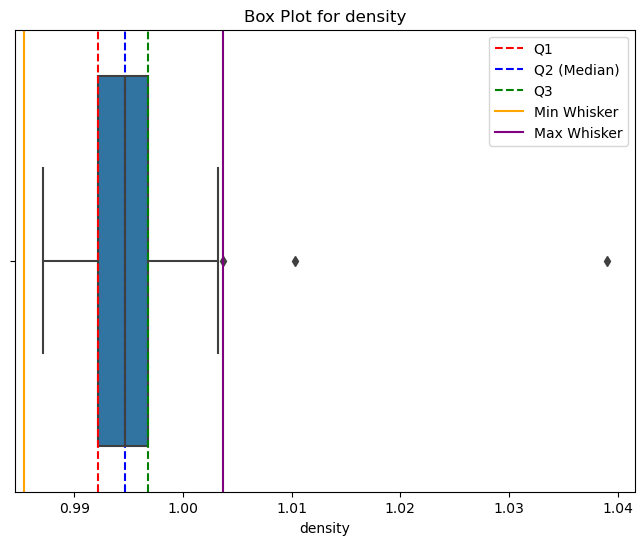

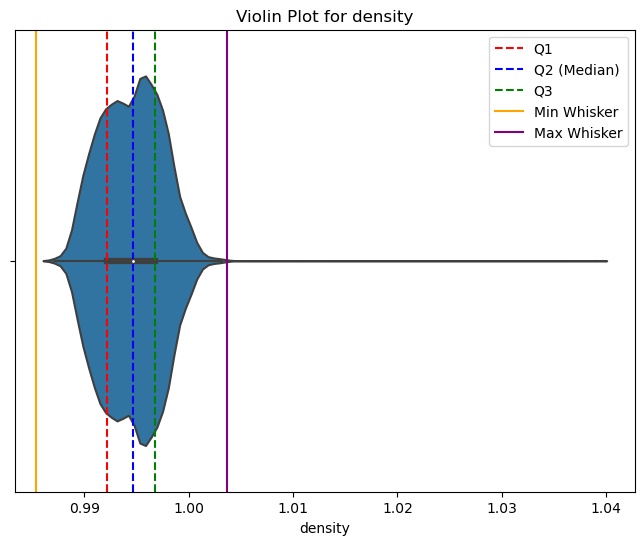

__________________________________________________ pH __________________________________________________
Q1 for pH: 3.11
Q2 for pH: 3.21
Q3 for pH: 3.33
Interquartile range  for pH: 0.2200000000000002
Median value for pH: 0.51
Minimum Whisker  for pH: 2.7799999999999994
Maximum Whisker  for pH: 3.66
Outlier count for pH: 179.67999999999998
Outlier percentage for pH: 3.37%


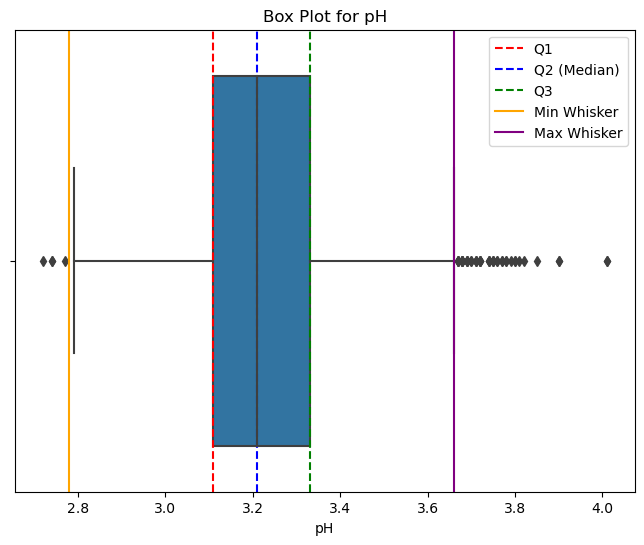

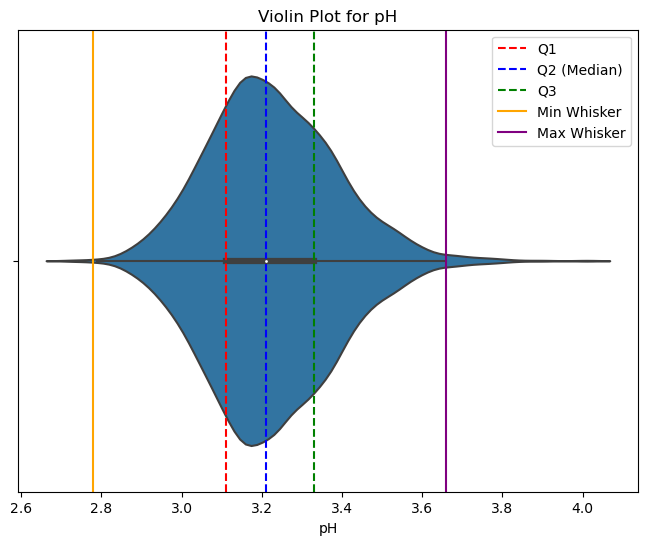

__________________________________________________ sulphates __________________________________________________
Q1 for sulphates: 0.43
Q2 for sulphates: 0.51
Q3 for sulphates: 0.6
Interquartile range  for sulphates: 0.16999999999999998
Median value for sulphates: 0.51
Minimum Whisker  for sulphates: 0.175
Maximum Whisker  for sulphates: 0.855
Outlier count for sulphates: 165.61
Outlier percentage for sulphates: 3.11%


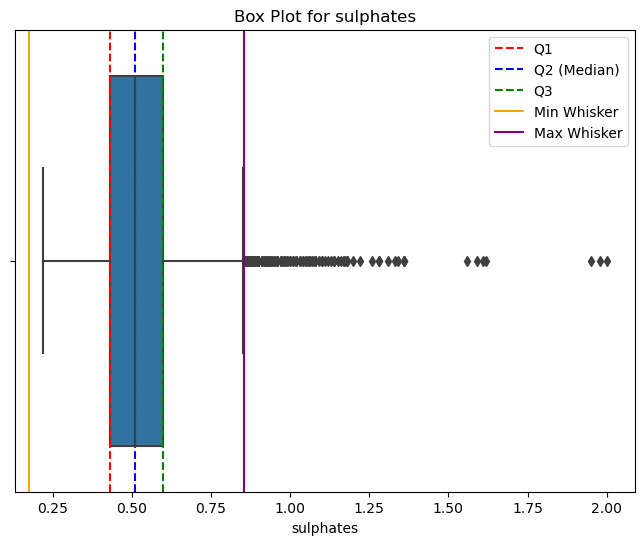

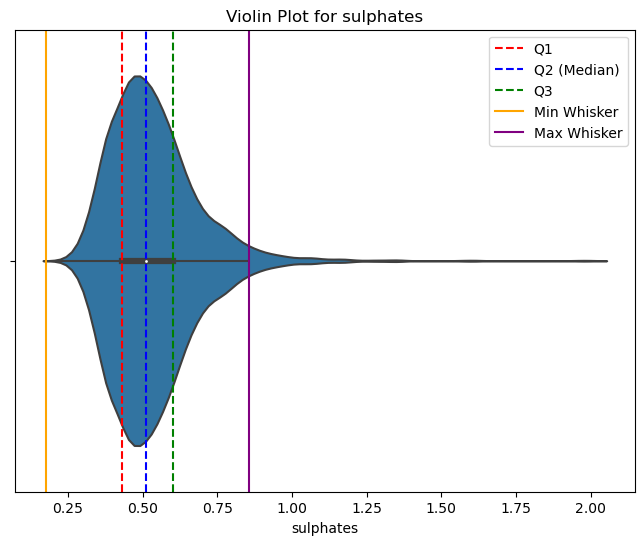

__________________________________________________ alcohol __________________________________________________
Q1 for alcohol: 9.5
Q2 for alcohol: 10.4
Q3 for alcohol: 11.4
Interquartile range  for alcohol: 1.9000000000000004
Median value for alcohol: 0.51
Minimum Whisker  for alcohol: 6.6499999999999995
Maximum Whisker  for alcohol: 14.25
Outlier count for alcohol: 14.9
Outlier percentage for alcohol: 0.28%


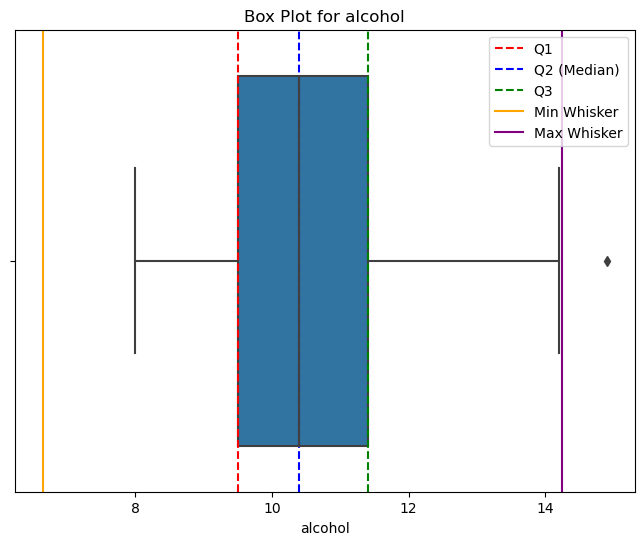

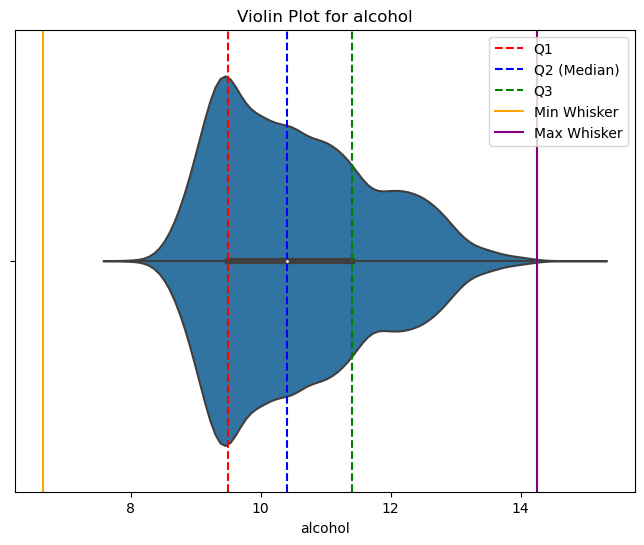

In [53]:
#Loop is created to find the Outliers for all the numerical columns 
for col in num_columns:
    print ("_"*50,col,"_"*50)
    # Calculated the  quartiles and interquartile range
    # f: Specifies that the number should be formatted as a fixed-point number.
    q1 = df[col].quantile(0.25)
    print(f"Q1 for {col}: {q1}")
    q2 = df[col].median()
    print(f"Q2 for {col}: {q2}")
    q3 = df[col].quantile(0.75)
    print(f"Q3 for {col}: {q3}")
    iqr = q3 - q1
    print(f"Interquartile range  for {col}: {iqr}")
    
    # Calculated the median Value for the column 
    
    print(f"Median value for {col}: {median_value}")
    
    # Calculated the minimum and maximum whiskers for detecting Outliers 
    min_whisker = df[col].quantile(0.25) - 1.5 * iqr
    print(f"Minimum Whisker  for {col}: {min_whisker}")
    max_whisker = df[col].quantile(0.75) + 1.5 * iqr
    print(f"Maximum Whisker  for {col}: {max_whisker}")
    
    # Detection of the outliers and the count of the outliers 
    outliers = df[(df[col] < min_whisker) | (df[col] > max_whisker)][col]
    
    # Sum of the outliers
    outlier_count = outliers.sum()
    print(f"Outlier count for {col}: {outlier_count}")
    
    # the percentage of outliers
    outlier_percentage = (outlier_count / len(df[col])) * 100
    print(f"Outlier percentage for {col}: {outlier_percentage:.2f}%")
    
    
    # Create box plot is created to visualize the standard dev and the different quartile range with giving the different vertical axis lines  to visualize more easily 
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col,hue='type',data=df)
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.axvline(x=q1, linestyle='--', color='red', label='Q1')
    plt.axvline(x=q2, linestyle='--', color='blue', label='Q2 (Median)')
    plt.axvline(x=q3, linestyle='--', color='green', label='Q3')
    plt.axvline(x=min_whisker, linestyle='-', color='orange', label='Min Whisker')
    plt.axvline(x=max_whisker, linestyle='-', color='purple', label='Max Whisker')
    plt.legend()
    plt.show()

    # Create violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df[col])
    plt.title(f"Violin Plot for {col}")
    plt.xlabel(col)
    plt.axvline(x=q1, linestyle='--', color='red', label='Q1')
    plt.axvline(x=q2, linestyle='--', color='blue', label='Q2 (Median)')
    plt.axvline(x=q3, linestyle='--', color='green', label='Q3')
    plt.axvline(x=min_whisker, linestyle='-', color='orange', label='Min Whisker')
    plt.axvline(x=max_whisker, linestyle='-', color='purple', label='Max Whisker')
    plt.legend()
    plt.show()


############################################################################################################################

In [ ]:
## Based on your anlysis either drop extreme values or substitute them with more acceptable value.


Below Columns are the outliers which are more then 30 % extreme values and we will apply advanced outlier detection techniques such as Robust Statistical Methods



__________________________________________________ fixed acidity __________________________________________________


Q1 for fixed acidity: 6.4

Q2 for fixed acidity: 7.0

Q3 for fixed acidity: 7.7

Interquartile range  for fixed acidity: 1.2999999999999998

Median value for fixed acidity: 10.3

Minimum Whisker  for fixed acidity: 4.450000000000001

Maximum Whisker  for fixed acidity: 9.65

Outlier count for fixed acidity: 3867.9

Outlier percentage for fixed acidity: 59.53%

In Fixed Acidity column Outliers are more then the 30 % which is 59.53% and count is 3867.9  and i believe this neither we can subsitute nor remove the outliers from the database as it will create a massive change in the further data analysis so we will retain the outliers are valid data points and removing them would result in a loss of important information or distort the underlying distribution

__________________________________________________ residual sugar __________________________________________________


Q1 for residual sugar: 1.8

Q2 for residual sugar: 3.0

Q3 for residual sugar: 8.1

Interquartile range  for residual sugar: 6.3

Median value for residual sugar: 10.3

Minimum Whisker  for residual sugar: -7.6499999999999995

Maximum Whisker  for residual sugar: 17.549999999999997

Outlier count for residual sugar: 2301.6000000000004

Outlier percentage for residual sugar: 35.43%

In Residual Sugar  column Outliers are more then the 30 % which is 35.43 % and count is  2301.6  and i believe this neither we can subsitute nor remove the outliers from the database as it will create a massive change in the further data analysis so we will retain the outliers are valid data points and removing them would result in a loss of important information or distort the underlying distribution

__________________________________________________ free sulfur dioxide __________________________________________________


Q1 for free sulfur dioxide: 17.0

Q2 for free sulfur dioxide: 29.0

Q3 for free sulfur dioxide: 41.0

Interquartile range  for free sulfur dioxide: 24.0

Median value for free sulfur dioxide: 10.3

Minimum Whisker  for free sulfur dioxide: -19.0

Maximum Whisker  for free sulfur dioxide: 77.0

Outlier count for free sulfur dioxide: 5981.0

Outlier percentage for free sulfur dioxide: 92.06%

In Free Sulfur Dioxide   column Outliers are more then the 30 % which is 92.06 % and count is  5981.0  and i believe this neither we can subsitute nor remove the outliers from the database as it will create a massive change in the further data analysis so we will retain the outliers are valid data points and removing them would result in a loss of important information or distort the underlying distribution

__________________________________________________ total sulfur dioxide __________________________________________________


Q1 for total sulfur dioxide: 77.5

Q2 for total sulfur dioxide: 118.0

Q3 for total sulfur dioxide: 156.0

Interquartile range  for total sulfur dioxide: 78.5

Median value for total sulfur dioxide: 10.3

Minimum Whisker  for total sulfur dioxide: -40.25

Maximum Whisker  for total sulfur dioxide: 273.75

Outlier count for total sulfur dioxide: 3217.0

Outlier percentage for total sulfur dioxide: 49.52% 


In  Total Sulfur Dioxide   column Outliers are more then the 30 % which is 49.52 % and count is  3217  and i believe this neither we can subsitute nor remove the outliers from the database as it will create a massive change in the further data analysis so we will retain the outliers are valid data points and removing them would result in a loss of important information or distort the underlying distribution

In [ ]:
## Conslusion or what you have done for achieving this.

There are situations where it may not be advisable to remove outliers that exceed 30% of the dataset. Outliers can sometimes provide valuable information or insights that are not captured by the majority of the data points. They may represent extreme or rare occurrences that are important to consider in certain analyses. Removing such outliers can lead to a loss of important nuances and distort the true nature of the data. Additionally, removing a large proportion of outliers may result in a biased or skewed dataset, impacting the validity and reliability of subsequent analyses. It is crucial to carefully assess the context, understand the underlying reasons for the outliers, and consider alternative approaches before deciding to remove them.

##############################################################################################################################

In [54]:
Outliers_replaced =num_columns=[ 'volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates', ]

__________________________________________________ volatile acidity __________________________________________________
Outlier count for volatile acidity: 279
Outlier percentage for volatile acidity: 5.24%
Outliers replaced with median values.


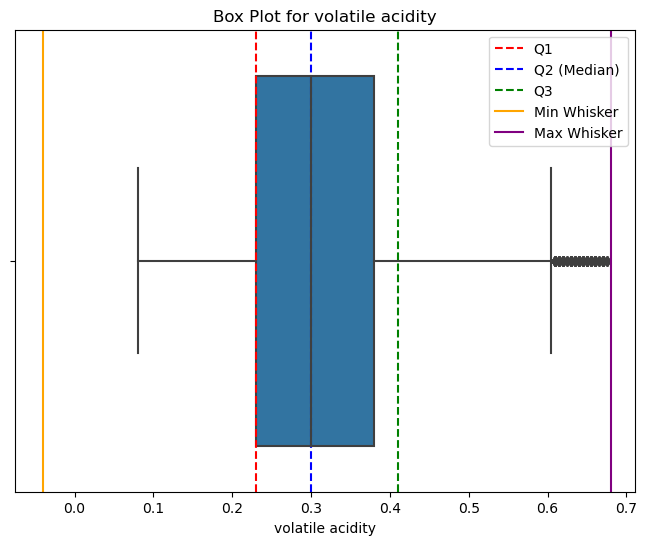

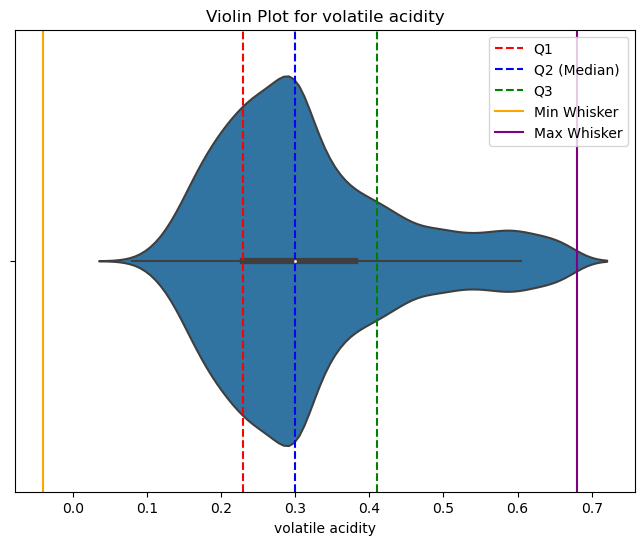

__________________________________________________ citric acid __________________________________________________
Outlier count for citric acid: 143
Outlier percentage for citric acid: 2.68%
Outliers replaced with median values.


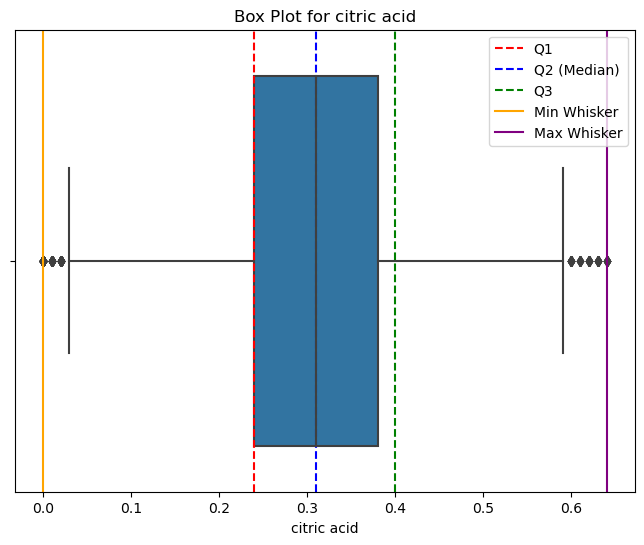

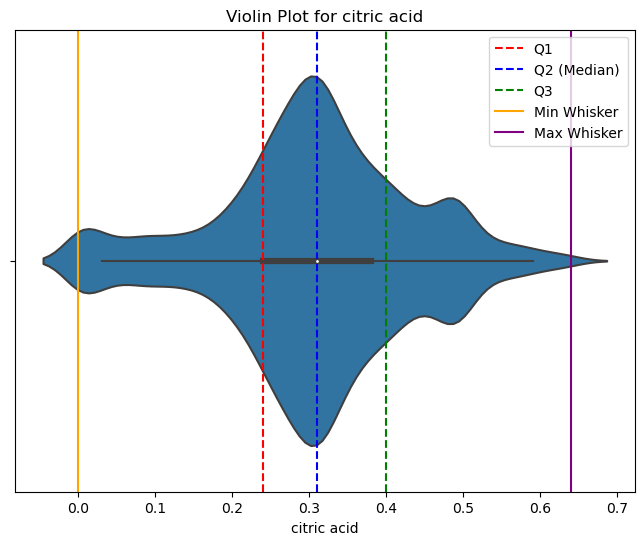

__________________________________________________ chlorides __________________________________________________
Outlier count for chlorides: 237
Outlier percentage for chlorides: 4.45%
Outliers replaced with median values.


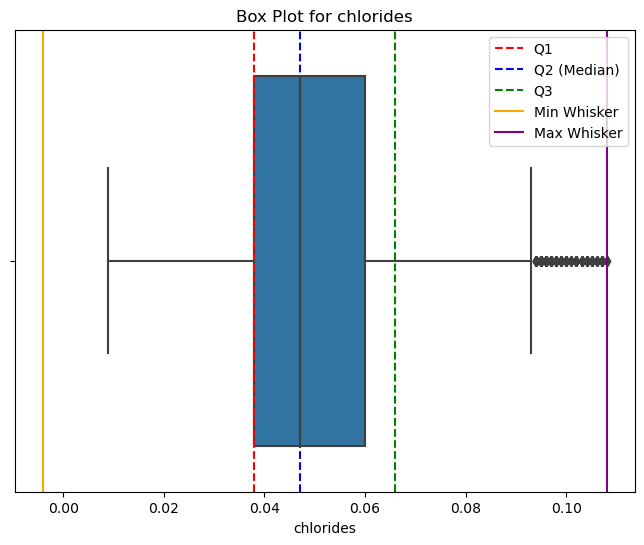

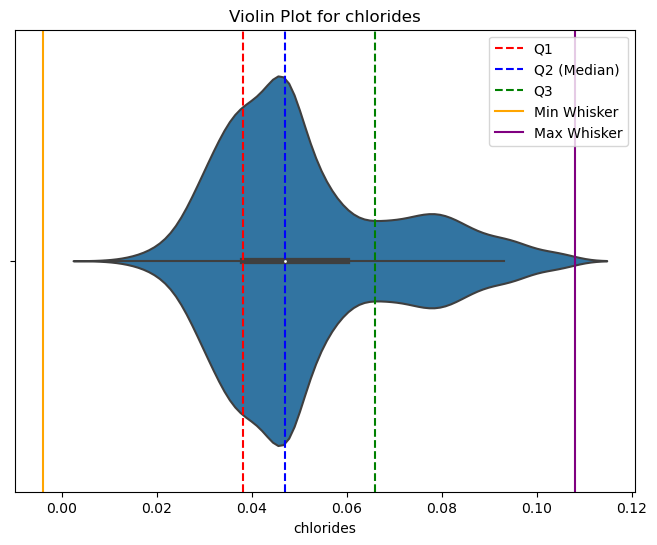

__________________________________________________ density __________________________________________________
Outlier count for density: 3
Outlier percentage for density: 0.06%
Outliers replaced with median values.


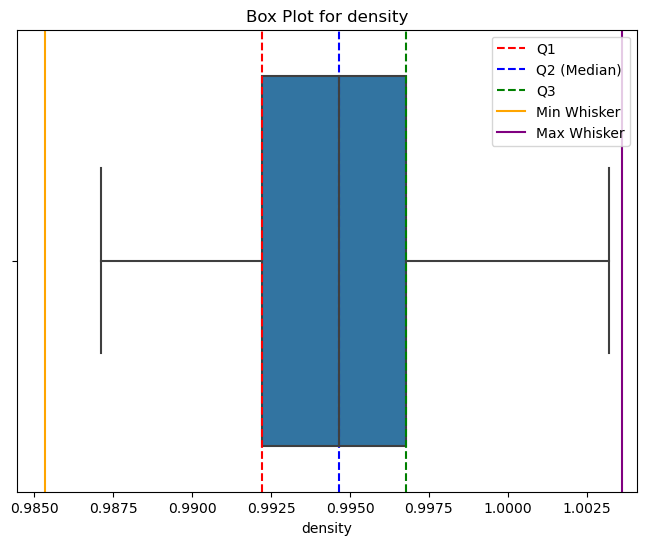

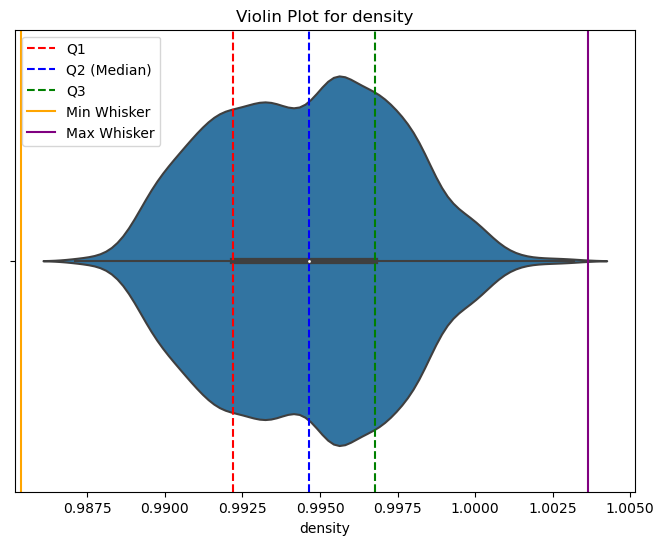

__________________________________________________ pH __________________________________________________
Outlier count for pH: 49
Outlier percentage for pH: 0.92%
Outliers replaced with median values.


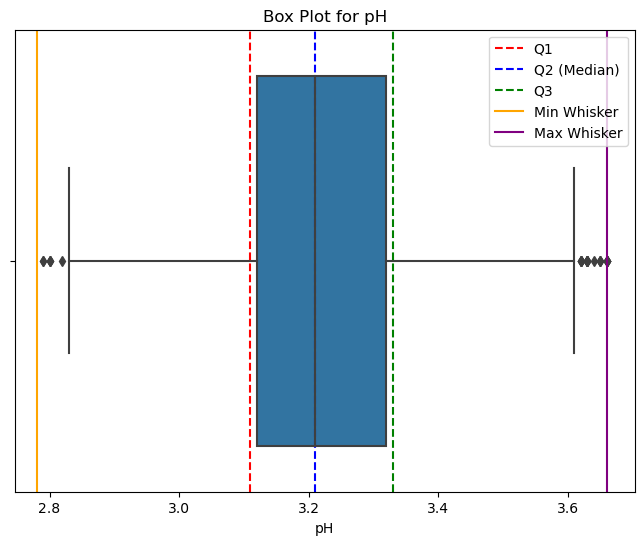

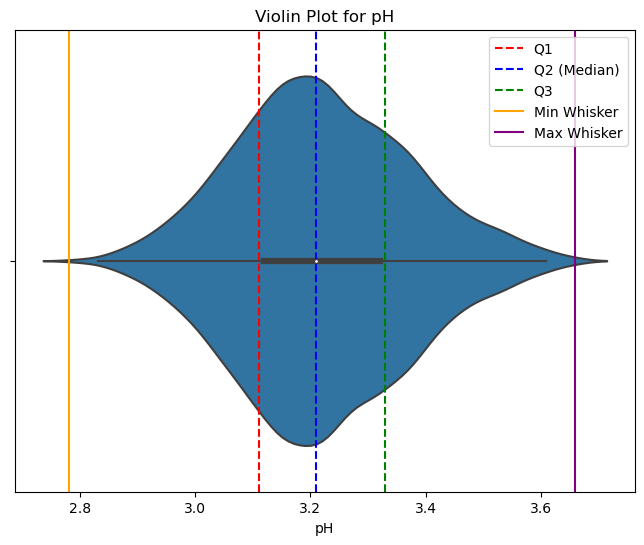

__________________________________________________ sulphates __________________________________________________
Outlier count for sulphates: 163
Outlier percentage for sulphates: 3.06%
Outliers replaced with median values.


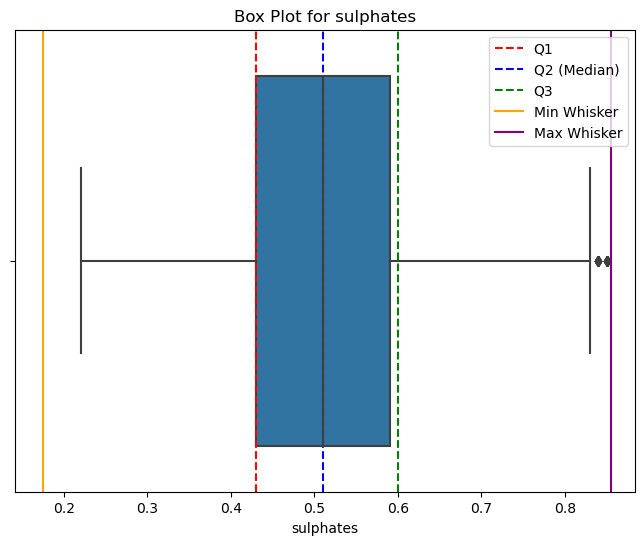

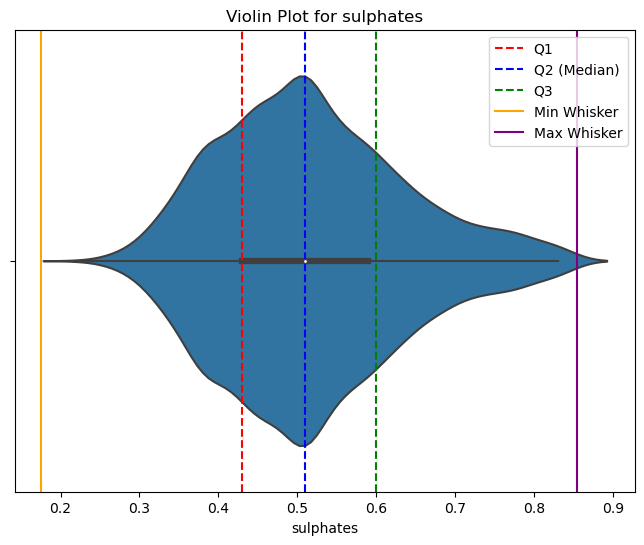

In [55]:
# Loop is created to find the outliers for all the numerical columns
for out in Outliers_replaced:
    print ("_"*50,out,"_"*50)
    # Calculate the quartiles and interquartile range
    q1 = df[out].quantile(0.25)
    q2 = df[out].median()
    q3 = df[out].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the minimum and maximum whiskers for detecting outliers
    min_whisker = q1 - 1.5 * iqr
    max_whisker = q3 + 1.5 * iqr
    
    # Identify the outliers
    outliers = (df[out] < min_whisker) | (df[out] > max_whisker)
    
    # Count the outliers
    outlier_count = outliers.sum()
    
    # Calculate the percentage of outliers
    outlier_percentage = (outlier_count / len(df[out])) * 100
    
    # Print the count and percentage of outliers
    print(f"Outlier count for {out}: {outlier_count}")
    print(f"Outlier percentage for {out}: {outlier_percentage:.2f}%")
    
    # Calculate the median of the column
    median_value = df[out].median()
    
    # Replace outliers with the median value
    df.loc[outliers, out] = median_value

    print("Outliers replaced with median values.")
    
    # Create box plot to visualize the standard deviation and different quartile range
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=out, hue='type', data=df)
    plt.title(f"Box Plot for {out}")
    plt.xlabel(out)
    plt.axvline(x=q1, linestyle='--', color='red', label='Q1')
    plt.axvline(x=q2, linestyle='--', color='blue', label='Q2 (Median)')
    plt.axvline(x=q3, linestyle='--', color='green', label='Q3')
    plt.axvline(x=min_whisker, linestyle='-', color='orange', label='Min Whisker')
    plt.axvline(x=max_whisker, linestyle='-', color='purple', label='Max Whisker')
    plt.legend()
    plt.show()

    # Create violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df[out])
    plt.title(f"Violin Plot for {out}")
    plt.xlabel(out)
    plt.axvline(x=q1, linestyle='--', color='red', label='Q1')
    plt.axvline(x=q2, linestyle='--', color='blue', label='Q2 (Median)')
    plt.axvline(x=q3, linestyle='--', color='green', label='Q3')
    plt.axvline(x=min_whisker, linestyle='-', color='orange', label='Min Whisker')
    plt.axvline(x=max_whisker, linestyle='-', color='purple', label='Max Whisker')
    plt.legend()
    plt.show()
    
    


Below Columns are the outliers which are less then 10 % extreme values and we will substitute the values by using impute the outliers  detection techniques with a central tendency measure such as the median or mean of the column.

It will create not any changes in the further data analysis so we will substitue  the outliers with a valid data points such as median  which would not going to effect  in a loss of important information or distort the underlying distribution

__________________________________________________ volatile acidity __________________________________________________

Q1 for volatile acidity: 0.23

Q2 for volatile acidity: 0.29

Q3 for volatile acidity: 0.4

Interquartile range  for volatile acidity: 0.17

Median value for volatile acidity: 10.3

Minimum Whisker  for volatile acidity: -0.024999999999999994

Maximum Whisker  for volatile acidity: 0.655

Outlier count for volatile acidity: 292.105

Outlier percentage for volatile acidity: 4.50%


__________________________________________________ citric acid __________________________________________________

Q1 for citric acid: 0.25

Q2 for citric acid: 0.31

Q3 for citric acid: 0.39

Interquartile range  for citric acid: 0.14

Median value for citric acid: 10.3

Minimum Whisker  for citric acid: 0.03999999999999998

Maximum Whisker  for citric acid: 0.6000000000000001

Outlier count for citric acid: 164.44

Outlier percentage for citric acid: 2.53%


__________________________________________________ chlorides __________________________________________________

Q1 for chlorides: 0.038

Q2 for chlorides: 0.047

Q3 for chlorides: 0.065

Interquartile range  for chlorides: 0.027000000000000003

Median value for chlorides: 10.3

Minimum Whisker  for chlorides: -0.002500000000000009

Maximum Whisker  for chlorides: 0.10550000000000001

Outlier count for chlorides: 48.391000000000005

Outlier percentage for chlorides: 0.74%


-------------------------------------------

__________________________________________________ density __________________________________________________
Q1 for density: 0.99234

Q2 for density: 0.99489

Q3 for density: 0.99699

Interquartile range  for density: 0.004650000000000043

Median value for density: 10.3

Minimum Whisker  for density: 0.9853649999999999

Maximum Whisker  for density: 1.003965

Outlier count for density: 3.05958

Outlier percentage for density: 0.05%


----------------------------------------------------------


__________________________________________________ pH __________________________________________________

Q1 for pH: 3.11

Q2 for pH: 3.21

Q3 for pH: 3.32

Interquartile range  for pH: 0.20999999999999996

Median value for pH: 10.3

Minimum Whisker  for pH: 2.795

Maximum Whisker  for pH: 3.635

Outlier count for pH: 265.08

Outlier percentage for pH: 4.08%  




-------------------------------------------------------------------------------------------------

__________________________________________________ sulphates __________________________________________________

Q1 for sulphates: 0.43

Q2 for sulphates: 0.51

Q3 for sulphates: 0.6

Interquartile range  for sulphates: 0.16999999999999998

Median value for sulphates: 10.3

Minimum Whisker  for sulphates: 0.175

Maximum Whisker  for sulphates: 0.855

Outlier count for sulphates: 193.2

Outlier percentage for sulphates: 2.97%


In [ ]:
## Conslusion or what you have done for achieving this.

Removing outliers that account for less than 10% of the dataset can be beneficial in certain scenarios. Outliers, especially those present in small proportions, can significantly affect the distribution, statistical measures, and model performance. They may introduce noise, bias, or distort the relationships between variables. By removing these outliers, we can improve the robustness and accuracy of our analyses, models, and predictions. It helps in obtaining a more representative and reliable understanding of the central tendencies and patterns within the majority of the data. Removing minor outliers allows us to focus on the dominant patterns and underlying trends, leading to more meaningful and accurate insights.

##############################################################################################################################

Below Column has no Outliers it will remain Same 

__________________________________________________ alcohol __________________________________________________

Q1 for alcohol: 9.5

Q2 for alcohol: 10.3

Q3 for alcohol: 11.3

Interquartile range  for alcohol: 1.8000000000000007

Median value for alcohol: 10.3

Minimum Whisker  for alcohol: 6.799999999999999

Maximum Whisker  for alcohol: 14.000000000000002

Outlier count for alcohol: 0.0

Outlier percentage for alcohol: 0.00%

In [ ]:
## Conslusion or what you have done for achieving this.

In some cases, datasets may not contain outliers, which can be advantageous for data analysis and modeling. When there are no outliers present, the data points align closely with the overall trend and exhibit a consistent distribution. This absence of outliers ensures that statistical measures accurately represent the central tendencies and variability of the data. It allows for more reliable and stable predictions and conclusions. Without the presence of outliers, the relationships between variables are clearer and more interpretable, making it easier to identify patterns, correlations, and dependencies. The absence of outliers simplifies the analysis process and enhances the overall reliability of the results.

## 4. Handling Categoirical Values

In [ ]:
## Idea is be to convert these string like values to number.
## Collect all Categorical column

In [11]:
# Ordinal --> Something that shows order.
# e.g. 
# level of education.
# 10th,12th,Diploma,Graduation, Masters,Phd
# 1,2,3,4,5,6

# shopping for clothes t-shirts,
# XS,S,M,L,XL,XXL
# 1,2,3,4,5,6


# -- category encoding
# -- mapping of values to number in some order.

In [56]:
categorical_columns=['type','quality' ]

In [ ]:
# Nominal --> Something which doesn't show order.
# e.g.
# cities in India
# delhi,mumbai,kolkatta,pune,chennai,hyderabad,bangalore

# subject of education
# physics,mathematics,chemistry,commerce,biology,english,hindi,sanskrit

# gender of human
# male, female


# sex        sex_male , sex_female
# male          1     ,   0
# female        0     ,   1 
# male          1     ,   0
# male          1     ,   0


# -- One-hot encoding.
# by which we convert the individual values in the column to a new column
# by making available value for row as 1 and other as 0.

# different ways of applying one-hot encoding:
#     1. to apply using pandas pd.get_dummies
#     2. to is sklearn (scientic package for mode building).
    
# there is a limitation of one-hot encoding.
# Suppose there is a data which 100000 row and has a column city which 1000 unique city.

# no. of unique values in a categorical coilumn is reffered to as cardinality.
# if a caloumn has 5-7 uniques values they are reffred to as medium to low cardinality.
# if this no. increase to more than 10 then it becomes high cardinarility.

# Cardinality of nominal values values are high.
# there is a limitation of one-hot encoding.
# Suppose there is a data which 100000 row and has a column city which 1000 unique city.

# -- frequency encoding
# city     city
# pune     0.14 
# ...
# ...
# delhi    0.26
# etc.

# value_counts() 
# use frequency of how many times pune has occured 1200 or in % form.

# -- target-mean encoding
# city       survived
# pune          1 
# ...           0   
# delhi
# bangalore
# ...
# etc.

# link for different technique.
# http://contrib.scikit-learn.org/category_encoders/

In [57]:
wine_df=pd.get_dummies(df, columns=['type','quality'])

In [58]:
wine_df.replace({False:0,True:1},inplace=True)
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.2             0.230         0.32             8.5      0.058  \
1               8.1             0.280         0.40             6.9      0.050   
2               6.2             0.320         0.16             7.0      0.045   
3               7.0             0.270         0.36            20.7      0.045   
4               6.3             0.300         0.34             1.6      0.049   
...             ...               ...          ...             ...        ...   
5324            6.2             0.600         0.08             2.0      0.090   
5325            5.9             0.550         0.10             2.2      0.062   
5326            6.3             0.510         0.13             2.3      0.076   
5327            5.9             0.645         0.12             2.0      0.075   
5328            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    47.0                 186.0  0.99560  3.19       0.40  \
1                    30.0                  97.0  0.99510  3.26       0.44   
2                    30.0                 136.0  0.99490  3.18       0.47   
3                    45.0                 170.0  1.00100  3.00       0.45   
4                    14.0                 132.0  0.99400  3.30       0.49   
...                   ...                   ...      ...   ...        ...   
5324                 32.0                  44.0  0.99490  3.45       0.58   
5325                 39.0                  51.0  0.99512  3.52       0.64   
5326                 29.0                  40.0  0.99574  3.42       0.75   
5327                 32.0                  44.0  0.99547  3.57       0.71   
5328                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  type_red  type_white  quality_3  quality_4  quality_5   
0         9.9         0           1          0          0          0  \
1        10.1         0           1          0          0          0   
2         9.6         0           1          0          0          0   
3         8.8         0           1          0          0          0   
4         9.5         0           1          0          0          0   
...       ...       ...         ...        ...        ...        ...   
5324     10.5         1           0          0          0          1   
5325     11.2         1           0          0          0          0   
5326     11.0         1           0          0          0          0   
5327     10.2         1           0          0          0          1   
5328     11.0         1           0          0          0          0   

      quality_6  quality_7  quality_8  quality_9  
0             1          0          0          0  
1             1          0          0          0  
2             1          0          0          0  
3             1          0          0          0  
4             1          0          0          0  
...         ...        ...        ...        ...  
5324          0          0          0          0  
5325          1          0          0          0  
5326          1          0          0          0  
5327          0          0          0          0  
5328          1          0          0          0  

[5329 rows x 20 columns]

In [ ]:
## Conslusion or what you have done for achieving this.

We have created the dummies data for the categorical columns and these were in the ordinal values and both categorical column doesn't have the many  unique values so we have used one hot encoder  as the both coulmn has low cardinality 

## 5 . Handling Numerical values

In [91]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar   
0  white            7.0              0.27         0.36            20.7  \
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH   
0      0.045                 45.0                 170.0   1.0010  3.00  \
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
## Whether the data is symmetrical or not.
## Plot histogram and distribution plot.

In [ ]:
# Asymmetry 
# Skewness is a statistical measure of the asymmetry of a probability distribution. 
# It characterizes the extent to which the distribution of a set of values deviates from a normal distribution.
# If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
# If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
# If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.


In [83]:
columns_to_scale=['fixed acidity', 'volatile acidity', 'residual sugar',  'free sulfur dioxide', 'sulphates',]

# If your data is not skwed and symmetrical apply standard scaler.

Confirm the distribution patter by Plot histogram and distribution plot again.

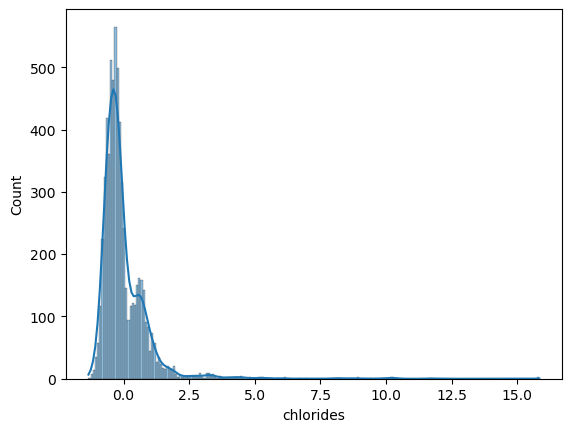

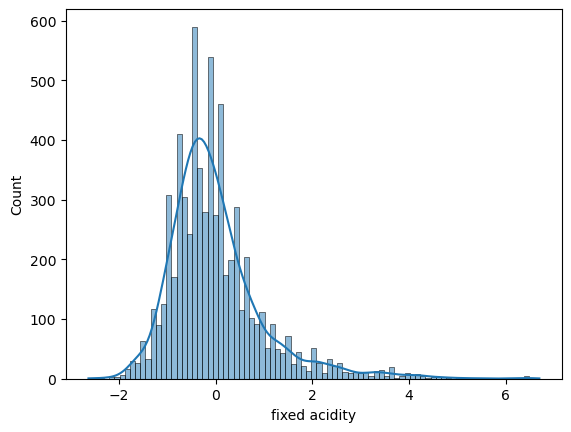

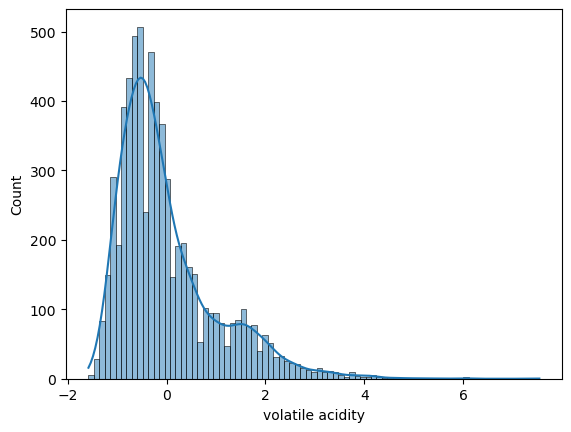

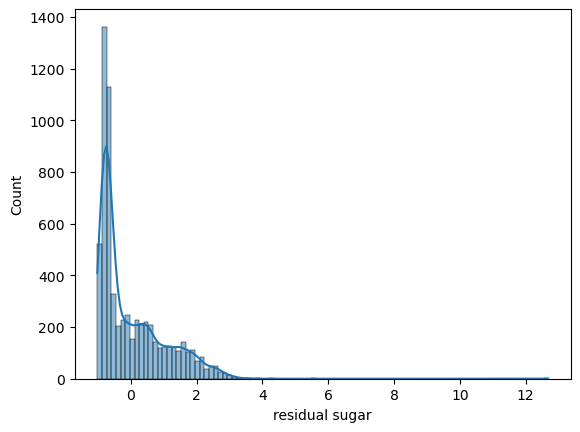

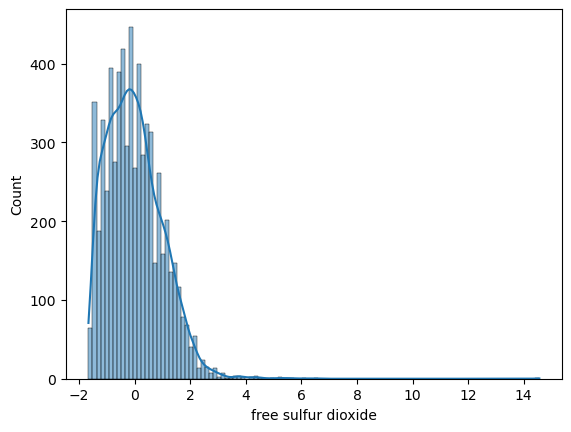

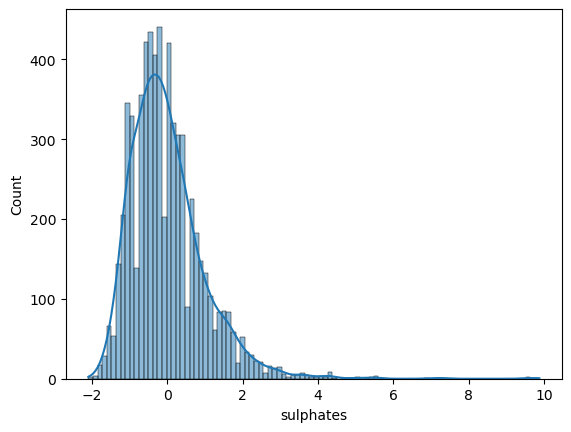

In [107]:
# Creating  an instance of StandardScaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['chlorides', 'fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates']

# Loop over each column and scale the data
for column in columns_to_scale:
    # Fit and transform the column data
    df[column] = scaler.fit_transform(df[[column]])

    sns.histplot(x=df[column],kde=True)
    plt.show()


This below columns has greater than 1 (positive skewed), the data are extremely skewed so we will use Standard  scalar . It will  subtracts the mean from each data point and divides by the standard deviation. This ensures that the data follows a standard normal distribution.

_________________ chlorides ____________________


std of  chlorides :  0.03503602522758969

variance  of  chlorides :  0.0012275230637483012

skewness of  chlorides :  5.399848762544374


____________________ fixed acidity ____________________


 std of  fixed acidity :  1.2967498565264803 
 
 variance  of  fixed acidity :  1.6815601904014472 
 
 skewness of  fixed acidity :  1.7228045308969795 
 

____________________ volatile acidity ____________________

std of  volatile acidity :  0.16464902864429293

variance  of  volatile acidity :  0.027109302633509195

skewness of  volatile acidity :  1.4955115856471894



____________________ residual sugar  ____________________


std of  residual sugar :  4.758124742672707

variance  of  residual sugar :  22.63975106683421

skewness of  residual sugar :  1.4349998392718966




_________________ free sulfur dioxide ____________________


std of  free sulfur dioxide :  17.749399772002565

variance  of  free sulfur dioxide :  315.04119226636476

skewness of  free sulfur dioxide :  1.2200660740665203


____________________ sulphates ____________________



std of  sulphates :  0.14881412131628308

variance  of  sulphates :  0.02214564270313742

skewness of  sulphates :  1.798467034111248




In [ ]:
## Conslusion or what you have done for achieving this.

The use of StandardScaler for skewed columns can provide several benefits in data preprocessing and analysis. Skewed columns often have uneven distributions, with a significant concentration of data points towards one end. Applying StandardScaler helps to transform the data by centering it around the mean and scaling it to have unit variance. This process normalizes the skewed values, making them more symmetrical and closer to a standard Gaussian distribution. By reducing the impact of extreme values and outliers, StandardScaler helps to mitigate the influence of skewed columns on statistical analyses, machine learning algorithms, and visualizations. It enhances the interpretability, comparability, and stability of the data, leading to more accurate and reliable results.

# If your data is skwed and non-symmetrical apply min-max scaler.

 Confirm the distribution patter by Plot histogram and distribution plot again.

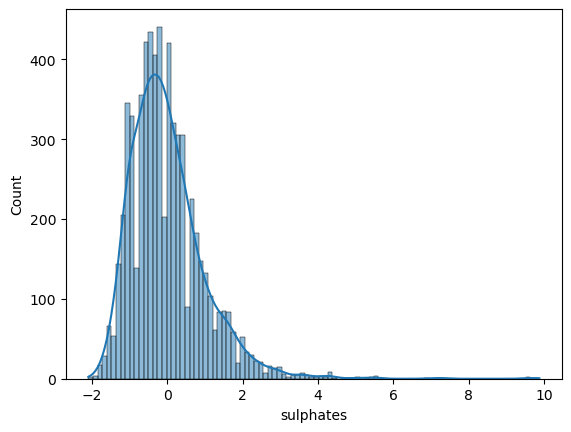

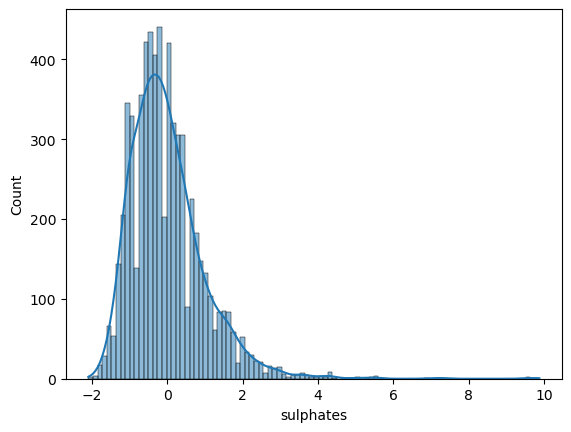

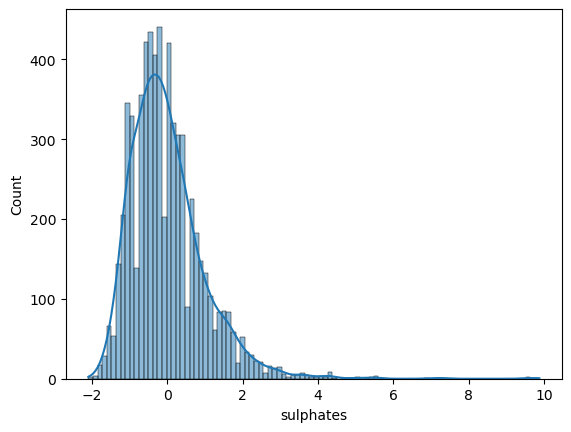

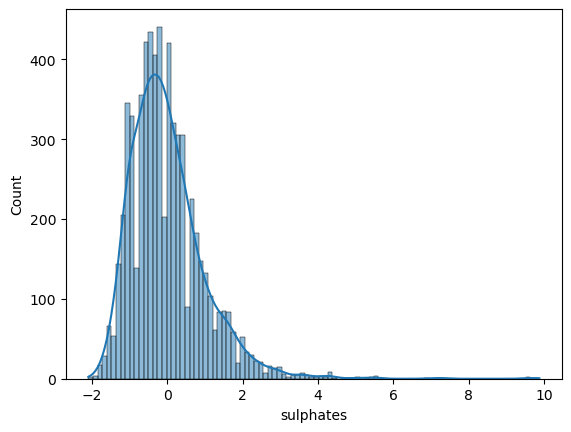

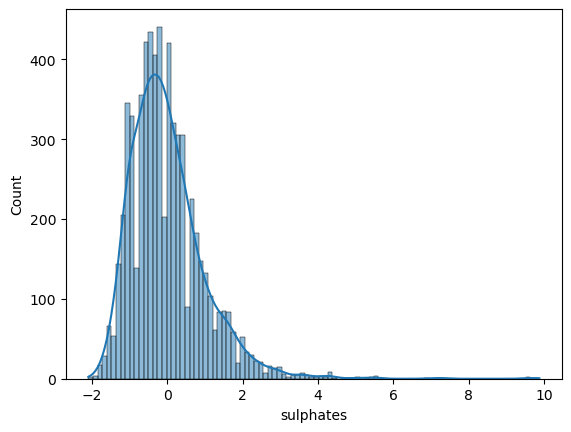

In [108]:
# Creating  an instance of MinMaxScaler
minmaxscaler = MinMaxScaler()

# List of columns needs min max  to scale

minmax_to_scale = ['citric acid', 'alcohol', 'pH','density', 'total sulfur dioxide']

# Loop over each column and scale the data
for minmax in minmax_to_scale:
    # Fit and transform the column data
    df[column] = scaler.fit_transform(df[[column]])
    
         
    sns.histplot(x=df[column],kde=True)
    plt.show()

This below columns the skewness is between -0.5 & 0.5, the data are nearly symmetrical. so we will use Min Max  scalar . This technique scales the data to a specific range, typically between 0 and 1. It subtracts the minimum value and divides by the range (maximum value minus minimum value). It preserves the relative relationships between the data points.

____________________ citric acid ____________________

std of  citric acid :  0.14526480053397803

variance  of  citric acid :  0.021101862274176424

skewness of  citric acid :  0.4730324266140668

____________________ alcohol ____________________


std of  alcohol :  1.1927117488689747

variance  of  alcohol :  1.4225613158900883

skewness of  alcohol :  0.5657177290960251

____________________ pH ____________________


std of  pH :  0.16074830655088293

variance  of  pH :  0.025840018058976632

skewness of  pH :  0.3869659325699095


____________________ density ____________________


std of  density :  0.002998673003719037

variance  of  density :  8.992039783233351e-06

skewness of  density :  0.5036017301419994
    
    
_________________ total sulfur dioxide ____________________


std of  total sulfur dioxide :  56.52185452263032

variance  of  total sulfur dioxide :  3194.7200386773857

skewness of  total sulfur dioxide :  -0.001177478234437964


In [ ]:
## Conslusion or what you have done for achieving this.

The use of MinMaxScaler for skew columns can offer various advantages in data preprocessing and analysis. Skewed columns often have a wide range of values, with a majority of data points concentrated towards one end. Applying MinMaxScaler helps to normalize the data by scaling it to a specific range, typically between 0 and 1. This transformation redistributes the values and reduces the impact of extreme values, making the distribution more uniform. By preserving the relative relationships between data points, MinMaxScaler allows for easier interpretation and comparison of skewed columns. It can also benefit machine learning algorithms by improving convergence and reducing the sensitivity to varying scales. Overall, MinMaxScaler helps achieve better data normalization and improved performance in subsequent analyses or models.

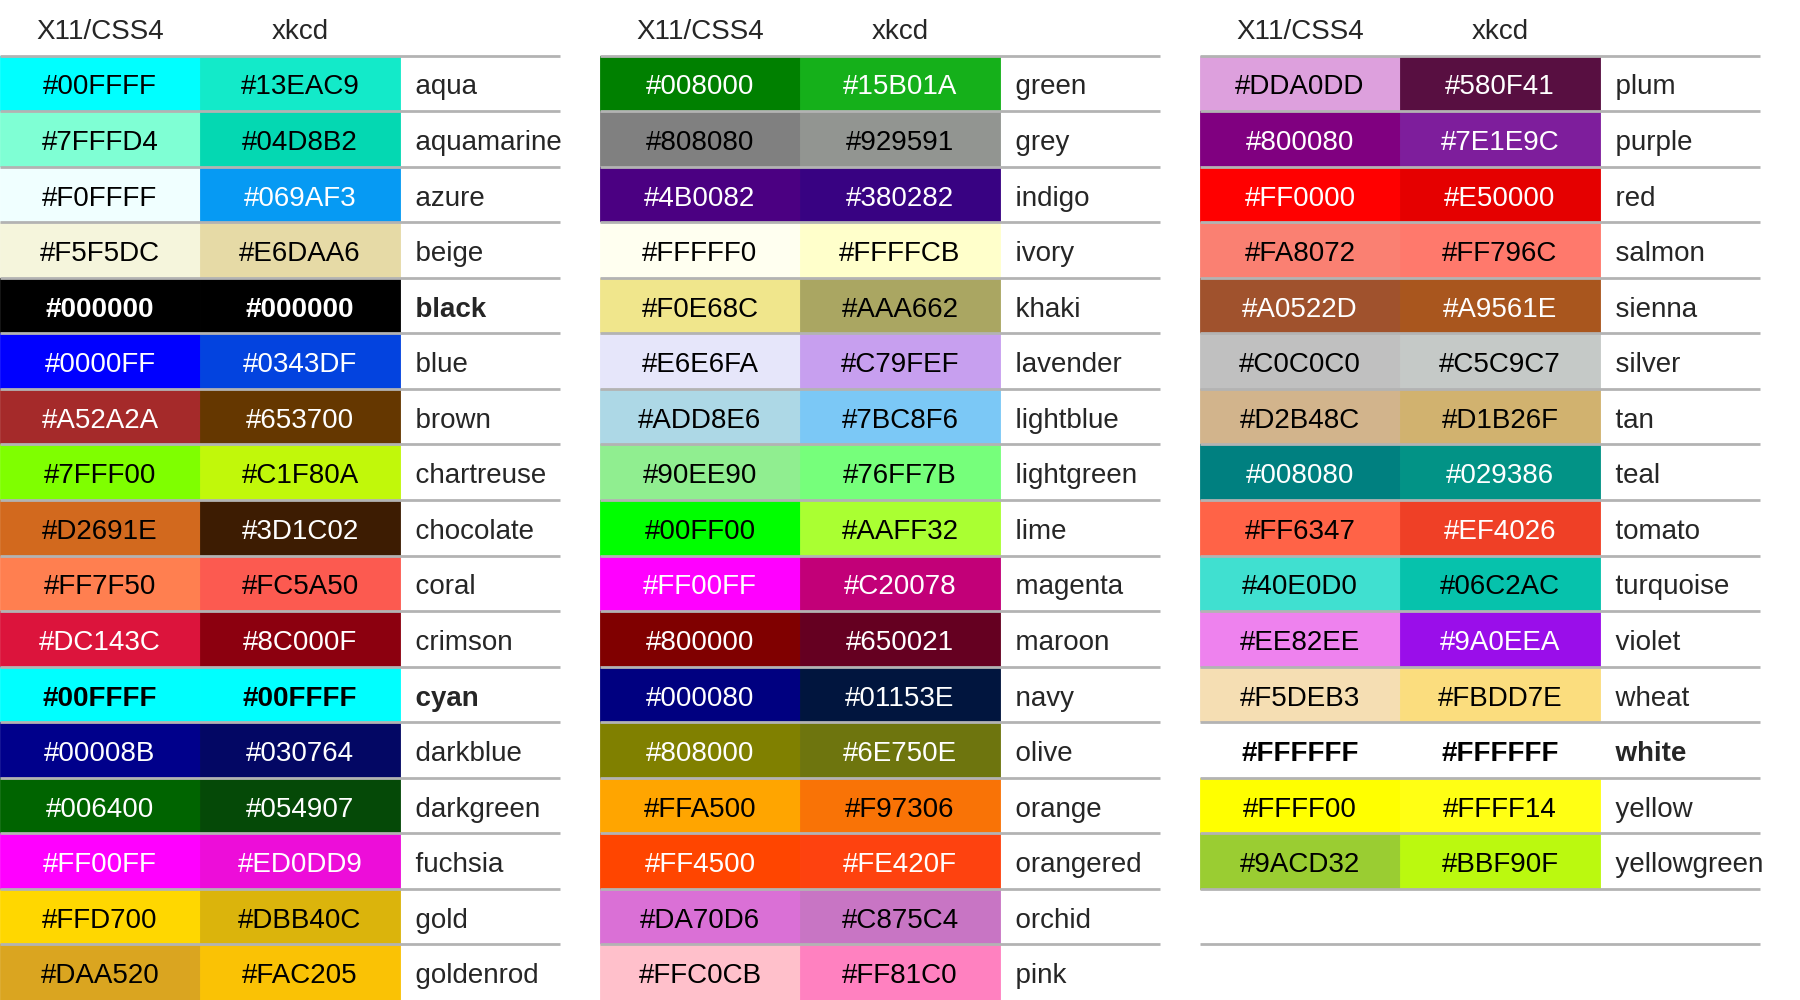

# Model Building